<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Installing-packages" data-toc-modified-id="Installing-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Installing packages</a></span></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration</a></span></li><li><span><a href="#Featurazation" data-toc-modified-id="Featurazation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Featurazation</a></span></li><li><span><a href="#Load-trained-models" data-toc-modified-id="Load-trained-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load trained models</a></span></li></ul></div>

# Installing packages

In [ ]:
# !python3 -m pip install -U pip
# !python3 -m pip install -U setuptools wheel

# Here we assume CUDA 10.1 is installed.  You should change the number
# according to your own CUDA version (e.g. mxnet_cu100 for CUDA 10.0).
# !python3 -m pip install -U "mxnet_cu101<2.0.0"
# !python3 -m pip install -U autogluon

In [53]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import pandas as pd

# sebastian's academic style settings
import matplotlib.pyplot as plt 
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['lines.markersize'] = 2
plt.rc('axes', labelsize=28) 
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
plt.rc('savefig', dpi=300)

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
train_data = TabularDataset('./data/raw/training.csv')
validation_data = TabularDataset('./data/raw/valid.csv')
test_data = TabularDataset('./data/raw/test.csv')
train_data

,GlobalID,Unwanted,ProductTitleNL,ProductDescriptionNL,BrickName,ChunkName,BrandName,LabelName,Colour,Ingredients,...,PackageWidthUnit,ProductHeight,ProductHeightUnit,ProductLength,ProductLengthUnit,ProductWeight,ProductWeightUnit,ProductWidth,ProductWidthUnit,image_url
0,9300000005528663,Y,Luxe Ginder- Zwart,4-delig grinder (51mm diameter).\r\nDeze grind...,Rookaccessoires,Accessoire voor sigaretten,DeSmokerShop,NaN,Zwart,NaN,...,unece.unit.CMT,NaN,NaN,54.0,unece.unit.MMT,163.0,unece.unit.GRM,55.0,unece.unit.MMT,NaN
1,9200000084514785,N,Jacob Hooy Valeriaanwortel gemalen,Jacob Hooy Valeriaanwortel gemalen,Keuken Snij-/Rasp-/Haktoestellen,Keukenmolen,Jacob Hooy,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/rKDm6QRKPNB/168x104.jpg
2,9200000061877999,Y,SOG Bladelight Fixed Blade,<p> SOG Bladelight Folder Uniek zakmes met ver...,Hobbymessen (Niet-elektrisch),Zakmes,SOG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/gJYZjkjnlODD/168x72.jpg
3,9300000004165840,N,Nedis CCBW39300WT20 Data- En Oplaadkabel Apple...,"Kabel om een iPhone, iPad of iPod te verbinden...",Opladers,Batterijoplader,Nedis,NaN,Wit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/q73zJR535GnD/168x132.jpg
4,9200000063108509,Y,Cold Steel Two Handed Latin,<p> Two handed Latin Machete.<br />dubbelhandi...,Hobbymessen (Niet-elektrisch),Zakmes,Cold Steel,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BxOO1Xq5wGk/168x123.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,9200000057530064,N,Gift House international Pocket Multi Tool Zakmes,Met de IGGI Pocket Multi Tool op zak heb je al...,Hobbymessen (Niet-elektrisch),Zakmes,Gift House International,NaN,Multicolour,NaN,...,unece.unit.MMT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BBopGX4nV3XX/168x199.jpg
2964,9200000121137111,N,Anti Blaf Apparaat – Honden - Blaf Afstotend ...,<h3><strong>Broomer Anti Blaf Apparaat tegen i...,Training/Controle Hulpmiddelen/Toebehoren voor...,Opvoedingshalsband,Broomer,NaN,Donker,NaN,...,unece.unit.MMT,6.5,unece.unit.CMT,8.0,unece.unit.CMT,150.0,unece.unit.GRM,5.0,unece.unit.CMT,https://media.s-bol.com/Rl3WxPo7D6RK/168x168.jpg
2965,9300000000520289,Y,Cyclones Hemp Cones Red Alert (24pcs/display) ...,<br /><p> <br /> </p><br /><p> <br /> </p>...,Rookaccessoires,Accessoire voor sigaretten,Cyclones,NaN,red,NaN,...,unece.unit.CMT,NaN,NaN,12.0,unece.unit.CMT,0.2,unece.unit.KGM,5.0,unece.unit.CMT,https://media.s-bol.com/7LoR8jqXZ0LO/116x210.jpg
2966,9300000003456601,N,Handroller Shag Apparaat – Sigarettenrolmachin...,Deze sigarettenroller voor 8 cm maat sigaret t...,Rookaccessoires,Accessoire voor sigaretten,Merkloos / Sans marque,NaN,Random,NaN,...,unece.unit.MMT,NaN,NaN,8.0,unece.unit.CMT,0.0,unece.unit.KGM,0.0,unece.unit.CMT,https://media.s-bol.com/BNA3v8LWMgno/168x168.jpg


In [11]:
validation_data

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,GlobalID,ProductTitleNL,ProductDescriptionNL,BrickName,ChunkName,BrandName,LabelName,Colour,Ingredients,Material,...,PackageWidthUnit,ProductHeight,ProductHeightUnit,ProductLength,ProductLengthUnit,ProductWeight,ProductWeightUnit,ProductWidth,ProductWidthUnit,image_url
0,9200000082192759,Cold Steel Chinese Sword machete,Chinese Sword Machete is een replica van het C...,Hobbymessen (Niet-elektrisch),Zakmes,Cold Steel,NaN,zwart,NaN,Staal,...,unece.unit.MMT,NaN,NaN,99.0,unece.unit.CMT,1175.0,unece.unit.GRM,120.0,unece.unit.MMT,https://media.s-bol.com/J6DpnJZrg2m2/168x121.jpg
1,9200000093115275,Asbak Ø10cm,"stapelbaar, Melamine LET OP: Sommige kenmerken...",Rookaccessoires,Accessoire voor sigaretten,Waca,NaN,Zwart,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/qJkqgEOAR23/168x155.jpg
2,9300000002142735,EE Grinder - Grinder Wiet - Crusher - Grinder ...,<p> Deze EE Grinder heeft 4 compartimenten en ...,Keuken Snij-/Rasp-/Haktoestellen,Keukenmolen,EE grinder,NaN,zilver,NaN,Metaal,...,unece.unit.MMT,0.0,unece.unit.CMT,0.0,unece.unit.CMT,NaN,NaN,0.0,unece.unit.CMT,https://media.s-bol.com/gZ6gAqE9xrDY/168x149.jpg
3,9200000057393413,2-pack ZenSations e-liquid Menthol 18mg,De Zensations E-liquid Menthol is tegelijk gep...,Opladers,Batterijoplader,ZenSations,NaN,NaN,NaN,NaN,...,unece.unit.MMT,10.0,unece.unit.CMT,10.0,unece.unit.CMT,NaN,NaN,10.0,unece.unit.CMT,https://media.s-bol.com/KK3x9BExYBl/157x210.jpg
4,9200000074524867,29 3.5-10X40E OS5305,Lengte: 36 cm <br />Lens Diameter: 4 cm <br />...,Buiten/Tuin Speelgoed,Schietspeelgoedaccessoires,The Dutch Airsoftshop,NaN,zwart,NaN,Metaal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/gJJOlDqKzXyl/168x70.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,9200000097659062,Trainingshalsband - trainingsband - teletac 80...,De trainingshalsband is een professionele trai...,Training/Controle Hulpmiddelen/Toebehoren voor...,Opvoedingshalsband,He Products,NaN,Geel,NaN,Kunststof,...,unece.unit.MMT,0.0,unece.unit.CMT,10.0,unece.unit.CMT,300.0,unece.unit.GRM,23.0,unece.unit.CMT,https://media.s-bol.com/JG8XDjlBJvK/168x191.jpg
634,9300000000788910,Black rasta weed leaf metal grinder 40mm – 3 p...,<p> <br /> </p><p> <br /> </p><p> <br /> ...,Keuken Snij-/Rasp-/Haktoestellen,Keukenmolen,Grinders,NaN,BLACK,NaN,Metaal,...,unece.unit.CMT,3.0,unece.unit.CMT,4.0,unece.unit.CMT,NaN,NaN,4.0,unece.unit.CMT,https://media.s-bol.com/PZ2oQGymGKBl/168x85.jpg
635,9200000051330128,Mepal asbak met deksel - wit,Mepal asbak met deksel wit,Rookaccessoires,Accessoire voor sigaretten,Mepal,NaN,Wit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/mBLJv2qWPE0/168x155.jpg
636,9200000008885499,Philips SCB1240NB batterijlader voor AAA batte...,Met de batterijlader laadt je tegelijkertijd 2...,Opladers,Batterijoplader,Philips,Philips,Zwart,NaN,NaN,...,unece.unit.MMT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/mZZNp8YwNPmG/84x210.jpg


In [10]:
print(len(train_data))
print(len(validation_data))
print(len(test_data))

2968
638
652


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Exploration

In [15]:
pos_train_df = train_data[train_data.Unwanted == "Y"]
neg_train_df = train_data[train_data.Unwanted == "N"]
print("num of postive examples:", len(pos_train_df))
print("num of negative examples:", len(neg_train_df))

num of postive examples: 1484
num of negative examples: 1484


In [66]:
# check the percentage of unwated product in products without title
temp = train_data[train_data.ProductTitleNL.isnull()]
temp = temp.Unwanted.value_counts()
print(temp)
(temp.N)/(temp.Y + temp.N)

N    145
Y     59
Name: Unwanted, dtype: int64


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7107843137254902

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


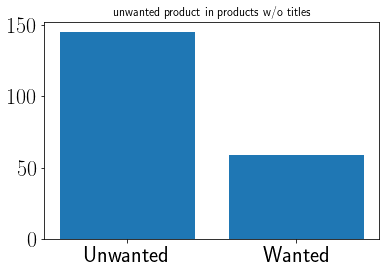

In [67]:
plt.bar(x=["Unwanted", "Wanted"], height=temp)
plt.title("unwanted product in products w/o titles");

In [56]:
temp = train_data[~train_data.ProductTitleNL.isnull()]
temp = temp.Unwanted.value_counts()
print(temp)
(temp.N)/(temp.Y + temp.N)

Y    1465
N    1442
Name: Unwanted, dtype: int64


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.4960440316477468

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


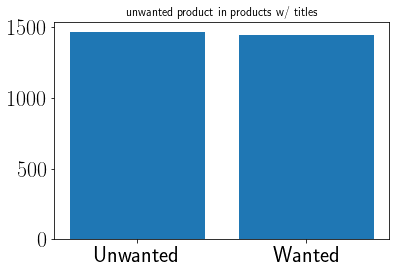

In [57]:
plt.bar(x=["Unwanted", "Wanted"], height=temp)
plt.title("unwanted product in products w/ titles");

In [62]:
# check the percentage of unwated product in products without descriptions

temp = train_data[train_data.ProductDescriptionNL.isnull()]
temp = temp.Unwanted.value_counts()
print(temp)
(temp.N)/(temp.Y + temp.N)

N    80
Y    28
Name: Unwanted, dtype: int64


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7407407407407407

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


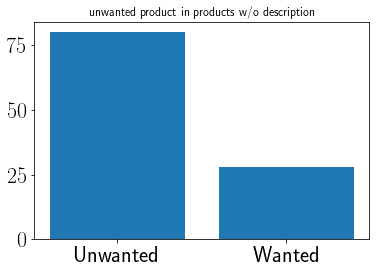

In [63]:
plt.bar(x=["Unwanted", "Wanted"], height=temp)
plt.title("unwanted product in products w/o description");

Y    1456
N    1404
Name: Unwanted, dtype: int64


/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


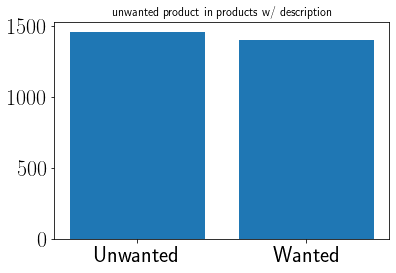

In [64]:
# check the percentage of unwated product in products without descriptions

temp = train_data[~train_data.ProductDescriptionNL.isnull()]
temp = temp.Unwanted.value_counts()
print(temp)
(temp.N)/(temp.Y + temp.N)
plt.bar(x=["Unwanted", "Wanted"], height=temp)
plt.title("unwanted product in products w/ description");

# Featurazation

In [12]:
# - LabelName is all null, drop it; GlobalId has no value, drop it. Ingredients is also all null
# - MaterialDescription has only 1 value, which is not useful;
# - NumberOfPieces has 3 non-null values, not useful
def drop_columns(df):
    df_local = df.copy(deep=True)
    cols_drop = ["GlobalID", "LabelName", "Ingredients", "MaterialDescription", "NumberOfPieces"]
    df_local = df_local.drop(cols_drop,axis=1)
    return df_local

def add_binary_feature(df):
    df_local = df.copy(deep=True)
    # if the feature is null, then 0, otherwise 1
    df_local["hasTitle"] = np.where(df_local['ProductTitleNL'].isnull(), 0, 1)
    df_local["hasDesc"] = np.where(df_local['ProductDescriptionNL'].isnull(), 0, 1)
    df_local["has_image_url"] = np.where(df_local['image_url'].isnull(), 0, 1)
    return df_local

def featurize(df):
    _df = df.copy(deep=True)
    # drop columns
    _df = drop_columns(_df)
    _df = add_binary_feature(_df)
    return _df
    

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
train_data = featurize(train_data)
validation_data = featurize(validation_data)
test_data = featurize(test_data)
train_data

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unwanted,ProductTitleNL,ProductDescriptionNL,BrickName,ChunkName,BrandName,Colour,Material,NumberOfProductsInPackage,PackageHeight,...,ProductLength,ProductLengthUnit,ProductWeight,ProductWeightUnit,ProductWidth,ProductWidthUnit,image_url,hasTitle,hasDesc,has_image_url
0,Y,Luxe Ginder- Zwart,4-delig grinder (51mm diameter).\r\nDeze grind...,Rookaccessoires,Accessoire voor sigaretten,DeSmokerShop,Zwart,Metaal,NaN,3.2,...,54.0,unece.unit.MMT,163.0,unece.unit.GRM,55.0,unece.unit.MMT,NaN,1,1,0
1,N,Jacob Hooy Valeriaanwortel gemalen,Jacob Hooy Valeriaanwortel gemalen,Keuken Snij-/Rasp-/Haktoestellen,Keukenmolen,Jacob Hooy,Wit,Katoen,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/rKDm6QRKPNB/168x104.jpg,1,1,1
2,Y,SOG Bladelight Fixed Blade,<p> SOG Bladelight Folder Uniek zakmes met ver...,Hobbymessen (Niet-elektrisch),Zakmes,SOG,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/gJYZjkjnlODD/168x72.jpg,1,1,1
3,N,Nedis CCBW39300WT20 Data- En Oplaadkabel Apple...,"Kabel om een iPhone, iPad of iPod te verbinden...",Opladers,Batterijoplader,Nedis,Wit,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/q73zJR535GnD/168x132.jpg,1,1,1
4,Y,Cold Steel Two Handed Latin,<p> Two handed Latin Machete.<br />dubbelhandi...,Hobbymessen (Niet-elektrisch),Zakmes,Cold Steel,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BxOO1Xq5wGk/168x123.jpg,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,N,Gift House international Pocket Multi Tool Zakmes,Met de IGGI Pocket Multi Tool op zak heb je al...,Hobbymessen (Niet-elektrisch),Zakmes,Gift House International,Multicolour,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://media.s-bol.com/BBopGX4nV3XX/168x199.jpg,1,1,1
2964,N,Anti Blaf Apparaat – Honden - Blaf Afstotend ...,<h3><strong>Broomer Anti Blaf Apparaat tegen i...,Training/Controle Hulpmiddelen/Toebehoren voor...,Opvoedingshalsband,Broomer,Donker,Kunststof,NaN,50.0,...,8.0,unece.unit.CMT,150.0,unece.unit.GRM,5.0,unece.unit.CMT,https://media.s-bol.com/Rl3WxPo7D6RK/168x168.jpg,1,1,1
2965,Y,Cyclones Hemp Cones Red Alert (24pcs/display) ...,<br /><p> <br /> </p><br /><p> <br /> </p>...,Rookaccessoires,Accessoire voor sigaretten,Cyclones,red,Hennep,NaN,12.0,...,12.0,unece.unit.CMT,0.2,unece.unit.KGM,5.0,unece.unit.CMT,https://media.s-bol.com/7LoR8jqXZ0LO/116x210.jpg,1,1,1
2966,N,Handroller Shag Apparaat – Sigarettenrolmachin...,Deze sigarettenroller voor 8 cm maat sigaret t...,Rookaccessoires,Accessoire voor sigaretten,Merkloos / Sans marque,Random,Plastic,NaN,0.0,...,8.0,unece.unit.CMT,0.0,unece.unit.KGM,0.0,unece.unit.CMT,https://media.s-bol.com/BNA3v8LWMgno/168x168.jpg,1,1,1


In [29]:
# check the correlation
temp = train_data.copy()
temp["Unwanted"] = temp['Unwanted'].map({'Y': 1, 'N': 0})
temp[["Unwanted", "hasTitle", "hasDesc"]].corr()

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unwanted,hasTitle,hasDesc
Unwanted,1.000000,0.054619,0.093564
hasTitle,0.054619,1.000000,0.732760
hasDesc,0.093564,0.732760,1.000000


# Load trained models

- `WeightedEnsemble_L3` has the best validation score on condabench (acc 0.8902821317)

In [7]:
# print the default training hyper-parameters
from pprint import pprint
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
default_hp_config = get_hyperparameter_config("default")
pprint(default_hp_config)

{'CAT': {},
 'FASTAI': {},
 'GBM': [{'ag_args': {'name_suffix': 'XT'}, 'extra_trees': True},
         {},
         'GBMLarge'],
 'KNN': [{'ag_args': {'name_suffix': 'Unif'}, 'weights': 'uniform'},
         {'ag_args': {'name_suffix': 'Dist'}, 'weights': 'distance'}],
 'NN': {},
 'RF': [{'ag_args': {'name_suffix': 'Gini',
                     'problem_types': ['binary', 'multiclass']},
         'criterion': 'gini'},
        {'ag_args': {'name_suffix': 'Entr',
                     'problem_types': ['binary', 'multiclass']},
         'criterion': 'entropy'},
        {'ag_args': {'name_suffix': 'MSE',
                     'problem_types': ['regression', 'quantile']},
         'criterion': 'mse'}],
 'XGB': {},
 'XT': [{'ag_args': {'name_suffix': 'Gini',
                     'problem_types': ['binary', 'multiclass']},
         'criterion': 'gini'},
        {'ag_args': {'name_suffix': 'Entr',
                     'problem_types': ['binary', 'multiclass']},
         'criterion': 'entropy'},
  

/Users/longxiang/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
model_path = "model2_tabular"

predictor = TabularPredictor(label='Unwanted', path=model_path,verbosity=3)\
.fit(train_data,
     time_limit=None,
     presets='best_quality',
     num_bag_folds=20, # enable k-fold bagging for each model, k times longer training
     num_bag_sets=2,# repeat each bagging n times, n times longer training
     num_stack_levels=3, # add m layers on top of the 2 stacking layers!
     ag_args_fit = {"num_gpus": 1},
     hyperparameters=default_hp_config, 
     save_space=True
    )

Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 1},
 'auto_stack': True,
 'num_bag_folds': 20,
 'num_bag_sets': 2,
 'num_stack_levels': 3,
 'save_space': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus': 1},
 'auto_stack': True,
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': None,
 'keep_only_best': False,
 'num_bag_folds': 20,
 'num_bag_sets': 2,
 'num_stack_levels': 3,
 'quantile_levels': None,
 'refit_full': False,
 'save_space': True,
 'set_best_to_refit_full': False,
 'unlabeled_data': None,
 'verbosity': 3}
Beginning AutoGluon training ...
AutoGluon will save models to "model2_tabular/"
AutoGluon Version:  0.2.0
Train Data Rows:    2968
Train Data Columns: 28
Preprocessing data ...
AutoGluon infers your prediction problem is: 'bin

					('int', ['binned', 'text_special']) : 63 | ['ProductTitleNL.char_count', 'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio', 'ProductTitleNL.lower_ratio', 'ProductTitleNL.digit_ratio', ...]
				Types of features in processed data (raw dtype, special dtypes):
					('int', ['binned', 'text_special']) : 63 | ['ProductTitleNL.char_count', 'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio', 'ProductTitleNL.lower_ratio', 'ProductTitleNL.digit_ratio', ...]
				3.5s = Fit runtime
				63 features in original data used to generate 63 features in processed data.
			Types of features in original data (raw dtype, special dtypes):
				('object', ['text']) : 2 | ['ProductTitleNL', 'ProductDescriptionNL']
			Types of features in processed data (raw dtype, special dtypes):
				('int', ['binned', 'text_special']) : 63 | ['ProductTitleNL.char_count', 'ProductTitleNL.word_count', 'ProductTitleNL.capital_ratio', 'ProductTitleNL.lower_ratio', 'ProductTitleNL.digit_ratio', ...]
			6.3s

	ExtraTreesGini_BAG_L1: 	{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass'], 'model_type': <class 'autogluon.tabular.models.xt.xt_model.XTModel'>, 'priority': 60}, 'ag_args_fit': {'num_gpus': 1}, 'ag_args_ensemble': {'use_child_oof': True}}
	ExtraTreesEntr_BAG_L1: 	{'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass'], 'model_type': <class 'autogluon.tabular.models.xt.xt_model.XTModel'>, 'priority': 60}, 'ag_args_fit': {'num_gpus': 1}, 'ag_args_ensemble': {'use_child_oof': True}}
	NeuralNetFastAI_BAG_L1: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.fastainn.tabular_nn_fastai.NNFastAiTabularModel'>, 'priority': 50}, 'ag_args_fit': {'num_gpus': 1}, 'ag_args_ensemble': {}}
	XGBoost_BAG_L1: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.xgboost.xgboost_model.XGBoostModel'>, 'priority': 40}, 'ag_args_fit': {'num_gpus': 1}, 'ag_args_ensemble': {}}
	NeuralNetMXNet_BAG_

[50]	train_set's binary_error: 0.0883292	valid_set's binary_error: 0.161074
[100]	train_set's binary_error: 0.0489535	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0.0287336	valid_set's binary_error: 0.154362


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.0180915	valid_set's binary_error: 0.154362


	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.085846	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0500177	valid_set's binary_error: 0.174497
[150]	train_set's binary_error: 0.030862	valid_set's binary_error: 0.161074


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.0184463	valid_set's binary_error: 0.147651


	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0883292	valid_set's binary_error: 0.167785
[100]	train_set's binary_error: 0.0517914	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.0301525	valid_set's binary_error: 0.120805
[200]	train_set's binary_error: 0.018801	valid_set's binary_error: 0.114094
[250]	train_set's binary_error: 0.0131252	valid_set's binary_error: 0.114094
[300]	train_set's binary_error: 0.00922313	valid_set's binary_error: 0.120805
[350]	train_set's binary_error: 0.00709471	valid_set's binary_error: 0.120805


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0886839	valid_set's binary_error: 0.194631
[100]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.187919
[150]	train_set's binary_error: 0.0273147	valid_set's binary_error: 0.174497
[200]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.161074
[250]	train_set's binary_error: 0.0117063	valid_set's binary_error: 0.167785
[300]	train_set's binary_error: 0.00957786	valid_set's binary_error: 0.161074
[350]	train_set's binary_error: 0.00709471	valid_set's binary_error: 0.167785


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0844271	valid_set's binary_error: 0.174497
[100]	train_set's binary_error: 0.049663	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0.0312167	valid_set's binary_error: 0.127517
[200]	train_set's binary_error: 0.018801	valid_set's binary_error: 0.127517
[250]	train_set's binary_error: 0.01348	valid_set's binary_error: 0.127517
[300]	train_set's binary_error: 0.00851366	valid_set's binary_error: 0.114094
[350]	train_set's binary_error: 0.00744945	valid_set's binary_error: 0.100671
[400]	train_set's binary_error: 0.00638524	valid_set's binary_error: 0.107383
[450]	train_set's binary_error: 0.00532104	valid_set's binary_error: 0.114094


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0904576	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0485988	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.0312167	valid_set's binary_error: 0.127517
[200]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.120805


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0908123	valid_set's binary_error: 0.181208
[100]	train_set's binary_error: 0.0532104	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0294431	valid_set's binary_error: 0.114094
[200]	train_set's binary_error: 0.0177368	valid_set's binary_error: 0.107383
[250]	train_set's binary_error: 0.0124158	valid_set's binary_error: 0.107383


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[300]	train_set's binary_error: 0.0102873	valid_set's binary_error: 0.127517


	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0890387	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0493083	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0329904	valid_set's binary_error: 0.114094
[200]	train_set's binary_error: 0.0212841	valid_set's binary_error: 0.107383
[250]	train_set's binary_error: 0.0124158	valid_set's binary_error: 0.100671


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0890071	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.05	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.0294326	valid_set's binary_error: 0.0810811
[200]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.0810811
[250]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.0945946


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0840426	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.155405
[150]	train_set's binary_error: 0.0287234	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.128378
[250]	train_set's binary_error: 0.0117021	valid_set's binary_error: 0.128378
[300]	train_set's binary_error: 0.00957447	valid_set's binary_error: 0.135135
[350]	train_set's binary_error: 0.00744681	valid_set's binary_error: 0.128378
[400]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.135135


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.087234	valid_set's binary_error: 0.182432
[100]	train_set's binary_error: 0.0475177	valid_set's binary_error: 0.189189
[150]	train_set's binary_error: 0.027305	valid_set's binary_error: 0.189189


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0829787	valid_set's binary_error: 0.182432
[100]	train_set's binary_error: 0.0453901	valid_set's binary_error: 0.162162
[150]	train_set's binary_error: 0.0297872	valid_set's binary_error: 0.141892
[200]	train_set's binary_error: 0.0187943	valid_set's binary_error: 0.141892
[250]	train_set's binary_error: 0.0124113	valid_set's binary_error: 0.135135
[300]	train_set's binary_error: 0.00886525	valid_set's binary_error: 0.141892


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6


[350]	train_set's binary_error: 0.0070922	valid_set's binary_error: 0.135135


	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0907801	valid_set's binary_error: 0.216216
[100]	train_set's binary_error: 0.048227	valid_set's binary_error: 0.135135
[150]	train_set's binary_error: 0.0312057	valid_set's binary_error: 0.141892
[200]	train_set's binary_error: 0.0202128	valid_set's binary_error: 0.128378
[250]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.141892
[300]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.148649


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0882979	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.0535461	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0308511	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.108108
[250]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.0945946
[300]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.0945946
[350]	train_set's binary_error: 0.00744681	valid_set's binary_error: 0.0945946
[400]	train_set's binary_error: 0.00638298	valid_set's binary_error: 0.0878378


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[450]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.0945946


	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0886525	valid_set's binary_error: 0.162162
[100]	train_set's binary_error: 0.0556738	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.029078	valid_set's binary_error: 0.135135


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.0187943	valid_set's binary_error: 0.141892


	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0882979	valid_set's binary_error: 0.168919
[100]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.0312057	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.0223404	valid_set's binary_error: 0.121622
[250]	train_set's binary_error: 0.014539	valid_set's binary_error: 0.108108
[300]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.108108


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[350]	train_set's binary_error: 0.00744681	valid_set's binary_error: 0.108108


	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.091844	valid_set's binary_error: 0.168919
[100]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0308511	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.101351
[250]	train_set's binary_error: 0.0141844	valid_set's binary_error: 0.108108


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[300]	train_set's binary_error: 0.00851064	valid_set's binary_error: 0.0945946


	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0921986	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0514184	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0308511	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0.0205674	valid_set's binary_error: 0.114865
[250]	train_set's binary_error: 0.0131206	valid_set's binary_error: 0.114865


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0893617	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.135135
[150]	train_set's binary_error: 0.0294326	valid_set's binary_error: 0.128378


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0879433	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0336879	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.0810811
[250]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.0945946
[300]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.101351


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0890387	valid_set's binary_error: 0.194631
[100]	train_set's binary_error: 0.0489535	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0.0290883	valid_set's binary_error: 0.134228
[200]	train_set's binary_error: 0.0173821	valid_set's binary_error: 0.127517
[250]	train_set's binary_error: 0.0138347	valid_set's binary_error: 0.120805
[300]	train_set's binary_error: 0.00851366	valid_set's binary_error: 0.14094


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0890387	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.049663	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0.030862	valid_set's binary_error: 0.174497


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.085846	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.0457609	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.0294431	valid_set's binary_error: 0.154362


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.0195105	valid_set's binary_error: 0.167785


	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0890387	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0510819	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0.0290883	valid_set's binary_error: 0.14094
[200]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.147651


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0901029	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0521462	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0297978	valid_set's binary_error: 0.107383
[200]	train_set's binary_error: 0.018801	valid_set's binary_error: 0.107383
[250]	train_set's binary_error: 0.0117063	valid_set's binary_error: 0.100671


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0918766	valid_set's binary_error: 0.174497
[100]	train_set's binary_error: 0.0546293	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0.0312167	valid_set's binary_error: 0.134228
[200]	train_set's binary_error: 0.018801	valid_set's binary_error: 0.120805
[250]	train_set's binary_error: 0.012061	valid_set's binary_error: 0.120805
[300]	train_set's binary_error: 0.00957786	valid_set's binary_error: 0.107383
[350]	train_set's binary_error: 0.00815892	valid_set's binary_error: 0.120805
[400]	train_set's binary_error: 0.00603051	valid_set's binary_error: 0.127517


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[450]	train_set's binary_error: 0.00567577	valid_set's binary_error: 0.127517


	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0876197	valid_set's binary_error: 0.187919
[100]	train_set's binary_error: 0.0485988	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.032281	valid_set's binary_error: 0.100671
[200]	train_set's binary_error: 0.0209294	valid_set's binary_error: 0.0872483
[250]	train_set's binary_error: 0.0138347	valid_set's binary_error: 0.0872483
[300]	train_set's binary_error: 0.0106421	valid_set's binary_error: 0.0671141
[350]	train_set's binary_error: 0.00815892	valid_set's binary_error: 0.0738255
[400]	train_set's binary_error: 0.00709471	valid_set's binary_error: 0.0805369


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0862008	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0517914	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0.0297978	valid_set's binary_error: 0.0939597
[200]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.0939597
[250]	train_set's binary_error: 0.0131252	valid_set's binary_error: 0.0939597


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[300]	train_set's binary_error: 0.0099326	valid_set's binary_error: 0.0939597


	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0829787	valid_set's binary_error: 0.22973
[100]	train_set's binary_error: 0.0450355	valid_set's binary_error: 0.222973
[150]	train_set's binary_error: 0.0269504	valid_set's binary_error: 0.209459
[200]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.209459
[250]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.202703
[300]	train_set's binary_error: 0.00957447	valid_set's binary_error: 0.209459
[350]	train_set's binary_error: 0.00780142	valid_set's binary_error: 0.202703
[400]	train_set's binary_error: 0.0070922	valid_set's binary_error: 0.216216


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0861702	valid_set's binary_error: 0.168919
[100]	train_set's binary_error: 0.05	valid_set's binary_error: 0.175676
[150]	train_set's binary_error: 0.0276596	valid_set's binary_error: 0.162162


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0865248	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0535461	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.029078	valid_set's binary_error: 0.0810811
[200]	train_set's binary_error: 0.0202128	valid_set's binary_error: 0.0878378
[250]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.0878378


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0847518	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.048227	valid_set's binary_error: 0.141892
[150]	train_set's binary_error: 0.0308511	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.0187943	valid_set's binary_error: 0.114865
[250]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.101351
[300]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.0945946
[350]	train_set's binary_error: 0.0070922	valid_set's binary_error: 0.101351
[400]	train_set's binary_error: 0.00638298	valid_set's binary_error: 0.108108
[450]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.101351


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0907801	valid_set's binary_error: 0.162162
[100]	train_set's binary_error: 0.0528369	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.0319149	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0.0212766	valid_set's binary_error: 0.128378


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0893617	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0.0514184	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.029078	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.0878378
[250]	train_set's binary_error: 0.014539	valid_set's binary_error: 0.0945946
[300]	train_set's binary_error: 0.0113475	valid_set's binary_error: 0.101351
[350]	train_set's binary_error: 0.00780142	valid_set's binary_error: 0.0878378


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0858156	valid_set's binary_error: 0.162162
[100]	train_set's binary_error: 0.0492908	valid_set's binary_error: 0.141892
[150]	train_set's binary_error: 0.029078	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.121622
[250]	train_set's binary_error: 0.0124113	valid_set's binary_error: 0.121622


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6


[300]	train_set's binary_error: 0.00921986	valid_set's binary_error: 0.121622


	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0900709	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0528369	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0315603	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.0212766	valid_set's binary_error: 0.135135
[250]	train_set's binary_error: 0.014539	valid_set's binary_error: 0.114865


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0890071	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.0540541
[150]	train_set's binary_error: 0.0287234	valid_set's binary_error: 0.0675676
[200]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.0743243


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0861702	valid_set's binary_error: 0.195946
[100]	train_set's binary_error: 0.0478723	valid_set's binary_error: 0.182432
[150]	train_set's binary_error: 0.0297872	valid_set's binary_error: 0.182432
[200]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.195946


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.091844	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0287234	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.101351


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0882979	valid_set's binary_error: 0.182432
[100]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.162162
[150]	train_set's binary_error: 0.0294326	valid_set's binary_error: 0.141892
[200]	train_set's binary_error: 0.0187943	valid_set's binary_error: 0.141892


Saving model2_tabular/models/LightGBMXT_BAG_L1/utils/oof.pkl
Saving model2_tabular/models/LightGBMXT_BAG_L1/model.pkl
	0.879	 = Validation accuracy score
	86.87s	 = Training runtime
	1.64s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: LightGBM_BAG_L1 ...


[250]	train_set's binary_error: 0.0117021	valid_set's binary_error: 0.141892


Saving model2_tabular/models/LightGBM_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0695282	valid_set's binary_error: 0.174497
[100]	train_set's binary_error: 0.0326357	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0.0145442	valid_set's binary_error: 0.14094
[200]	train_set's binary_error: 0.0099326	valid_set's binary_error: 0.154362
[250]	train_set's binary_error: 0.00603051	valid_set's binary_error: 0.154362


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[300]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.154362


	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0638524	valid_set's binary_error: 0.187919
[100]	train_set's binary_error: 0.0329904	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.147651
[200]	train_set's binary_error: 0.00851366	valid_set's binary_error: 0.147651
[250]	train_set's binary_error: 0.00673998	valid_set's binary_error: 0.147651


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0713019	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.0319262	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.100671
[200]	train_set's binary_error: 0.00886839	valid_set's binary_error: 0.0939597
[250]	train_set's binary_error: 0.00638524	valid_set's binary_error: 0.107383


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.068464	valid_set's binary_error: 0.167785
[100]	train_set's binary_error: 0.030862	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0.0148989	valid_set's binary_error: 0.174497


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0698829	valid_set's binary_error: 0.161074
[100]	train_set's binary_error: 0.0329904	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.120805
[200]	train_set's binary_error: 0.00886839	valid_set's binary_error: 0.134228


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0652714	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0329904	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.134228
[200]	train_set's binary_error: 0.00922313	valid_set's binary_error: 0.154362


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0695282	valid_set's binary_error: 0.167785
[100]	train_set's binary_error: 0.0358283	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.147651
[200]	train_set's binary_error: 0.0099326	valid_set's binary_error: 0.161074


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.075204	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0336999	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.107383
[200]	train_set's binary_error: 0.00851366	valid_set's binary_error: 0.107383
[250]	train_set's binary_error: 0.00567577	valid_set's binary_error: 0.114094


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0730496	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0322695	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.114865


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0684397	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0304965	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0170213	valid_set's binary_error: 0.121622
[200]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.141892


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0712766	valid_set's binary_error: 0.202703
[100]	train_set's binary_error: 0.0301418	valid_set's binary_error: 0.189189
[150]	train_set's binary_error: 0.0163121	valid_set's binary_error: 0.182432
[200]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.182432


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0673759	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0322695	valid_set's binary_error: 0.148649
[150]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.148649
[200]	train_set's binary_error: 0.00815603	valid_set's binary_error: 0.135135


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0702128	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0301418	valid_set's binary_error: 0.141892
[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.155405


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.00886525	valid_set's binary_error: 0.148649


	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0730496	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0326241	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.0141844	valid_set's binary_error: 0.0878378
[200]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.0878378
[250]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.0810811
[300]	train_set's binary_error: 0.00567376	valid_set's binary_error: 0.0810811
[350]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0810811


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[400]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0878378


	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0698582	valid_set's binary_error: 0.168919
[100]	train_set's binary_error: 0.0312057	valid_set's binary_error: 0.148649
[150]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.141892
[200]	train_set's binary_error: 0.00886525	valid_set's binary_error: 0.128378
[250]	train_set's binary_error: 0.00602837	valid_set's binary_error: 0.121622
[300]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.121622
[350]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.121622


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0705674	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0351064	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.121622
[200]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.101351
[250]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.0945946
[300]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.0945946


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0666667	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0315603	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0170213	valid_set's binary_error: 0.114865


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.114865


	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0712766	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0304965	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.108108
[200]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.108108


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.121622


	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0716312	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0322695	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.0810811
[200]	train_set's binary_error: 0.00921986	valid_set's binary_error: 0.0810811
[250]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.0810811


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.070922	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.0361702	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.0743243
[250]	train_set's binary_error: 0.00638298	valid_set's binary_error: 0.0945946
[300]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.0878378


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0691735	valid_set's binary_error: 0.167785
[100]	train_set's binary_error: 0.0326357	valid_set's binary_error: 0.154362
[150]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.154362
[200]	train_set's binary_error: 0.00851366	valid_set's binary_error: 0.161074


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0.00567577	valid_set's binary_error: 0.161074


	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0716566	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0312167	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.107383
[200]	train_set's binary_error: 0.0099326	valid_set's binary_error: 0.134228
[250]	train_set's binary_error: 0.00638524	valid_set's binary_error: 0.120805


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0695282	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0315715	valid_set's binary_error: 0.154362
[150]	train_set's binary_error: 0.0159631	valid_set's binary_error: 0.167785


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.068464	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0326357	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0.0159631	valid_set's binary_error: 0.147651
[200]	train_set's binary_error: 0.00886839	valid_set's binary_error: 0.14094


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0691735	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0315715	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.100671
[200]	train_set's binary_error: 0.0106421	valid_set's binary_error: 0.0939597
[250]	train_set's binary_error: 0.00638524	valid_set's binary_error: 0.100671
[300]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.0872483
[350]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.0872483
[400]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.0939597
[450]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.0939597


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[500]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.100671


	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0705924	valid_set's binary_error: 0.161074
[100]	train_set's binary_error: 0.0340546	valid_set's binary_error: 0.154362
[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.120805
[200]	train_set's binary_error: 0.0109968	valid_set's binary_error: 0.100671
[250]	train_set's binary_error: 0.00603051	valid_set's binary_error: 0.100671
[300]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.107383


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0730756	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0340546	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0.0173821	valid_set's binary_error: 0.100671


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0734303	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0340546	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0.0177368	valid_set's binary_error: 0.100671
[200]	train_set's binary_error: 0.0106421	valid_set's binary_error: 0.100671
[250]	train_set's binary_error: 0.00744945	valid_set's binary_error: 0.100671


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0691489	valid_set's binary_error: 0.25
[100]	train_set's binary_error: 0.0297872	valid_set's binary_error: 0.222973


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.216216


	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0705674	valid_set's binary_error: 0.175676
[100]	train_set's binary_error: 0.0343972	valid_set's binary_error: 0.141892
[150]	train_set's binary_error: 0.0131206	valid_set's binary_error: 0.162162
[200]	train_set's binary_error: 0.00780142	valid_set's binary_error: 0.162162


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0673759	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0340426	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.108108
[200]	train_set's binary_error: 0.00957447	valid_set's binary_error: 0.121622


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0695035	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0308511	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.00921986	valid_set's binary_error: 0.121622
[250]	train_set's binary_error: 0.00638298	valid_set's binary_error: 0.101351
[300]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.108108
[350]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.114865


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0737589	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0333333	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.108108


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0.0070922	valid_set's binary_error: 0.101351


	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0741135	valid_set's binary_error: 0.162162
[100]	train_set's binary_error: 0.0312057	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.114865
[250]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.114865
[300]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.114865


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0673759	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0315603	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.101351


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0755319	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.037234	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.108108
[250]	train_set's binary_error: 0.00673759	valid_set's binary_error: 0.101351


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0730496	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.0326241	valid_set's binary_error: 0.0472973
[150]	train_set's binary_error: 0.0148936	valid_set's binary_error: 0.0540541
[200]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.0608108


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.070922	valid_set's binary_error: 0.195946
[100]	train_set's binary_error: 0.0297872	valid_set's binary_error: 0.209459
[150]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.202703


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0677305	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.035461	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0141844	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0.00815603	valid_set's binary_error: 0.0945946
[250]	train_set's binary_error: 0.00567376	valid_set's binary_error: 0.101351
[300]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.114865


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0677305	valid_set's binary_error: 0.195946
[100]	train_set's binary_error: 0.0329787	valid_set's binary_error: 0.162162
[150]	train_set's binary_error: 0.0163121	valid_set's binary_error: 0.162162
[200]	train_set's binary_error: 0.00957447	valid_set's binary_error: 0.162162
[250]	train_set's binary_error: 0.00638298	valid_set's binary_error: 0.168919


Saving model2_tabular/models/LightGBM_BAG_L1/utils/oof.pkl
Saving model2_tabular/models/LightGBM_BAG_L1/model.pkl
	0.877	 = Validation accuracy score
	90.29s	 = Training runtime
	1.57s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L1 ...
Saving model2_tabular/models/RandomForestGini_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/RandomForestGini_BAG_L1/utils/oof.pkl
Saving model2_tabular/models/RandomForestGini_BAG_L1/model.pkl
	0.8555	 = Validation accuracy score
	2.22s	 = Training runtime
	2.51s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: RandomForestEntr_BAG_L1 ...
Saving model2_tabular/models/RandomForestEntr_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was s

0:	learn: 0.7339482	test: 0.8053691	best: 0.8053691 (0)	total: 105ms	remaining: 17m 34s
20:	learn: 0.7452998	test: 0.8053691	best: 0.8120805 (4)	total: 2.07s	remaining: 16m 25s
40:	learn: 0.7665839	test: 0.8120805	best: 0.8187919 (37)	total: 3.76s	remaining: 15m 13s
60:	learn: 0.7853849	test: 0.8187919	best: 0.8187919 (37)	total: 5.55s	remaining: 15m 4s
80:	learn: 0.8013480	test: 0.8255034	best: 0.8322148 (75)	total: 7.31s	remaining: 14m 54s
100:	learn: 0.8144732	test: 0.8322148	best: 0.8322148 (75)	total: 9.21s	remaining: 15m 3s
120:	learn: 0.8183753	test: 0.8389262	best: 0.8389262 (103)	total: 10.9s	remaining: 14m 53s
140:	learn: 0.8251153	test: 0.8389262	best: 0.8389262 (103)	total: 12.8s	remaining: 14m 56s
160:	learn: 0.8339837	test: 0.8389262	best: 0.8389262 (103)	total: 14.5s	remaining: 14m 47s
180:	learn: 0.8375310	test: 0.8456376	best: 0.8456376 (173)	total: 16.3s	remaining: 14m 42s
200:	learn: 0.8368216	test: 0.8456376	best: 0.8456376 (173)	total: 17.9s	remaining: 14m 31s
220:

	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7314651	test: 0.7449664	best: 0.7449664 (0)	total: 81.5ms	remaining: 13m 34s
20:	learn: 0.7392692	test: 0.7382550	best: 0.7449664 (0)	total: 1.89s	remaining: 14m 56s
40:	learn: 0.7651650	test: 0.7651007	best: 0.7651007 (33)	total: 3.73s	remaining: 15m 5s
60:	learn: 0.7775807	test: 0.7852349	best: 0.7986577 (54)	total: 5.59s	remaining: 15m 11s
80:	learn: 0.7949628	test: 0.8120805	best: 0.8120805 (80)	total: 7.37s	remaining: 15m 2s
100:	learn: 0.8027669	test: 0.8053691	best: 0.8187919 (82)	total: 9.24s	remaining: 15m 6s
120:	learn: 0.8158922	test: 0.8053691	best: 0.8187919 (82)	total: 11.1s	remaining: 15m 8s
140:	learn: 0.8208585	test: 0.8053691	best: 0.8187919 (82)	total: 12.8s	remaining: 14m 56s
160:	learn: 0.8265342	test: 0.8120805	best: 0.8187919 (82)	total: 14.7s	remaining: 15m
180:	learn: 0.8290174	test: 0.8187919	best: 0.8187919 (82)	total: 16.4s	remaining: 14m 50s
200:	learn: 0.8315005	test: 0.8187919	best: 0.8187919 (82)	total: 18.2s	remaining: 14m 45s
220:	learn: 0.

	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7268535	test: 0.7852349	best: 0.7852349 (0)	total: 60.9ms	remaining: 10m 9s
20:	learn: 0.7403335	test: 0.7986577	best: 0.7986577 (15)	total: 1.88s	remaining: 14m 53s
40:	learn: 0.7495566	test: 0.8053691	best: 0.8187919 (32)	total: 3.58s	remaining: 14m 30s
60:	learn: 0.7765165	test: 0.8120805	best: 0.8187919 (32)	total: 5.39s	remaining: 14m 38s
80:	learn: 0.7864491	test: 0.8590604	best: 0.8590604 (76)	total: 7.19s	remaining: 14m 40s
100:	learn: 0.7928343	test: 0.8590604	best: 0.8590604 (76)	total: 8.95s	remaining: 14m 37s
120:	learn: 0.8073785	test: 0.8590604	best: 0.8590604 (76)	total: 10.8s	remaining: 14m 44s
140:	learn: 0.8169564	test: 0.8657718	best: 0.8657718 (136)	total: 12.6s	remaining: 14m 40s
160:	learn: 0.8233416	test: 0.8590604	best: 0.8657718 (136)	total: 14.4s	remaining: 14m 38s
180:	learn: 0.8268890	test: 0.8657718	best: 0.8657718 (136)	total: 16.1s	remaining: 14m 31s
200:	learn: 0.8336289	test: 0.8657718	best: 0.8657718 (136)	total: 17.8s	remaining: 14m 29s
22

	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7272082	test: 0.7852349	best: 0.7852349 (0)	total: 71.9ms	remaining: 11m 59s
20:	learn: 0.7332387	test: 0.7986577	best: 0.7986577 (5)	total: 1.61s	remaining: 12m 45s
40:	learn: 0.7616176	test: 0.8120805	best: 0.8120805 (37)	total: 3.22s	remaining: 13m 3s
60:	learn: 0.7811281	test: 0.8255034	best: 0.8255034 (60)	total: 4.9s	remaining: 13m 18s
80:	learn: 0.7931891	test: 0.8322148	best: 0.8322148 (67)	total: 6.63s	remaining: 13m 32s
100:	learn: 0.8048954	test: 0.8255034	best: 0.8389262 (81)	total: 8.29s	remaining: 13m 32s
120:	learn: 0.8098617	test: 0.8187919	best: 0.8389262 (81)	total: 9.94s	remaining: 13m 31s
140:	learn: 0.8183753	test: 0.8187919	best: 0.8389262 (81)	total: 11.5s	remaining: 13m 27s
160:	learn: 0.8251153	test: 0.8187919	best: 0.8389262 (81)	total: 13.1s	remaining: 13m 18s
180:	learn: 0.8300816	test: 0.8255034	best: 0.8389262 (81)	total: 14.6s	remaining: 13m 13s
200:	learn: 0.8336289	test: 0.8255034	best: 0.8389262 (81)	total: 16.1s	remaining: 13m 5s
220:	lear

	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7321745	test: 0.7718121	best: 0.7718121 (0)	total: 80.9ms	remaining: 13m 28s
20:	learn: 0.7343029	test: 0.7583893	best: 0.7718121 (0)	total: 1.64s	remaining: 13m 1s
40:	learn: 0.7598439	test: 0.7651007	best: 0.7718121 (0)	total: 3.22s	remaining: 13m 1s
60:	learn: 0.7871586	test: 0.7919463	best: 0.7986577 (58)	total: 4.89s	remaining: 13m 17s
80:	learn: 0.8017027	test: 0.7986577	best: 0.8120805 (68)	total: 6.66s	remaining: 13m 35s
100:	learn: 0.8080880	test: 0.7986577	best: 0.8120805 (68)	total: 8.38s	remaining: 13m 41s
120:	learn: 0.8197943	test: 0.7986577	best: 0.8120805 (68)	total: 10.1s	remaining: 13m 47s
140:	learn: 0.8275984	test: 0.8053691	best: 0.8120805 (68)	total: 11.8s	remaining: 13m 44s
160:	learn: 0.8336289	test: 0.8120805	best: 0.8120805 (68)	total: 13.4s	remaining: 13m 36s
180:	learn: 0.8361121	test: 0.8120805	best: 0.8120805 (68)	total: 14.9s	remaining: 13m 29s
200:	learn: 0.8396595	test: 0.8120805	best: 0.8187919 (193)	total: 16.5s	remaining: 13m 22s
220:	lea

	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7286272	test: 0.7852349	best: 0.7852349 (0)	total: 78.2ms	remaining: 13m 2s
20:	learn: 0.7357219	test: 0.8053691	best: 0.8053691 (13)	total: 1.57s	remaining: 12m 28s
40:	learn: 0.7545229	test: 0.8120805	best: 0.8187919 (32)	total: 3.1s	remaining: 12m 32s
60:	learn: 0.7832565	test: 0.8255034	best: 0.8322148 (54)	total: 4.69s	remaining: 12m 44s
80:	learn: 0.7875133	test: 0.8187919	best: 0.8322148 (54)	total: 6.34s	remaining: 12m 56s
100:	learn: 0.7999291	test: 0.8255034	best: 0.8322148 (54)	total: 7.97s	remaining: 13m 1s
120:	learn: 0.8105711	test: 0.8322148	best: 0.8322148 (54)	total: 9.73s	remaining: 13m 14s
140:	learn: 0.8173111	test: 0.8389262	best: 0.8389262 (125)	total: 11.4s	remaining: 13m 14s
160:	learn: 0.8222774	test: 0.8456376	best: 0.8456376 (155)	total: 13s	remaining: 13m 13s
180:	learn: 0.8272437	test: 0.8389262	best: 0.8456376 (155)	total: 14.5s	remaining: 13m 8s
200:	learn: 0.8325647	test: 0.8456376	best: 0.8456376 (155)	total: 16s	remaining: 13m 2s
220:	learn

	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7261440	test: 0.7785235	best: 0.7785235 (0)	total: 59.9ms	remaining: 9m 58s
20:	learn: 0.7396240	test: 0.7986577	best: 0.7986577 (6)	total: 1.64s	remaining: 13m
40:	learn: 0.7559418	test: 0.8120805	best: 0.8120805 (36)	total: 3.14s	remaining: 12m 42s
60:	learn: 0.7800639	test: 0.8322148	best: 0.8322148 (47)	total: 4.9s	remaining: 13m 17s
80:	learn: 0.7875133	test: 0.8255034	best: 0.8322148 (47)	total: 6.55s	remaining: 13m 22s
100:	learn: 0.7978006	test: 0.8187919	best: 0.8322148 (47)	total: 8.23s	remaining: 13m 26s
120:	learn: 0.8091522	test: 0.7986577	best: 0.8322148 (47)	total: 9.8s	remaining: 13m 19s
140:	learn: 0.8201490	test: 0.8053691	best: 0.8322148 (47)	total: 11.6s	remaining: 13m 32s
160:	learn: 0.8240511	test: 0.8255034	best: 0.8322148 (47)	total: 13.3s	remaining: 13m 33s
180:	learn: 0.8244058	test: 0.8255034	best: 0.8322148 (47)	total: 15s	remaining: 13m 32s
bestTest = 0.8322147651
bestIteration = 47
Shrink model to first 48 iterations.


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7211777	test: 0.7718121	best: 0.7718121 (0)	total: 77ms	remaining: 12m 49s
20:	learn: 0.7449450	test: 0.7986577	best: 0.7986577 (2)	total: 1.58s	remaining: 12m 33s
40:	learn: 0.7672934	test: 0.8255034	best: 0.8255034 (40)	total: 3.08s	remaining: 12m 28s
60:	learn: 0.7811281	test: 0.8322148	best: 0.8456376 (50)	total: 4.66s	remaining: 12m 39s
80:	learn: 0.7899965	test: 0.8456376	best: 0.8456376 (50)	total: 6.25s	remaining: 12m 44s
100:	learn: 0.7999291	test: 0.8389262	best: 0.8456376 (50)	total: 7.87s	remaining: 12m 51s
120:	learn: 0.8126995	test: 0.8456376	best: 0.8456376 (50)	total: 9.51s	remaining: 12m 56s
140:	learn: 0.8215679	test: 0.8456376	best: 0.8456376 (50)	total: 11.1s	remaining: 12m 58s
160:	learn: 0.8254700	test: 0.8523490	best: 0.8523490 (159)	total: 12.7s	remaining: 12m 57s
180:	learn: 0.8279532	test: 0.8590604	best: 0.8590604 (177)	total: 14.2s	remaining: 12m 52s
200:	learn: 0.8336289	test: 0.8523490	best: 0.8590604 (177)	total: 15.7s	remaining: 12m 46s
220:	

	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7205674	test: 0.7837838	best: 0.7837838 (0)	total: 72.5ms	remaining: 12m 4s
20:	learn: 0.7301418	test: 0.7972973	best: 0.8108108 (9)	total: 1.51s	remaining: 11m 56s
40:	learn: 0.7542553	test: 0.8243243	best: 0.8243243 (37)	total: 3.06s	remaining: 12m 24s
60:	learn: 0.7677305	test: 0.8378378	best: 0.8378378 (59)	total: 4.64s	remaining: 12m 36s
80:	learn: 0.7858156	test: 0.8378378	best: 0.8378378 (59)	total: 6.25s	remaining: 12m 44s
100:	learn: 0.7968085	test: 0.8445946	best: 0.8445946 (82)	total: 7.84s	remaining: 12m 48s
120:	learn: 0.8088652	test: 0.8445946	best: 0.8445946 (82)	total: 9.48s	remaining: 12m 54s
140:	learn: 0.8212766	test: 0.8513514	best: 0.8513514 (136)	total: 11.1s	remaining: 12m 53s
160:	learn: 0.8265957	test: 0.8581081	best: 0.8581081 (150)	total: 12.7s	remaining: 12m 53s
180:	learn: 0.8304965	test: 0.8581081	best: 0.8581081 (150)	total: 14.2s	remaining: 12m 51s
200:	learn: 0.8315603	test: 0.8581081	best: 0.8581081 (150)	total: 15.7s	remaining: 12m 44s
220

	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7226950	test: 0.7972973	best: 0.7972973 (0)	total: 82.5ms	remaining: 13m 45s
20:	learn: 0.7258865	test: 0.8040541	best: 0.8040541 (6)	total: 1.76s	remaining: 13m 56s
40:	learn: 0.7436170	test: 0.8175676	best: 0.8175676 (24)	total: 3.45s	remaining: 13m 57s
60:	learn: 0.7734043	test: 0.8108108	best: 0.8175676 (24)	total: 5.11s	remaining: 13m 52s
80:	learn: 0.7843972	test: 0.8243243	best: 0.8243243 (70)	total: 6.88s	remaining: 14m 3s
100:	learn: 0.7953901	test: 0.8445946	best: 0.8513514 (93)	total: 8.7s	remaining: 14m 12s
120:	learn: 0.8039007	test: 0.8445946	best: 0.8513514 (93)	total: 10.5s	remaining: 14m 16s
140:	learn: 0.8074468	test: 0.8513514	best: 0.8513514 (93)	total: 12.2s	remaining: 14m 9s
160:	learn: 0.8134752	test: 0.8581081	best: 0.8581081 (155)	total: 13.8s	remaining: 14m 1s
180:	learn: 0.8205674	test: 0.8513514	best: 0.8581081 (155)	total: 15.5s	remaining: 14m
200:	learn: 0.8262411	test: 0.8648649	best: 0.8648649 (199)	total: 17.1s	remaining: 13m 54s
220:	learn:

	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7304965	test: 0.6959459	best: 0.6959459 (0)	total: 63.4ms	remaining: 10m 34s
20:	learn: 0.7482270	test: 0.7364865	best: 0.7364865 (2)	total: 1.73s	remaining: 13m 42s
40:	learn: 0.7556738	test: 0.7500000	best: 0.7500000 (25)	total: 3.37s	remaining: 13m 38s
60:	learn: 0.7829787	test: 0.7500000	best: 0.7567568 (42)	total: 5.04s	remaining: 13m 40s
80:	learn: 0.7939716	test: 0.7567568	best: 0.7567568 (42)	total: 6.82s	remaining: 13m 55s
100:	learn: 0.8024823	test: 0.7702703	best: 0.7702703 (94)	total: 8.5s	remaining: 13m 52s
120:	learn: 0.8070922	test: 0.7635135	best: 0.7770270 (112)	total: 10.1s	remaining: 13m 47s
140:	learn: 0.8191489	test: 0.7770270	best: 0.7770270 (112)	total: 11.8s	remaining: 13m 45s
160:	learn: 0.8219858	test: 0.7837838	best: 0.7837838 (145)	total: 13.4s	remaining: 13m 39s
180:	learn: 0.8269504	test: 0.7837838	best: 0.7837838 (145)	total: 15s	remaining: 13m 33s
200:	learn: 0.8297872	test: 0.7905405	best: 0.7905405 (191)	total: 16.5s	remaining: 13m 25s
220:

	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7319149	test: 0.7972973	best: 0.7972973 (0)	total: 72.2ms	remaining: 12m 1s
20:	learn: 0.7400709	test: 0.8243243	best: 0.8243243 (17)	total: 1.61s	remaining: 12m 45s
40:	learn: 0.7475177	test: 0.8310811	best: 0.8310811 (29)	total: 3.18s	remaining: 12m 52s
60:	learn: 0.7819149	test: 0.8648649	best: 0.8716216 (54)	total: 4.82s	remaining: 13m 5s
80:	learn: 0.7929078	test: 0.8648649	best: 0.8716216 (54)	total: 6.45s	remaining: 13m 9s
100:	learn: 0.8028369	test: 0.8648649	best: 0.8716216 (54)	total: 8.15s	remaining: 13m 19s
120:	learn: 0.8131206	test: 0.8648649	best: 0.8716216 (54)	total: 9.82s	remaining: 13m 21s
140:	learn: 0.8209220	test: 0.8648649	best: 0.8716216 (54)	total: 11.5s	remaining: 13m 21s
160:	learn: 0.8273050	test: 0.8716216	best: 0.8716216 (54)	total: 13.1s	remaining: 13m 20s
180:	learn: 0.8294326	test: 0.8581081	best: 0.8716216 (54)	total: 14.7s	remaining: 13m 15s
200:	learn: 0.8308511	test: 0.8716216	best: 0.8716216 (54)	total: 16.1s	remaining: 13m 5s
bestTest 

	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7297872	test: 0.7837838	best: 0.7837838 (0)	total: 60.8ms	remaining: 10m 8s
20:	learn: 0.7329787	test: 0.7837838	best: 0.7905405 (18)	total: 1.57s	remaining: 12m 28s
40:	learn: 0.7670213	test: 0.8108108	best: 0.8108108 (37)	total: 3.18s	remaining: 12m 53s
60:	learn: 0.7804965	test: 0.8378378	best: 0.8378378 (52)	total: 4.81s	remaining: 13m 3s
80:	learn: 0.8042553	test: 0.8445946	best: 0.8445946 (72)	total: 6.51s	remaining: 13m 16s
100:	learn: 0.8148936	test: 0.8513514	best: 0.8581081 (92)	total: 8.2s	remaining: 13m 23s
120:	learn: 0.8230496	test: 0.8513514	best: 0.8581081 (92)	total: 9.89s	remaining: 13m 27s
140:	learn: 0.8301418	test: 0.8581081	best: 0.8581081 (92)	total: 11.5s	remaining: 13m 26s
160:	learn: 0.8347518	test: 0.8648649	best: 0.8648649 (152)	total: 13.2s	remaining: 13m 26s
180:	learn: 0.8393617	test: 0.8648649	best: 0.8648649 (152)	total: 14.8s	remaining: 13m 24s
200:	learn: 0.8418440	test: 0.8716216	best: 0.8716216 (183)	total: 16.3s	remaining: 13m 15s
220:	

	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7212766	test: 0.7567568	best: 0.7567568 (0)	total: 86.4ms	remaining: 14m 24s
20:	learn: 0.7471631	test: 0.7972973	best: 0.8040541 (9)	total: 1.65s	remaining: 13m 1s
40:	learn: 0.7567376	test: 0.8040541	best: 0.8040541 (9)	total: 3.26s	remaining: 13m 13s
60:	learn: 0.7819149	test: 0.8243243	best: 0.8378378 (53)	total: 4.88s	remaining: 13m 15s
80:	learn: 0.7964539	test: 0.8243243	best: 0.8378378 (53)	total: 6.58s	remaining: 13m 26s
100:	learn: 0.8070922	test: 0.8243243	best: 0.8378378 (53)	total: 8.26s	remaining: 13m 29s
120:	learn: 0.8138298	test: 0.8310811	best: 0.8378378 (53)	total: 9.94s	remaining: 13m 31s
140:	learn: 0.8234043	test: 0.8243243	best: 0.8378378 (53)	total: 11.6s	remaining: 13m 29s
160:	learn: 0.8283688	test: 0.8310811	best: 0.8378378 (53)	total: 13.2s	remaining: 13m 24s
180:	learn: 0.8329787	test: 0.8445946	best: 0.8445946 (175)	total: 14.7s	remaining: 13m 17s
200:	learn: 0.8361702	test: 0.8445946	best: 0.8445946 (175)	total: 16.2s	remaining: 13m 11s
220:	l

	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7312057	test: 0.7500000	best: 0.7500000 (0)	total: 76.5ms	remaining: 12m 45s
20:	learn: 0.7404255	test: 0.7702703	best: 0.7702703 (15)	total: 1.59s	remaining: 12m 33s
40:	learn: 0.7606383	test: 0.7635135	best: 0.7770270 (23)	total: 3.15s	remaining: 12m 45s
60:	learn: 0.7783688	test: 0.7770270	best: 0.7770270 (23)	total: 4.8s	remaining: 13m 1s
80:	learn: 0.7868794	test: 0.7837838	best: 0.7905405 (76)	total: 6.45s	remaining: 13m 10s
100:	learn: 0.7932624	test: 0.8040541	best: 0.8040541 (99)	total: 8.1s	remaining: 13m 14s
120:	learn: 0.8035461	test: 0.8108108	best: 0.8108108 (112)	total: 9.71s	remaining: 13m 12s
140:	learn: 0.8099291	test: 0.8040541	best: 0.8108108 (112)	total: 11.2s	remaining: 13m 5s
160:	learn: 0.8184397	test: 0.8108108	best: 0.8108108 (112)	total: 12.8s	remaining: 13m 4s
180:	learn: 0.8241135	test: 0.8175676	best: 0.8175676 (172)	total: 14.4s	remaining: 13m 1s
200:	learn: 0.8283688	test: 0.8175676	best: 0.8175676 (172)	total: 15.9s	remaining: 12m 56s
220:	l

	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7319149	test: 0.8040541	best: 0.8040541 (0)	total: 59.6ms	remaining: 9m 55s
20:	learn: 0.7457447	test: 0.8243243	best: 0.8378378 (7)	total: 1.61s	remaining: 12m 47s
40:	learn: 0.7673759	test: 0.8513514	best: 0.8513514 (28)	total: 3.18s	remaining: 12m 53s
60:	learn: 0.7797872	test: 0.8310811	best: 0.8513514 (28)	total: 4.83s	remaining: 13m 7s
80:	learn: 0.7921986	test: 0.8378378	best: 0.8513514 (28)	total: 6.53s	remaining: 13m 20s
100:	learn: 0.8042553	test: 0.8445946	best: 0.8513514 (28)	total: 8.17s	remaining: 13m 20s
120:	learn: 0.8148936	test: 0.8445946	best: 0.8513514 (28)	total: 9.82s	remaining: 13m 21s
140:	learn: 0.8216312	test: 0.8513514	best: 0.8513514 (28)	total: 11.5s	remaining: 13m 22s
160:	learn: 0.8258865	test: 0.8513514	best: 0.8513514 (28)	total: 13s	remaining: 13m 16s
180:	learn: 0.8319149	test: 0.8581081	best: 0.8581081 (174)	total: 14.6s	remaining: 13m 10s
200:	learn: 0.8319149	test: 0.8581081	best: 0.8581081 (174)	total: 16.2s	remaining: 13m 7s
220:	lear

	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7056738	test: 0.7364865	best: 0.7364865 (0)	total: 73.7ms	remaining: 12m 17s
20:	learn: 0.7393617	test: 0.7837838	best: 0.7837838 (2)	total: 1.63s	remaining: 12m 54s
40:	learn: 0.7730496	test: 0.7905405	best: 0.7905405 (22)	total: 3.27s	remaining: 13m 15s
60:	learn: 0.7804965	test: 0.7770270	best: 0.7905405 (22)	total: 4.89s	remaining: 13m 16s
80:	learn: 0.7960993	test: 0.7770270	best: 0.7905405 (22)	total: 6.57s	remaining: 13m 24s
100:	learn: 0.8046099	test: 0.7905405	best: 0.7905405 (22)	total: 8.27s	remaining: 13m 30s
120:	learn: 0.8138298	test: 0.7905405	best: 0.7905405 (22)	total: 9.91s	remaining: 13m 29s
140:	learn: 0.8202128	test: 0.7972973	best: 0.7972973 (131)	total: 11.6s	remaining: 13m 28s
160:	learn: 0.8283688	test: 0.7972973	best: 0.7972973 (131)	total: 13.2s	remaining: 13m 23s
180:	learn: 0.8301418	test: 0.8040541	best: 0.8040541 (163)	total: 14.6s	remaining: 13m 13s
200:	learn: 0.8340426	test: 0.8040541	best: 0.8040541 (163)	total: 16.2s	remaining: 13m 8s
220

	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7304965	test: 0.7567568	best: 0.7567568 (0)	total: 73.6ms	remaining: 12m 16s
20:	learn: 0.7400709	test: 0.7635135	best: 0.7635135 (2)	total: 1.61s	remaining: 12m 46s
40:	learn: 0.7599291	test: 0.7905405	best: 0.7972973 (36)	total: 3.19s	remaining: 12m 55s
60:	learn: 0.7911348	test: 0.8108108	best: 0.8175676 (52)	total: 4.88s	remaining: 13m 15s
80:	learn: 0.7996454	test: 0.8175676	best: 0.8175676 (52)	total: 6.52s	remaining: 13m 19s
100:	learn: 0.8109929	test: 0.8243243	best: 0.8243243 (88)	total: 8.22s	remaining: 13m 25s
120:	learn: 0.8184397	test: 0.8310811	best: 0.8310811 (112)	total: 9.84s	remaining: 13m 23s
140:	learn: 0.8241135	test: 0.8378378	best: 0.8378378 (121)	total: 11.5s	remaining: 13m 23s
160:	learn: 0.8304965	test: 0.8378378	best: 0.8378378 (121)	total: 13.1s	remaining: 13m 23s
180:	learn: 0.8336879	test: 0.8378378	best: 0.8378378 (121)	total: 14.7s	remaining: 13m 18s
200:	learn: 0.8382979	test: 0.8378378	best: 0.8378378 (121)	total: 16.3s	remaining: 13m 15s
2

	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7219858	test: 0.7770270	best: 0.7770270 (0)	total: 77.3ms	remaining: 12m 53s
20:	learn: 0.7393617	test: 0.7972973	best: 0.7972973 (15)	total: 1.58s	remaining: 12m 29s
40:	learn: 0.7471631	test: 0.8040541	best: 0.8040541 (40)	total: 3.13s	remaining: 12m 40s
60:	learn: 0.7698582	test: 0.8310811	best: 0.8310811 (60)	total: 4.86s	remaining: 13m 12s
80:	learn: 0.7822695	test: 0.8513514	best: 0.8513514 (77)	total: 6.69s	remaining: 13m 38s
100:	learn: 0.7939716	test: 0.8445946	best: 0.8581081 (87)	total: 8.45s	remaining: 13m 47s
120:	learn: 0.7996454	test: 0.8445946	best: 0.8581081 (87)	total: 10.2s	remaining: 13m 50s
140:	learn: 0.8046099	test: 0.8513514	best: 0.8581081 (87)	total: 12s	remaining: 13m 58s
160:	learn: 0.8117021	test: 0.8513514	best: 0.8581081 (87)	total: 13.6s	remaining: 13m 49s
180:	learn: 0.8187943	test: 0.8581081	best: 0.8581081 (87)	total: 15.2s	remaining: 13m 42s
200:	learn: 0.8219858	test: 0.8648649	best: 0.8648649 (182)	total: 16.7s	remaining: 13m 31s
220:	l

	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7287234	test: 0.7837838	best: 0.7837838 (0)	total: 58.5ms	remaining: 9m 44s
20:	learn: 0.7379433	test: 0.8243243	best: 0.8243243 (3)	total: 1.63s	remaining: 12m 55s
40:	learn: 0.7581560	test: 0.8243243	best: 0.8310811 (37)	total: 3.19s	remaining: 12m 56s
60:	learn: 0.7790780	test: 0.8445946	best: 0.8445946 (55)	total: 4.86s	remaining: 13m 11s
80:	learn: 0.7890071	test: 0.8581081	best: 0.8581081 (68)	total: 6.52s	remaining: 13m 18s
100:	learn: 0.7989362	test: 0.8648649	best: 0.8648649 (100)	total: 8.14s	remaining: 13m 18s
120:	learn: 0.8120567	test: 0.8851351	best: 0.8851351 (118)	total: 9.78s	remaining: 13m 18s
140:	learn: 0.8216312	test: 0.8851351	best: 0.8851351 (118)	total: 11.5s	remaining: 13m 22s
160:	learn: 0.8255319	test: 0.8851351	best: 0.8851351 (118)	total: 13s	remaining: 13m 16s
180:	learn: 0.8312057	test: 0.8851351	best: 0.8851351 (118)	total: 14.6s	remaining: 13m 10s
200:	learn: 0.8336879	test: 0.8851351	best: 0.8851351 (118)	total: 16.1s	remaining: 13m 3s
220:

	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7332387	test: 0.7651007	best: 0.7651007 (0)	total: 58.1ms	remaining: 9m 41s
20:	learn: 0.7492018	test: 0.7583893	best: 0.7651007 (0)	total: 1.6s	remaining: 12m 40s
40:	learn: 0.7616176	test: 0.7919463	best: 0.7919463 (40)	total: 3.26s	remaining: 13m 12s
60:	learn: 0.7843207	test: 0.8120805	best: 0.8120805 (59)	total: 4.82s	remaining: 13m 5s
80:	learn: 0.7978006	test: 0.8053691	best: 0.8187919 (63)	total: 6.46s	remaining: 13m 11s
100:	learn: 0.8109259	test: 0.8120805	best: 0.8187919 (63)	total: 8.13s	remaining: 13m 16s
120:	learn: 0.8176658	test: 0.8053691	best: 0.8187919 (63)	total: 9.72s	remaining: 13m 13s
140:	learn: 0.8229869	test: 0.8120805	best: 0.8187919 (63)	total: 11.3s	remaining: 13m 9s
160:	learn: 0.8275984	test: 0.8255034	best: 0.8255034 (156)	total: 12.9s	remaining: 13m 7s
180:	learn: 0.8336289	test: 0.8255034	best: 0.8255034 (156)	total: 14.4s	remaining: 13m
200:	learn: 0.8343384	test: 0.8322148	best: 0.8322148 (200)	total: 15.9s	remaining: 12m 53s
220:	learn: 

	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7250798	test: 0.8120805	best: 0.8120805 (0)	total: 60.6ms	remaining: 10m 5s
20:	learn: 0.7350124	test: 0.8053691	best: 0.8120805 (0)	total: 1.54s	remaining: 12m 12s
40:	learn: 0.7708407	test: 0.8053691	best: 0.8120805 (0)	total: 3.05s	remaining: 12m 21s
60:	learn: 0.7818375	test: 0.8120805	best: 0.8120805 (0)	total: 4.75s	remaining: 12m 53s
80:	learn: 0.7914154	test: 0.8053691	best: 0.8120805 (0)	total: 6.51s	remaining: 13m 16s
100:	learn: 0.8045406	test: 0.8187919	best: 0.8255034 (99)	total: 8.11s	remaining: 13m 15s
120:	learn: 0.8091522	test: 0.8322148	best: 0.8322148 (117)	total: 9.73s	remaining: 13m 14s
140:	learn: 0.8183753	test: 0.8322148	best: 0.8322148 (117)	total: 11.4s	remaining: 13m 15s
160:	learn: 0.8251153	test: 0.8322148	best: 0.8389262 (156)	total: 12.9s	remaining: 13m 9s
180:	learn: 0.8279532	test: 0.8389262	best: 0.8389262 (156)	total: 14.5s	remaining: 13m 5s
200:	learn: 0.8329195	test: 0.8255034	best: 0.8389262 (156)	total: 16.1s	remaining: 13m 4s
220:	lea

	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7314651	test: 0.7382550	best: 0.7382550 (0)	total: 58.2ms	remaining: 9m 41s
20:	learn: 0.7488471	test: 0.7583893	best: 0.7651007 (2)	total: 1.57s	remaining: 12m 26s
40:	learn: 0.7722597	test: 0.7651007	best: 0.7651007 (2)	total: 3.12s	remaining: 12m 38s
60:	learn: 0.7899965	test: 0.7852349	best: 0.7852349 (55)	total: 4.7s	remaining: 12m 46s
80:	learn: 0.8006385	test: 0.7785235	best: 0.7919463 (69)	total: 6.32s	remaining: 12m 53s
100:	learn: 0.8087974	test: 0.7919463	best: 0.7986577 (92)	total: 7.97s	remaining: 13m 1s
120:	learn: 0.8155374	test: 0.7986577	best: 0.8053691 (106)	total: 9.52s	remaining: 12m 57s
140:	learn: 0.8258248	test: 0.8120805	best: 0.8120805 (135)	total: 11.2s	remaining: 13m
160:	learn: 0.8307911	test: 0.8053691	best: 0.8120805 (135)	total: 12.7s	remaining: 12m 58s
180:	learn: 0.8315005	test: 0.8120805	best: 0.8120805 (135)	total: 14.3s	remaining: 12m 55s
200:	learn: 0.8361121	test: 0.8187919	best: 0.8187919 (190)	total: 15.8s	remaining: 12m 49s
220:	lear

	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7240156	test: 0.7583893	best: 0.7583893 (0)	total: 76.2ms	remaining: 12m 41s
20:	learn: 0.7357219	test: 0.7986577	best: 0.7986577 (18)	total: 1.6s	remaining: 12m 40s
40:	learn: 0.7839659	test: 0.7852349	best: 0.8187919 (31)	total: 3.2s	remaining: 12m 57s
60:	learn: 0.7917701	test: 0.7919463	best: 0.8187919 (31)	total: 4.82s	remaining: 13m 5s
80:	learn: 0.7953175	test: 0.7852349	best: 0.8187919 (31)	total: 6.47s	remaining: 13m 12s
100:	learn: 0.8038311	test: 0.7919463	best: 0.8187919 (31)	total: 8.01s	remaining: 13m 4s
120:	learn: 0.8087974	test: 0.7919463	best: 0.8187919 (31)	total: 9.6s	remaining: 13m 3s
140:	learn: 0.8126995	test: 0.7852349	best: 0.8187919 (31)	total: 11.2s	remaining: 13m 4s
160:	learn: 0.8229869	test: 0.7986577	best: 0.8187919 (31)	total: 12.8s	remaining: 13m 1s
180:	learn: 0.8279532	test: 0.7986577	best: 0.8187919 (31)	total: 14.4s	remaining: 12m 59s
bestTest = 0.8187919463
bestIteration = 31
Shrink model to first 32 iterations.


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7215325	test: 0.7382550	best: 0.7382550 (0)	total: 72.1ms	remaining: 12m
20:	learn: 0.7396240	test: 0.7785235	best: 0.7785235 (2)	total: 1.68s	remaining: 13m 18s
40:	learn: 0.7520397	test: 0.7785235	best: 0.7785235 (2)	total: 3.26s	remaining: 13m 11s
60:	learn: 0.7846754	test: 0.7986577	best: 0.8120805 (49)	total: 4.96s	remaining: 13m 27s
80:	learn: 0.7907059	test: 0.8120805	best: 0.8120805 (49)	total: 6.67s	remaining: 13m 36s
100:	learn: 0.7999291	test: 0.8120805	best: 0.8120805 (49)	total: 8.35s	remaining: 13m 38s
120:	learn: 0.8102164	test: 0.8187919	best: 0.8187919 (109)	total: 10.1s	remaining: 13m 43s
140:	learn: 0.8134090	test: 0.8255034	best: 0.8322148 (133)	total: 11.9s	remaining: 13m 49s
160:	learn: 0.8190848	test: 0.8322148	best: 0.8389262 (149)	total: 13.6s	remaining: 13m 49s
180:	learn: 0.8205037	test: 0.8389262	best: 0.8389262 (149)	total: 15.2s	remaining: 13m 43s
200:	learn: 0.8226321	test: 0.8322148	best: 0.8389262 (149)	total: 16.7s	remaining: 13m 35s
220:	l

	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7268535	test: 0.7785235	best: 0.7785235 (0)	total: 75.7ms	remaining: 12m 36s
20:	learn: 0.7421071	test: 0.7986577	best: 0.8053691 (19)	total: 1.64s	remaining: 13m
40:	learn: 0.7562966	test: 0.8322148	best: 0.8322148 (38)	total: 3.25s	remaining: 13m 9s
60:	learn: 0.7743881	test: 0.8590604	best: 0.8590604 (59)	total: 4.94s	remaining: 13m 25s
80:	learn: 0.7860944	test: 0.8791946	best: 0.8791946 (66)	total: 6.66s	remaining: 13m 35s
100:	learn: 0.7949628	test: 0.8791946	best: 0.8791946 (66)	total: 8.4s	remaining: 13m 42s
120:	learn: 0.8066690	test: 0.8791946	best: 0.8791946 (66)	total: 10.1s	remaining: 13m 42s
140:	learn: 0.8134090	test: 0.8859060	best: 0.8926174 (136)	total: 11.8s	remaining: 13m 43s
160:	learn: 0.8173111	test: 0.8859060	best: 0.8926174 (136)	total: 13.5s	remaining: 13m 42s
180:	learn: 0.8212132	test: 0.8859060	best: 0.8926174 (136)	total: 15.1s	remaining: 13m 37s
200:	learn: 0.8236963	test: 0.8791946	best: 0.8926174 (136)	total: 16.6s	remaining: 13m 30s
220:	le

	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7233061	test: 0.8187919	best: 0.8187919 (0)	total: 80.9ms	remaining: 13m 28s
20:	learn: 0.7353672	test: 0.8389262	best: 0.8389262 (20)	total: 1.73s	remaining: 13m 40s
40:	learn: 0.7683576	test: 0.8456376	best: 0.8523490 (39)	total: 3.35s	remaining: 13m 32s
60:	learn: 0.7832565	test: 0.8590604	best: 0.8590604 (55)	total: 5.02s	remaining: 13m 37s
80:	learn: 0.7910607	test: 0.8523490	best: 0.8657718 (66)	total: 6.68s	remaining: 13m 38s
100:	learn: 0.8041859	test: 0.8657718	best: 0.8724832 (93)	total: 8.34s	remaining: 13m 37s
120:	learn: 0.8205037	test: 0.8791946	best: 0.8791946 (119)	total: 10.1s	remaining: 13m 45s
140:	learn: 0.8279532	test: 0.8791946	best: 0.8859060 (136)	total: 11.8s	remaining: 13m 41s
160:	learn: 0.8311458	test: 0.8724832	best: 0.8859060 (136)	total: 13.5s	remaining: 13m 45s
180:	learn: 0.8354026	test: 0.8724832	best: 0.8859060 (136)	total: 15.2s	remaining: 13m 44s
200:	learn: 0.8393047	test: 0.8791946	best: 0.8859060 (136)	total: 16.8s	remaining: 13m 38s


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7378503	test: 0.8255034	best: 0.8255034 (0)	total: 73.7ms	remaining: 12m 16s
20:	learn: 0.7413977	test: 0.8255034	best: 0.8255034 (0)	total: 1.65s	remaining: 13m 4s
40:	learn: 0.7527492	test: 0.8255034	best: 0.8255034 (0)	total: 3.17s	remaining: 12m 49s
60:	learn: 0.7864491	test: 0.8389262	best: 0.8389262 (57)	total: 4.88s	remaining: 13m 15s
80:	learn: 0.7974459	test: 0.8456376	best: 0.8456376 (66)	total: 6.58s	remaining: 13m 25s
100:	learn: 0.8066690	test: 0.8523490	best: 0.8523490 (90)	total: 8.26s	remaining: 13m 29s
120:	learn: 0.8166016	test: 0.8523490	best: 0.8523490 (90)	total: 9.93s	remaining: 13m 30s
140:	learn: 0.8244058	test: 0.8523490	best: 0.8523490 (90)	total: 11.6s	remaining: 13m 29s
160:	learn: 0.8290174	test: 0.8523490	best: 0.8523490 (90)	total: 13.2s	remaining: 13m 26s
180:	learn: 0.8307911	test: 0.8523490	best: 0.8523490 (90)	total: 14.8s	remaining: 13m 21s
200:	learn: 0.8350479	test: 0.8657718	best: 0.8657718 (200)	total: 16.3s	remaining: 13m 15s
220:	le

	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7326241	test: 0.7297297	best: 0.7297297 (0)	total: 79.1ms	remaining: 13m 11s
20:	learn: 0.7358156	test: 0.7229730	best: 0.7364865 (5)	total: 1.61s	remaining: 12m 44s
40:	learn: 0.7581560	test: 0.7567568	best: 0.7567568 (38)	total: 3.18s	remaining: 12m 52s
60:	learn: 0.7776596	test: 0.7770270	best: 0.7770270 (58)	total: 4.82s	remaining: 13m 5s
80:	learn: 0.7960993	test: 0.7837838	best: 0.7905405 (72)	total: 6.5s	remaining: 13m 15s
100:	learn: 0.8049645	test: 0.7972973	best: 0.7972973 (99)	total: 8.12s	remaining: 13m 15s
120:	learn: 0.8102837	test: 0.7972973	best: 0.7972973 (99)	total: 9.75s	remaining: 13m 15s
140:	learn: 0.8216312	test: 0.8040541	best: 0.8040541 (136)	total: 11.4s	remaining: 13m 17s
160:	learn: 0.8276596	test: 0.8108108	best: 0.8108108 (154)	total: 13s	remaining: 13m 14s
180:	learn: 0.8329787	test: 0.8108108	best: 0.8175676 (162)	total: 14.6s	remaining: 13m 10s
200:	learn: 0.8361702	test: 0.8108108	best: 0.8175676 (162)	total: 16.1s	remaining: 13m 4s
220:	le

	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7290780	test: 0.7500000	best: 0.7500000 (0)	total: 73.6ms	remaining: 12m 15s
20:	learn: 0.7351064	test: 0.7432432	best: 0.7500000 (0)	total: 1.76s	remaining: 13m 58s
40:	learn: 0.7609929	test: 0.7837838	best: 0.7837838 (38)	total: 3.38s	remaining: 13m 41s
60:	learn: 0.7801418	test: 0.8108108	best: 0.8175676 (57)	total: 5s	remaining: 13m 33s
80:	learn: 0.7904255	test: 0.8175676	best: 0.8243243 (69)	total: 6.75s	remaining: 13m 46s
100:	learn: 0.8024823	test: 0.8243243	best: 0.8310811 (82)	total: 8.45s	remaining: 13m 48s
120:	learn: 0.8085106	test: 0.8108108	best: 0.8310811 (82)	total: 10.1s	remaining: 13m 45s
140:	learn: 0.8159574	test: 0.8243243	best: 0.8310811 (82)	total: 11.7s	remaining: 13m 39s
160:	learn: 0.8184397	test: 0.8310811	best: 0.8310811 (82)	total: 13.3s	remaining: 13m 34s
180:	learn: 0.8212766	test: 0.8310811	best: 0.8310811 (82)	total: 14.8s	remaining: 13m 24s
200:	learn: 0.8248227	test: 0.8310811	best: 0.8310811 (82)	total: 16.4s	remaining: 13m 21s
220:	lear

	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7329787	test: 0.7905405	best: 0.7905405 (0)	total: 80.3ms	remaining: 13m 23s
20:	learn: 0.7436170	test: 0.8040541	best: 0.8040541 (8)	total: 1.61s	remaining: 12m 47s
40:	learn: 0.7790780	test: 0.7972973	best: 0.8040541 (8)	total: 3.19s	remaining: 12m 55s
60:	learn: 0.7865248	test: 0.8040541	best: 0.8108108 (51)	total: 4.81s	remaining: 13m 3s
80:	learn: 0.7939716	test: 0.8108108	best: 0.8108108 (51)	total: 6.45s	remaining: 13m 9s
100:	learn: 0.8021277	test: 0.8040541	best: 0.8108108 (51)	total: 8.06s	remaining: 13m 9s
120:	learn: 0.8099291	test: 0.8108108	best: 0.8108108 (51)	total: 9.75s	remaining: 13m 15s
140:	learn: 0.8159574	test: 0.8108108	best: 0.8108108 (51)	total: 11.4s	remaining: 13m 18s
160:	learn: 0.8265957	test: 0.8310811	best: 0.8310811 (158)	total: 13s	remaining: 13m 13s
180:	learn: 0.8287234	test: 0.8310811	best: 0.8310811 (158)	total: 14.6s	remaining: 13m 9s
200:	learn: 0.8315603	test: 0.8243243	best: 0.8310811 (158)	total: 16.1s	remaining: 13m 6s
220:	learn:

	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7241135	test: 0.7837838	best: 0.7837838 (0)	total: 79.1ms	remaining: 13m 11s
20:	learn: 0.7312057	test: 0.7837838	best: 0.7905405 (1)	total: 1.63s	remaining: 12m 54s
40:	learn: 0.7556738	test: 0.8445946	best: 0.8445946 (39)	total: 3.19s	remaining: 12m 55s
60:	learn: 0.7758865	test: 0.8445946	best: 0.8513514 (43)	total: 4.83s	remaining: 13m 7s
80:	learn: 0.7868794	test: 0.8445946	best: 0.8513514 (43)	total: 6.45s	remaining: 13m 9s
100:	learn: 0.7992908	test: 0.8513514	best: 0.8513514 (43)	total: 8.19s	remaining: 13m 22s
120:	learn: 0.8028369	test: 0.8513514	best: 0.8513514 (43)	total: 9.86s	remaining: 13m 24s
140:	learn: 0.8127660	test: 0.8513514	best: 0.8513514 (43)	total: 11.6s	remaining: 13m 28s
160:	learn: 0.8223404	test: 0.8513514	best: 0.8513514 (43)	total: 13.2s	remaining: 13m 27s
180:	learn: 0.8255319	test: 0.8513514	best: 0.8513514 (43)	total: 14.8s	remaining: 13m 22s
bestTest = 0.8513513514
bestIteration = 43
Shrink model to first 44 iterations.


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7273050	test: 0.7972973	best: 0.7972973 (0)	total: 83.6ms	remaining: 13m 55s
20:	learn: 0.7407801	test: 0.8378378	best: 0.8378378 (11)	total: 1.64s	remaining: 13m
40:	learn: 0.7521277	test: 0.8310811	best: 0.8378378 (11)	total: 3.22s	remaining: 13m 3s
60:	learn: 0.7741135	test: 0.8581081	best: 0.8581081 (52)	total: 4.87s	remaining: 13m 13s
80:	learn: 0.7936170	test: 0.8716216	best: 0.8716216 (80)	total: 6.58s	remaining: 13m 25s
100:	learn: 0.8067376	test: 0.8648649	best: 0.8716216 (80)	total: 8.28s	remaining: 13m 31s
120:	learn: 0.8148936	test: 0.8648649	best: 0.8716216 (80)	total: 9.9s	remaining: 13m 28s
140:	learn: 0.8180851	test: 0.8648649	best: 0.8716216 (80)	total: 11.6s	remaining: 13m 30s
160:	learn: 0.8248227	test: 0.8716216	best: 0.8716216 (80)	total: 13.2s	remaining: 13m 26s
180:	learn: 0.8265957	test: 0.8783784	best: 0.8783784 (170)	total: 14.7s	remaining: 13m 19s
200:	learn: 0.8312057	test: 0.8716216	best: 0.8783784 (170)	total: 16.2s	remaining: 13m 11s
220:	lear

	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7262411	test: 0.8108108	best: 0.8108108 (0)	total: 73.4ms	remaining: 12m 14s
20:	learn: 0.7326241	test: 0.8175676	best: 0.8243243 (19)	total: 1.61s	remaining: 12m 44s
40:	learn: 0.7631206	test: 0.8310811	best: 0.8310811 (39)	total: 3.17s	remaining: 12m 50s
60:	learn: 0.7826241	test: 0.8378378	best: 0.8378378 (53)	total: 4.79s	remaining: 13m 1s
80:	learn: 0.7868794	test: 0.8378378	best: 0.8378378 (53)	total: 6.45s	remaining: 13m 10s
100:	learn: 0.7989362	test: 0.8445946	best: 0.8445946 (88)	total: 8.12s	remaining: 13m 16s
120:	learn: 0.8106383	test: 0.8513514	best: 0.8513514 (101)	total: 9.78s	remaining: 13m 18s
140:	learn: 0.8163121	test: 0.8513514	best: 0.8513514 (101)	total: 11.4s	remaining: 13m 19s
160:	learn: 0.8216312	test: 0.8513514	best: 0.8513514 (101)	total: 13s	remaining: 13m 15s
180:	learn: 0.8265957	test: 0.8513514	best: 0.8513514 (101)	total: 14.6s	remaining: 13m 11s
200:	learn: 0.8312057	test: 0.8581081	best: 0.8581081 (183)	total: 16.1s	remaining: 13m 6s
220:

	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7276596	test: 0.7905405	best: 0.7905405 (0)	total: 62.2ms	remaining: 10m 21s
20:	learn: 0.7322695	test: 0.7905405	best: 0.7905405 (0)	total: 1.62s	remaining: 12m 48s
40:	learn: 0.7436170	test: 0.7972973	best: 0.7972973 (25)	total: 3.18s	remaining: 12m 52s
60:	learn: 0.7804965	test: 0.8378378	best: 0.8378378 (50)	total: 4.8s	remaining: 13m 1s
80:	learn: 0.7943262	test: 0.8513514	best: 0.8513514 (68)	total: 6.42s	remaining: 13m 6s
100:	learn: 0.7996454	test: 0.8513514	best: 0.8581081 (84)	total: 8.05s	remaining: 13m 9s
120:	learn: 0.8102837	test: 0.8648649	best: 0.8648649 (114)	total: 9.67s	remaining: 13m 9s
140:	learn: 0.8159574	test: 0.8581081	best: 0.8648649 (114)	total: 11.4s	remaining: 13m 19s
160:	learn: 0.8216312	test: 0.8581081	best: 0.8648649 (114)	total: 13s	remaining: 13m 15s
180:	learn: 0.8290780	test: 0.8581081	best: 0.8648649 (114)	total: 14.6s	remaining: 13m 9s
200:	learn: 0.8312057	test: 0.8581081	best: 0.8648649 (114)	total: 16.1s	remaining: 13m 6s
220:	learn

	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7209220	test: 0.7364865	best: 0.7364865 (0)	total: 77.7ms	remaining: 12m 56s
20:	learn: 0.7329787	test: 0.7567568	best: 0.7567568 (3)	total: 1.73s	remaining: 13m 41s
40:	learn: 0.7581560	test: 0.7837838	best: 0.7837838 (32)	total: 3.46s	remaining: 14m
60:	learn: 0.7829787	test: 0.8243243	best: 0.8310811 (56)	total: 5.16s	remaining: 14m
80:	learn: 0.7918440	test: 0.8378378	best: 0.8378378 (61)	total: 6.84s	remaining: 13m 58s
100:	learn: 0.7975177	test: 0.8581081	best: 0.8581081 (98)	total: 8.51s	remaining: 13m 53s
120:	learn: 0.8060284	test: 0.8513514	best: 0.8581081 (98)	total: 10.2s	remaining: 13m 52s
140:	learn: 0.8141844	test: 0.8648649	best: 0.8648649 (125)	total: 11.8s	remaining: 13m 44s
160:	learn: 0.8216312	test: 0.8648649	best: 0.8716216 (152)	total: 13.5s	remaining: 13m 43s
180:	learn: 0.8251773	test: 0.8581081	best: 0.8716216 (152)	total: 15.1s	remaining: 13m 40s
200:	learn: 0.8301418	test: 0.8648649	best: 0.8716216 (152)	total: 16.7s	remaining: 13m 32s
220:	learn

	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7255319	test: 0.7567568	best: 0.7567568 (0)	total: 77.7ms	remaining: 12m 56s
20:	learn: 0.7397163	test: 0.7905405	best: 0.8040541 (17)	total: 1.61s	remaining: 12m 47s
40:	learn: 0.7705674	test: 0.8243243	best: 0.8243243 (37)	total: 3.15s	remaining: 12m 44s
60:	learn: 0.7865248	test: 0.8243243	best: 0.8378378 (44)	total: 4.79s	remaining: 13m
80:	learn: 0.7925532	test: 0.8310811	best: 0.8445946 (75)	total: 6.37s	remaining: 12m 59s
100:	learn: 0.8010638	test: 0.8716216	best: 0.8716216 (100)	total: 7.99s	remaining: 13m 3s
120:	learn: 0.8081560	test: 0.8783784	best: 0.8783784 (111)	total: 9.67s	remaining: 13m 9s
140:	learn: 0.8127660	test: 0.8716216	best: 0.8783784 (111)	total: 11.3s	remaining: 13m 11s
160:	learn: 0.8219858	test: 0.8918919	best: 0.8918919 (149)	total: 13s	remaining: 13m 12s
180:	learn: 0.8237589	test: 0.8986486	best: 0.8986486 (166)	total: 14.5s	remaining: 13m 7s
200:	learn: 0.8304965	test: 0.8918919	best: 0.8986486 (166)	total: 16s	remaining: 13m
220:	learn: 0.

	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7219858	test: 0.7432432	best: 0.7432432 (0)	total: 69.6ms	remaining: 11m 35s
20:	learn: 0.7319149	test: 0.7567568	best: 0.7635135 (10)	total: 1.55s	remaining: 12m 16s
40:	learn: 0.7521277	test: 0.7837838	best: 0.7905405 (37)	total: 3.09s	remaining: 12m 30s
60:	learn: 0.7843972	test: 0.7972973	best: 0.8040541 (46)	total: 4.71s	remaining: 12m 46s
80:	learn: 0.7953901	test: 0.7972973	best: 0.8040541 (46)	total: 6.38s	remaining: 13m 1s
100:	learn: 0.8095745	test: 0.8175676	best: 0.8243243 (96)	total: 7.99s	remaining: 13m 2s
120:	learn: 0.8173759	test: 0.8175676	best: 0.8243243 (96)	total: 9.61s	remaining: 13m 4s
140:	learn: 0.8191489	test: 0.8175676	best: 0.8243243 (96)	total: 11.2s	remaining: 13m 2s
160:	learn: 0.8248227	test: 0.8243243	best: 0.8243243 (96)	total: 12.8s	remaining: 12m 59s
180:	learn: 0.8319149	test: 0.8310811	best: 0.8310811 (179)	total: 14.3s	remaining: 12m 53s
200:	learn: 0.8322695	test: 0.8310811	best: 0.8310811 (179)	total: 15.8s	remaining: 12m 48s
220:	le

	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7241135	test: 0.7770270	best: 0.7770270 (0)	total: 59ms	remaining: 9m 49s
20:	learn: 0.7361702	test: 0.7972973	best: 0.7972973 (1)	total: 1.59s	remaining: 12m 35s
40:	learn: 0.7578014	test: 0.8108108	best: 0.8108108 (26)	total: 3.14s	remaining: 12m 43s
60:	learn: 0.7695035	test: 0.8310811	best: 0.8310811 (50)	total: 4.74s	remaining: 12m 52s
80:	learn: 0.7911348	test: 0.8445946	best: 0.8445946 (79)	total: 6.39s	remaining: 13m 2s
100:	learn: 0.8028369	test: 0.8445946	best: 0.8445946 (79)	total: 7.96s	remaining: 13m
120:	learn: 0.8120567	test: 0.8581081	best: 0.8581081 (119)	total: 9.6s	remaining: 13m 3s
140:	learn: 0.8209220	test: 0.8648649	best: 0.8648649 (128)	total: 11.2s	remaining: 13m 3s
160:	learn: 0.8276596	test: 0.8648649	best: 0.8648649 (128)	total: 12.8s	remaining: 13m 2s
180:	learn: 0.8315603	test: 0.8648649	best: 0.8648649 (128)	total: 14.4s	remaining: 12m 59s
200:	learn: 0.8351064	test: 0.8716216	best: 0.8716216 (199)	total: 15.9s	remaining: 12m 55s
220:	learn: 0

	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.7234043	test: 0.7905405	best: 0.7905405 (0)	total: 78.4ms	remaining: 13m 4s
20:	learn: 0.7301418	test: 0.7972973	best: 0.7972973 (5)	total: 1.59s	remaining: 12m 34s
40:	learn: 0.7691489	test: 0.7972973	best: 0.8108108 (39)	total: 3.1s	remaining: 12m 34s
60:	learn: 0.7882979	test: 0.7972973	best: 0.8175676 (44)	total: 4.72s	remaining: 12m 48s
80:	learn: 0.8014184	test: 0.8108108	best: 0.8175676 (44)	total: 6.37s	remaining: 13m
100:	learn: 0.8063830	test: 0.8175676	best: 0.8175676 (44)	total: 7.99s	remaining: 13m 3s
120:	learn: 0.8166667	test: 0.8108108	best: 0.8243243 (101)	total: 9.65s	remaining: 13m 8s
140:	learn: 0.8276596	test: 0.8243243	best: 0.8243243 (101)	total: 11.3s	remaining: 13m 9s
160:	learn: 0.8343972	test: 0.8175676	best: 0.8310811 (141)	total: 12.9s	remaining: 13m 8s
180:	learn: 0.8382979	test: 0.8108108	best: 0.8310811 (141)	total: 14.5s	remaining: 13m 7s
200:	learn: 0.8414894	test: 0.8108108	best: 0.8310811 (141)	total: 16s	remaining: 13m
220:	learn: 0.8443

Saving model2_tabular/models/CatBoost_BAG_L1/utils/oof.pkl
Saving model2_tabular/models/CatBoost_BAG_L1/model.pkl
	0.8521	 = Validation accuracy score
	1279.59s	 = Training runtime
	11.14s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L1 ...
Saving model2_tabular/models/ExtraTreesGini_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/ExtraTreesGini_BAG_L1/utils/oof.pkl
Saving model2_tabular/models/ExtraTreesGini_BAG_L1/model.pkl
	0.8595	 = Validation accuracy score
	2.01s	 = Training runtime
	2.47s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: ExtraTreesEntr_BAG_L1 ...
Saving model2_tabular/models/ExtraTreesEntr_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified

Better model found at epoch 0 with accuracy value: 0.7114093899726868.
Better model found at epoch 1 with accuracy value: 0.7852349281311035.
Better model found at epoch 2 with accuracy value: 0.791946291923523.
Better model found at epoch 9 with accuracy value: 0.7986577153205872.
Better model found at epoch 13 with accuracy value: 0.8120805621147156.
Better model found at epoch 22 with accuracy value: 0.818791925907135.
Model validation metrics: 0.818791925907135
	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2340 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): 

Using 16/16 categorical features
Using 2340 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embedding(2767, 135)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(2340, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=2916, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=2

Better model found at epoch 0 with accuracy value: 0.7635135054588318.
Better model found at epoch 1 with accuracy value: 0.7837837934494019.
Better model found at epoch 2 with accuracy value: 0.8716216087341309.
Better model found at epoch 11 with accuracy value: 0.8783783912658691.
Better model found at epoch 14 with accuracy value: 0.8918918967247009.
Model validation metrics: 0.8918918967247009
	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2340 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)

Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2340 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embedding(2767, 135)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(2340, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=2916, out_features=200, bias=False)
      (1): 

Better model found at epoch 0 with accuracy value: 0.7718120813369751.
Better model found at epoch 2 with accuracy value: 0.791946291923523.
Better model found at epoch 4 with accuracy value: 0.7986577153205872.
Better model found at epoch 6 with accuracy value: 0.8255033493041992.
Better model found at epoch 7 with accuracy value: 0.8322147727012634.
No improvement since epoch 7: early stopping
Model validation metrics: 0.8322147727012634
	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2340 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7):

Using 16/16 categorical features
Using 2340 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embedding(2767, 135)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(2340, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=2916, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=2

Better model found at epoch 0 with accuracy value: 0.8513513803482056.
Better model found at epoch 1 with accuracy value: 0.8918918967247009.
No improvement since epoch 1: early stopping
Model validation metrics: 0.8918918967247009
	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2340 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embe

Better model found at epoch 0 with accuracy value: 0.8581081032752991.
Better model found at epoch 1 with accuracy value: 0.8648648858070374.
Better model found at epoch 5 with accuracy value: 0.8716216087341309.
Better model found at epoch 6 with accuracy value: 0.8783783912658691.
Better model found at epoch 8 with accuracy value: 0.8851351141929626.
Better model found at epoch 10 with accuracy value: 0.8918918967247009.
Better model found at epoch 11 with accuracy value: 0.8986486196517944.
Model validation metrics: 0.8986486196517944
	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2340 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embeddi

Saving model2_tabular/models/trainer.pkl
Fitting model: XGBoost_BAG_L1 ...
Saving model2_tabular/models/XGBoost_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.34899
[50]	validation_0-error:0.19463
[100]	validation_0-error:0.17450
[150]	validation_0-error:0.17450
[200]	validation_0-error:0.16107
[250]	validation_0-error:0.16107
[300]	validation_0-error:0.16778
[344]	validation_0-error:0.16778


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.36913
[50]	validation_0-error:0.16107
[100]	validation_0-error:0.17450
[150]	validation_0-error:0.16107
[200]	validation_0-error:0.15436
[225]	validation_0-error:0.15436


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.35570
[50]	validation_0-error:0.16107
[100]	validation_0-error:0.13423
[150]	validation_0-error:0.10738
[200]	validation_0-error:0.10067
[250]	validation_0-error:0.10738
[300]	validation_0-error:0.10067
[313]	validation_0-error:0.10738


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.34228
[50]	validation_0-error:0.20134
[100]	validation_0-error:0.17450
[150]	validation_0-error:0.17450
[200]	validation_0-error:0.18792
[250]	validation_0-error:0.18121
[289]	validation_0-error:0.18121


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.29530
[50]	validation_0-error:0.19463
[100]	validation_0-error:0.17450
[150]	validation_0-error:0.18792
[200]	validation_0-error:0.18121
[250]	validation_0-error:0.18792
[300]	validation_0-error:0.18121
[318]	validation_0-error:0.18121


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.36913
[50]	validation_0-error:0.18792
[100]	validation_0-error:0.16107
[150]	validation_0-error:0.15436
[200]	validation_0-error:0.14094
[250]	validation_0-error:0.13423
[300]	validation_0-error:0.14094
[350]	validation_0-error:0.14094
[368]	validation_0-error:0.14094


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.30873
[50]	validation_0-error:0.16107
[100]	validation_0-error:0.12080
[150]	validation_0-error:0.13423
[200]	validation_0-error:0.13423
[240]	validation_0-error:0.13423


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.30873
[50]	validation_0-error:0.14094
[100]	validation_0-error:0.12080
[150]	validation_0-error:0.13423
[200]	validation_0-error:0.13423
[250]	validation_0-error:0.12752


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.27703
[50]	validation_0-error:0.18243
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.12162
[200]	validation_0-error:0.10811
[250]	validation_0-error:0.11486
[300]	validation_0-error:0.12162
[317]	validation_0-error:0.12838


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.31757
[50]	validation_0-error:0.18919
[100]	validation_0-error:0.16216
[150]	validation_0-error:0.12838
[200]	validation_0-error:0.13514
[250]	validation_0-error:0.14865
[288]	validation_0-error:0.13514


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.33108
[50]	validation_0-error:0.18919
[100]	validation_0-error:0.18919
[150]	validation_0-error:0.18243
[200]	validation_0-error:0.16892
[250]	validation_0-error:0.16216
[300]	validation_0-error:0.16892
[350]	validation_0-error:0.17568
[400]	validation_0-error:0.17568
[450]	validation_0-error:0.17568
[482]	validation_0-error:0.16892


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.29730
[50]	validation_0-error:0.15540
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.12838
[200]	validation_0-error:0.14865
[223]	validation_0-error:0.16216


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.34459
[50]	validation_0-error:0.19595
[100]	validation_0-error:0.15540
[150]	validation_0-error:0.15540
[200]	validation_0-error:0.15540
[235]	validation_0-error:0.15540


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.33108
[50]	validation_0-error:0.18243
[100]	validation_0-error:0.16216
[150]	validation_0-error:0.15540
[200]	validation_0-error:0.15540
[250]	validation_0-error:0.15540
[300]	validation_0-error:0.14865
[350]	validation_0-error:0.14865
[400]	validation_0-error:0.13514
[450]	validation_0-error:0.12162
[500]	validation_0-error:0.12162
[550]	validation_0-error:0.11486
[600]	validation_0-error:0.11486
[650]	validation_0-error:0.12162
[660]	validation_0-error:0.11486


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.34459
[50]	validation_0-error:0.19595
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.14189
[200]	validation_0-error:0.13514
[250]	validation_0-error:0.12838
[300]	validation_0-error:0.12162
[350]	validation_0-error:0.12838
[400]	validation_0-error:0.11486
[450]	validation_0-error:0.12162
[460]	validation_0-error:0.11486


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.33108
[50]	validation_0-error:0.18243
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.11486
[200]	validation_0-error:0.11486
[250]	validation_0-error:0.11486
[300]	validation_0-error:0.12162
[301]	validation_0-error:0.12838


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.33784
[50]	validation_0-error:0.15540
[100]	validation_0-error:0.12162
[150]	validation_0-error:0.11486
[200]	validation_0-error:0.12838
[250]	validation_0-error:0.13514
[286]	validation_0-error:0.14189


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.22297
[50]	validation_0-error:0.07432
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.10135
[200]	validation_0-error:0.10811
[201]	validation_0-error:0.10811


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.31757
[50]	validation_0-error:0.15540
[100]	validation_0-error:0.16216
[150]	validation_0-error:0.14189
[200]	validation_0-error:0.14189
[250]	validation_0-error:0.13514
[300]	validation_0-error:0.12838
[350]	validation_0-error:0.13514
[400]	validation_0-error:0.12162
[450]	validation_0-error:0.13514
[500]	validation_0-error:0.12838
[544]	validation_0-error:0.12162


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.30405
[50]	validation_0-error:0.12162
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10135
[200]	validation_0-error:0.09459
[250]	validation_0-error:0.10135
[300]	validation_0-error:0.10135
[311]	validation_0-error:0.10811


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.32215
[50]	validation_0-error:0.19463
[100]	validation_0-error:0.18121
[150]	validation_0-error:0.16778
[200]	validation_0-error:0.18121
[250]	validation_0-error:0.16778
[300]	validation_0-error:0.16778
[350]	validation_0-error:0.16778
[395]	validation_0-error:0.17450


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.34228
[50]	validation_0-error:0.21477
[100]	validation_0-error:0.20134
[150]	validation_0-error:0.17450
[200]	validation_0-error:0.19463
[250]	validation_0-error:0.17450
[300]	validation_0-error:0.16107
[350]	validation_0-error:0.15436
[400]	validation_0-error:0.16778
[450]	validation_0-error:0.17450
[473]	validation_0-error:0.18121


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.31544
[50]	validation_0-error:0.20805
[100]	validation_0-error:0.17450
[150]	validation_0-error:0.16107
[200]	validation_0-error:0.16107
[250]	validation_0-error:0.16107
[300]	validation_0-error:0.15436
[350]	validation_0-error:0.15436
[400]	validation_0-error:0.16107
[450]	validation_0-error:0.16107
[452]	validation_0-error:0.16107


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.29530
[50]	validation_0-error:0.16778
[100]	validation_0-error:0.16107
[150]	validation_0-error:0.13423
[200]	validation_0-error:0.13423
[250]	validation_0-error:0.14094
[297]	validation_0-error:0.14094


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.33557
[50]	validation_0-error:0.16107
[100]	validation_0-error:0.12080
[150]	validation_0-error:0.10738
[200]	validation_0-error:0.11409
[250]	validation_0-error:0.11409
[300]	validation_0-error:0.12080


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.38255
[50]	validation_0-error:0.16778
[100]	validation_0-error:0.14094
[150]	validation_0-error:0.15436
[200]	validation_0-error:0.14094
[224]	validation_0-error:0.14094


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.34228
[50]	validation_0-error:0.18792
[100]	validation_0-error:0.15436
[150]	validation_0-error:0.13423
[200]	validation_0-error:0.13423
[250]	validation_0-error:0.10738
[300]	validation_0-error:0.10738
[350]	validation_0-error:0.10067
[367]	validation_0-error:0.10067


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.32886
[50]	validation_0-error:0.18121
[100]	validation_0-error:0.16107
[150]	validation_0-error:0.13423
[200]	validation_0-error:0.13423
[250]	validation_0-error:0.10738
[300]	validation_0-error:0.10738
[350]	validation_0-error:0.12080
[400]	validation_0-error:0.12752
[450]	validation_0-error:0.12080
[484]	validation_0-error:0.12080


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.38514
[50]	validation_0-error:0.24324
[100]	validation_0-error:0.21622
[150]	validation_0-error:0.21622
[200]	validation_0-error:0.22297
[250]	validation_0-error:0.25000
[266]	validation_0-error:0.22973


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.31757
[50]	validation_0-error:0.21622
[100]	validation_0-error:0.19595
[150]	validation_0-error:0.19595
[200]	validation_0-error:0.19595
[207]	validation_0-error:0.20270


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.29730
[50]	validation_0-error:0.14865
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.10811
[200]	validation_0-error:0.09459
[237]	validation_0-error:0.10135


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.35811
[50]	validation_0-error:0.15540
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.12838
[200]	validation_0-error:0.12838
[250]	validation_0-error:0.10811
[300]	validation_0-error:0.10811
[350]	validation_0-error:0.10811
[400]	validation_0-error:0.10135
[450]	validation_0-error:0.11486
[500]	validation_0-error:0.11486
[550]	validation_0-error:0.11486
[564]	validation_0-error:0.11486


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.27703
[50]	validation_0-error:0.16892
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10135
[200]	validation_0-error:0.11486
[250]	validation_0-error:0.10811
[260]	validation_0-error:0.10811


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.31757
[50]	validation_0-error:0.17568
[100]	validation_0-error:0.16216
[150]	validation_0-error:0.16216
[200]	validation_0-error:0.16216
[250]	validation_0-error:0.15540
[271]	validation_0-error:0.14865


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.29054
[50]	validation_0-error:0.13514
[100]	validation_0-error:0.12162
[150]	validation_0-error:0.12162
[200]	validation_0-error:0.12162
[250]	validation_0-error:0.12162
[300]	validation_0-error:0.10811
[350]	validation_0-error:0.10811
[351]	validation_0-error:0.10811


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.35135
[50]	validation_0-error:0.14865
[100]	validation_0-error:0.11486
[150]	validation_0-error:0.10811
[200]	validation_0-error:0.08108
[250]	validation_0-error:0.08108
[300]	validation_0-error:0.08784
[350]	validation_0-error:0.09459
[372]	validation_0-error:0.09459


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.37162
[50]	validation_0-error:0.11486
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.08784
[200]	validation_0-error:0.08784
[250]	validation_0-error:0.08108
[300]	validation_0-error:0.07432
[350]	validation_0-error:0.06757
[400]	validation_0-error:0.07432
[450]	validation_0-error:0.08108
[471]	validation_0-error:0.08108


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.31081
[50]	validation_0-error:0.20270
[100]	validation_0-error:0.18243
[150]	validation_0-error:0.18243
[200]	validation_0-error:0.20270
[229]	validation_0-error:0.17568


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.33108
[50]	validation_0-error:0.14865
[100]	validation_0-error:0.12838
[150]	validation_0-error:0.12838
[200]	validation_0-error:0.10811
[250]	validation_0-error:0.09459
[300]	validation_0-error:0.10811
[350]	validation_0-error:0.10811
[379]	validation_0-error:0.10811


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.34459
[50]	validation_0-error:0.23649
[100]	validation_0-error:0.20270
[150]	validation_0-error:0.20270
[200]	validation_0-error:0.18243
[250]	validation_0-error:0.16892
[300]	validation_0-error:0.15540
[350]	validation_0-error:0.15540
[400]	validation_0-error:0.16892
[450]	validation_0-error:0.16892
[482]	validation_0-error:0.16216


Saving model2_tabular/models/XGBoost_BAG_L1/utils/oof.pkl
Saving model2_tabular/models/XGBoost_BAG_L1/model.pkl
	0.8662	 = Validation accuracy score
	759.29s	 = Training runtime
	1.13s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: NeuralNetMXNet_BAG_L1 ...
Saving model2_tabular/models/NeuralNetMXNet_BAG_L1/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
AutoGluon Neural Network infers features are of the following types:
{
    "continuous": [
        "ProductTitleNL.char_count",
        "ProductTitleNL.word_count",
        "ProductTitleNL.capital_ratio",
        "ProductTitleNL.lower_ratio",
        "ProductTitleNL.digit_ratio",
        "ProductTitleNL.special_ratio",
        "ProductTitleNL.symbol_count. ",
        "ProductTitleNL.symbol_ratio. ",
        "ProductTitleNL.symbol_ratio.-",
        "ProductDescriptionNL.char_count",
        "ProductDescriptionNL.word_count",
        "ProductDescriptionNL.capital_ratio",
        "Pr



Training data for neural network has: 2819 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2819 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2819 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2819 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(83 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(82 -> 18, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(82 -> 18, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 482, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2819 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2819 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2819 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2819 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 482, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(83 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 482, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,



Training data for neural network has: 2820 examples, 88 features (81 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 481, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False,

[50]	train_set's binary_error: 0.0141894	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.00567577	valid_set's binary_error: 0.167785
[150]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.167785
[200]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.167785


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0127705	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.00319262	valid_set's binary_error: 0.154362


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0138347	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.100671
[200]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.100671
[250]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.100671


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0156084	valid_set's binary_error: 0.161074
[100]	train_set's binary_error: 0.00532104	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.147651
[200]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.161074


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0141894	valid_set's binary_error: 0.187919
[100]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.174497
[150]	train_set's binary_error: 0.00319262	valid_set's binary_error: 0.181208


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0127705	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.0049663	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.154362


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0173821	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0049663	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.114094
[200]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.127517
[250]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.127517


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0145442	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.107383


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.121622


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0152482	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.128378


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.195946
[100]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.202703


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.195946


	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0148936	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.128378
[250]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.114865
[300]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.121622
[350]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.121622


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.014539	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.162162
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.175676
[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.168919


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0675676
[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0743243
[250]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0810811
[300]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0878378


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.108108


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0163121	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.00567376	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.121622
[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.114865
[250]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108
[300]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.101351
[350]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108
[400]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.128378


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0131206	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108


	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0152482	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.101351


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0810811


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.134228


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.161074
[100]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.127517
[200]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.114094
[250]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.120805
[300]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.120805


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0138347	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.147651


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.147651


	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0049663	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.127517
[200]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.134228


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0152536	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.107383
[200]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.114094
[250]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.107383


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0148989	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.00532104	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.120805


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.00673998	valid_set's binary_error: 0.0939597
[150]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.0738255
[200]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.0671141
[250]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.0738255
[300]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.0738255
[350]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.0805369


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0141894	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0049663	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.114094
[200]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.114094
[250]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.120805
[300]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.114094


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.222973
[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.243243
[150]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.216216


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0163121	valid_set's binary_error: 0.195946
[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.189189


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.195946


	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0141844	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.101351


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0141844	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.121622
[200]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.121622
[250]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.108108
[300]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.108108
[350]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.108108


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.014539	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0878378
[250]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0878378
[300]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0945946


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.148649
[150]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.135135
[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.128378
[250]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.128378
[300]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.114865
[350]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.114865
[400]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.114865


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0163121	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.00531915	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0945946


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0131206	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0743243
[150]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.0810811


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.202703
[100]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.189189
[150]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.182432


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.114865


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0156028	valid_set's binary_error: 0.168919
[100]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.162162
[150]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.155405
[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.155405
[250]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.121622
[300]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.128378
[350]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.121622


Saving model2_tabular/models/LightGBMLarge_BAG_L1/utils/oof.pkl
Saving model2_tabular/models/LightGBMLarge_BAG_L1/model.pkl
	0.8814	 = Validation accuracy score
	235.05s	 = Training runtime
	1.62s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Loading: model2_tabular/models/KNeighborsUnif_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/KNeighborsDist_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/LightGBMXT_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/LightGBM_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/RandomForestGini_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/RandomForestEntr_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/CatBoost_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/ExtraTreesGini_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/ExtraTreesEntr_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/NeuralNetFastAI_BAG_L1/utils/oof.pkl
Loading: model2_tabular/models/XGBoost_BAG_L1/utils/oof.pkl
Loading: model2_tabul

[50]	train_set's binary_error: 0.0705924	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0432778	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.0177368	valid_set's binary_error: 0.127517


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0713019	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0439872	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.0159631	valid_set's binary_error: 0.147651
[200]	train_set's binary_error: 0.00638524	valid_set's binary_error: 0.154362


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0.00177368	valid_set's binary_error: 0.154362


	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0730756	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.0446967	valid_set's binary_error: 0.107383


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.114094


	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.068464	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0404399	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0.0180915	valid_set's binary_error: 0.14094


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0727208	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.0457609	valid_set's binary_error: 0.100671


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.0872483


	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0716566	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0422136	valid_set's binary_error: 0.114094


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.100671


	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0695282	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0439872	valid_set's binary_error: 0.134228


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.134228


	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0723661	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0411493	valid_set's binary_error: 0.114094


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.120805


	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.070922	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0453901	valid_set's binary_error: 0.0810811


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.0675676


	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0719858	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0429078	valid_set's binary_error: 0.121622


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.114865


	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0677305	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0404255	valid_set's binary_error: 0.128378


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.128378


	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0716312	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.043617	valid_set's binary_error: 0.121622


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.114865


	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.072695	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0432624	valid_set's binary_error: 0.101351


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.108108


	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0691489	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0432624	valid_set's binary_error: 0.108108


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.114865


	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0691489	valid_set's binary_error: 0.162162
[100]	train_set's binary_error: 0.0439716	valid_set's binary_error: 0.168919


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0163121	valid_set's binary_error: 0.162162


	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0716312	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0411348	valid_set's binary_error: 0.128378


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.108108


	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0730496	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.041844	valid_set's binary_error: 0.114865


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.128378


	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0698582	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0414894	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0.00602837	valid_set's binary_error: 0.121622


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0719858	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0421986	valid_set's binary_error: 0.114865


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.108108


	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0702128	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0432624	valid_set's binary_error: 0.128378


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.135135


	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0773324	valid_set's binary_error: 0.0469799
[100]	train_set's binary_error: 0.0454062	valid_set's binary_error: 0.0536913
[150]	train_set's binary_error: 0.0195105	valid_set's binary_error: 0.0402685


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.00673998	valid_set's binary_error: 0.0469799


	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0720114	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.0446967	valid_set's binary_error: 0.114094


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0173821	valid_set's binary_error: 0.120805


	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0688187	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0418588	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.134228
[200]	train_set's binary_error: 0.00603051	valid_set's binary_error: 0.127517


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0691735	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0418588	valid_set's binary_error: 0.14094


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.14094


	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0698829	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0418588	valid_set's binary_error: 0.161074


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0177368	valid_set's binary_error: 0.161074


	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0730756	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0407946	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.107383


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.00744945	valid_set's binary_error: 0.107383


	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0666903	valid_set's binary_error: 0.174497
[100]	train_set's binary_error: 0.0407946	valid_set's binary_error: 0.181208


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0177368	valid_set's binary_error: 0.181208


	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0720114	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0418588	valid_set's binary_error: 0.14094


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180915	valid_set's binary_error: 0.167785


	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0744681	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.101351


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.114865


	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0737589	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0397163	valid_set's binary_error: 0.148649


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.155405


	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0712766	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.0432624	valid_set's binary_error: 0.0675676


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.0743243


	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0702128	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.0411348	valid_set's binary_error: 0.135135


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.141892


	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.072695	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0404255	valid_set's binary_error: 0.114865


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.108108


	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0698582	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0439716	valid_set's binary_error: 0.114865


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0191489	valid_set's binary_error: 0.121622


	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0677305	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.0393617	valid_set's binary_error: 0.148649


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.141892


	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0737589	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0425532	valid_set's binary_error: 0.0810811


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.0878378


	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0684397	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0432624	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.0152482	valid_set's binary_error: 0.101351


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0702128	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0407801	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0187943	valid_set's binary_error: 0.0878378


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0755319	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0429078	valid_set's binary_error: 0.128378


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.121622


	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0730496	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0446809	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.108108
[200]	train_set's binary_error: 0.0070922	valid_set's binary_error: 0.101351


Saving model2_tabular/models/LightGBMXT_BAG_L2/utils/oof.pkl
Saving model2_tabular/models/LightGBMXT_BAG_L2/model.pkl
	0.8969	 = Validation accuracy score
	60.58s	 = Training runtime
	1.54s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: LightGBM_BAG_L2 ...
Saving model2_tabular/models/LightGBM_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0478893	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0117063	valid_set's binary_error: 0.147651


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.147651


	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0468251	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.012061	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0507272	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.012061	valid_set's binary_error: 0.114094


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.114094


	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0464704	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.00886839	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.14094
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.127517
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6


[300]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0507272	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.0124158	valid_set's binary_error: 0.0872483


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.0939597


	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0109968	valid_set's binary_error: 0.0872483


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.0872483


	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0113515	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.127517


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0464704	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0109968	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.147651


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.0608108
[100]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.0472973
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0472973
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0405405


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0472973


	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0475177	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0878378


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.043617	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0117021	valid_set's binary_error: 0.135135


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.135135


	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0109929	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.114865


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0113475	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.114865


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0450355	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0109929	valid_set's binary_error: 0.101351


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.101351


	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0478723	valid_set's binary_error: 0.175676
[100]	train_set's binary_error: 0.0109929	valid_set's binary_error: 0.175676


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.155405


	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.101351


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.108108


	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.0945946


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0450355	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0113475	valid_set's binary_error: 0.114865


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0113475	valid_set's binary_error: 0.101351


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0945946


	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0468085	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.101351


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.0671141
[100]	train_set's binary_error: 0.0124158	valid_set's binary_error: 0.0671141
[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.0604027
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0536913
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0604027


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6


[300]	train_set's binary_error: 0	valid_set's binary_error: 0.0536913


	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0485988	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.0124158	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.120805


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0500177	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.00957786	valid_set's binary_error: 0.120805


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.127517


	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0468251	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0106421	valid_set's binary_error: 0.147651


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.134228


	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0493083	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0131252	valid_set's binary_error: 0.14094
[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.14094


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.0113515	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.100671


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.044342	valid_set's binary_error: 0.174497
[100]	train_set's binary_error: 0.00815892	valid_set's binary_error: 0.181208


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.181208


	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.044342	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0109968	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.134228
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0510638	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0124113	valid_set's binary_error: 0.0945946


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.101351


	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0475177	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.141892


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.141892


	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0443262	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.0608108


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0675676


	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0457447	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.121622
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.121622
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0464539	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0113475	valid_set's binary_error: 0.114865


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0492908	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0109929	valid_set's binary_error: 0.114865


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.108108


	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0471631	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0109929	valid_set's binary_error: 0.148649
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.141892


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0450355	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.0743243


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0810811


	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0443262	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.101351


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.101351


	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.128378


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0945946


Saving model2_tabular/models/LightGBM_BAG_L2/utils/oof.pkl
Saving model2_tabular/models/LightGBM_BAG_L2/model.pkl
	0.8976	 = Validation accuracy score
	74.83s	 = Training runtime
	1.55s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L2 ...
Saving model2_tabular/models/RandomForestGini_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/RandomForestGini_BAG_L2/utils/oof.pkl
Saving model2_tabular/models/RandomForestGini_BAG_L2/model.pkl
	0.8898	 = Validation accuracy score
	1.91s	 = Training runtime
	2.49s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: RandomForestEntr_BAG_L2 ...
Saving model2_tabular/models/RandomForestEntr_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was 

0:	learn: 0.8783256	test: 0.8724832	best: 0.8724832 (0)	total: 81.6ms	remaining: 13m 35s
20:	learn: 0.8932245	test: 0.8657718	best: 0.8859060 (14)	total: 1.69s	remaining: 13m 24s
40:	learn: 0.8960624	test: 0.8791946	best: 0.8859060 (14)	total: 3.27s	remaining: 13m 14s
60:	learn: 0.8967719	test: 0.8791946	best: 0.8859060 (14)	total: 4.88s	remaining: 13m 15s
80:	learn: 0.8967719	test: 0.8724832	best: 0.8859060 (14)	total: 6.57s	remaining: 13m 23s
100:	learn: 0.8971266	test: 0.8724832	best: 0.8859060 (14)	total: 8.28s	remaining: 13m 31s
120:	learn: 0.8967719	test: 0.8724832	best: 0.8859060 (14)	total: 9.97s	remaining: 13m 34s
140:	learn: 0.8985456	test: 0.8724832	best: 0.8859060 (14)	total: 11.6s	remaining: 13m 28s
160:	learn: 0.8999645	test: 0.8724832	best: 0.8859060 (14)	total: 13.1s	remaining: 13m 22s
bestTest = 0.8859060403
bestIteration = 14
Shrink model to first 15 iterations.


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8800993	test: 0.8657718	best: 0.8657718 (0)	total: 58.7ms	remaining: 9m 46s
20:	learn: 0.8907414	test: 0.8724832	best: 0.8791946 (8)	total: 1.58s	remaining: 12m 33s
40:	learn: 0.8949982	test: 0.8657718	best: 0.8791946 (8)	total: 3.1s	remaining: 12m 34s
60:	learn: 0.8960624	test: 0.8657718	best: 0.8791946 (8)	total: 4.81s	remaining: 13m 3s
80:	learn: 0.8960624	test: 0.8657718	best: 0.8791946 (8)	total: 6.51s	remaining: 13m 17s
100:	learn: 0.8967719	test: 0.8724832	best: 0.8791946 (8)	total: 8.14s	remaining: 13m 18s
120:	learn: 0.8978361	test: 0.8724832	best: 0.8791946 (8)	total: 9.82s	remaining: 13m 21s
140:	learn: 0.8981908	test: 0.8724832	best: 0.8791946 (8)	total: 11.4s	remaining: 13m 18s
bestTest = 0.8791946309
bestIteration = 8
Shrink model to first 9 iterations.


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8793899	test: 0.8724832	best: 0.8724832 (0)	total: 64.1ms	remaining: 10m 40s
20:	learn: 0.8942888	test: 0.8993289	best: 0.9060403 (4)	total: 1.49s	remaining: 11m 48s
40:	learn: 0.8949982	test: 0.8993289	best: 0.9060403 (4)	total: 2.96s	remaining: 11m 59s
60:	learn: 0.8964172	test: 0.8993289	best: 0.9060403 (4)	total: 4.63s	remaining: 12m 34s
80:	learn: 0.8960624	test: 0.8993289	best: 0.9060403 (4)	total: 6.34s	remaining: 12m 55s
100:	learn: 0.8978361	test: 0.9060403	best: 0.9060403 (4)	total: 8.02s	remaining: 13m 6s
120:	learn: 0.8989003	test: 0.9060403	best: 0.9060403 (4)	total: 9.82s	remaining: 13m 22s
140:	learn: 0.9003193	test: 0.9060403	best: 0.9060403 (4)	total: 11.5s	remaining: 13m 23s
bestTest = 0.9060402685
bestIteration = 4
Shrink model to first 5 iterations.


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8793899	test: 0.8590604	best: 0.8590604 (0)	total: 60.3ms	remaining: 10m 2s
20:	learn: 0.8939340	test: 0.8590604	best: 0.8590604 (0)	total: 1.43s	remaining: 11m 20s
40:	learn: 0.8957077	test: 0.8590604	best: 0.8590604 (0)	total: 2.95s	remaining: 11m 57s
60:	learn: 0.8949982	test: 0.8657718	best: 0.8657718 (48)	total: 4.62s	remaining: 12m 32s
80:	learn: 0.8939340	test: 0.8657718	best: 0.8657718 (48)	total: 6.28s	remaining: 12m 48s
100:	learn: 0.8957077	test: 0.8657718	best: 0.8657718 (48)	total: 8.09s	remaining: 13m 13s
120:	learn: 0.8964172	test: 0.8657718	best: 0.8657718 (48)	total: 9.77s	remaining: 13m 17s
140:	learn: 0.8981908	test: 0.8657718	best: 0.8657718 (48)	total: 11.4s	remaining: 13m 17s
160:	learn: 0.8981908	test: 0.8657718	best: 0.8657718 (48)	total: 13.1s	remaining: 13m 23s
180:	learn: 0.8996098	test: 0.8657718	best: 0.8657718 (48)	total: 14.8s	remaining: 13m 23s
bestTest = 0.8657718121
bestIteration = 48
Shrink model to first 49 iterations.


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8783256	test: 0.8791946	best: 0.8791946 (0)	total: 60.5ms	remaining: 10m 5s
20:	learn: 0.8910961	test: 0.9127517	best: 0.9194631 (11)	total: 1.67s	remaining: 13m 15s
40:	learn: 0.8910961	test: 0.9261745	best: 0.9261745 (38)	total: 3.18s	remaining: 12m 52s
60:	learn: 0.8918056	test: 0.9261745	best: 0.9261745 (38)	total: 4.88s	remaining: 13m 15s
80:	learn: 0.8939340	test: 0.9261745	best: 0.9261745 (38)	total: 6.57s	remaining: 13m 24s
100:	learn: 0.8946435	test: 0.9261745	best: 0.9261745 (38)	total: 8.32s	remaining: 13m 35s
120:	learn: 0.8946435	test: 0.9261745	best: 0.9261745 (38)	total: 10.1s	remaining: 13m 47s
140:	learn: 0.8949982	test: 0.9261745	best: 0.9261745 (38)	total: 11.8s	remaining: 13m 42s
160:	learn: 0.8960624	test: 0.9261745	best: 0.9261745 (38)	total: 13.4s	remaining: 13m 38s
180:	learn: 0.8971266	test: 0.9261745	best: 0.9261745 (38)	total: 15.1s	remaining: 13m 40s
bestTest = 0.9261744966
bestIteration = 38
Shrink model to first 39 iterations.


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8790351	test: 0.8859060	best: 0.8859060 (0)	total: 81.3ms	remaining: 13m 32s
20:	learn: 0.8893225	test: 0.9194631	best: 0.9194631 (16)	total: 1.61s	remaining: 12m 43s
40:	learn: 0.8910961	test: 0.9127517	best: 0.9194631 (16)	total: 3.13s	remaining: 12m 41s
60:	learn: 0.8935793	test: 0.9194631	best: 0.9194631 (16)	total: 4.78s	remaining: 12m 58s
80:	learn: 0.8942888	test: 0.9194631	best: 0.9194631 (16)	total: 6.47s	remaining: 13m 12s
100:	learn: 0.8953530	test: 0.9127517	best: 0.9194631 (16)	total: 8.06s	remaining: 13m 9s
120:	learn: 0.8964172	test: 0.9127517	best: 0.9194631 (16)	total: 9.72s	remaining: 13m 13s
140:	learn: 0.8974814	test: 0.9127517	best: 0.9194631 (16)	total: 11.3s	remaining: 13m 11s
160:	learn: 0.8978361	test: 0.9127517	best: 0.9194631 (16)	total: 12.9s	remaining: 13m 8s
bestTest = 0.9194630872
bestIteration = 16
Shrink model to first 17 iterations.


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8776162	test: 0.8724832	best: 0.8724832 (0)	total: 79.4ms	remaining: 13m 13s
20:	learn: 0.8925151	test: 0.8926174	best: 0.9060403 (2)	total: 1.6s	remaining: 12m 42s
40:	learn: 0.8925151	test: 0.8859060	best: 0.9060403 (2)	total: 3.1s	remaining: 12m 32s
60:	learn: 0.8932245	test: 0.8859060	best: 0.9060403 (2)	total: 4.7s	remaining: 12m 45s
80:	learn: 0.8946435	test: 0.8859060	best: 0.9060403 (2)	total: 6.3s	remaining: 12m 51s
100:	learn: 0.8949982	test: 0.8859060	best: 0.9060403 (2)	total: 7.91s	remaining: 12m 55s
120:	learn: 0.8971266	test: 0.8859060	best: 0.9060403 (2)	total: 9.56s	remaining: 13m
140:	learn: 0.8992551	test: 0.8859060	best: 0.9060403 (2)	total: 11.2s	remaining: 13m
bestTest = 0.9060402685
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8797446	test: 0.8389262	best: 0.8389262 (0)	total: 59.3ms	remaining: 9m 52s
20:	learn: 0.8900319	test: 0.8724832	best: 0.8791946 (1)	total: 1.61s	remaining: 12m 46s
40:	learn: 0.8925151	test: 0.8791946	best: 0.8791946 (1)	total: 3.12s	remaining: 12m 38s
60:	learn: 0.8939340	test: 0.8791946	best: 0.8791946 (1)	total: 4.77s	remaining: 12m 56s
80:	learn: 0.8932245	test: 0.8791946	best: 0.8791946 (1)	total: 6.46s	remaining: 13m 10s
100:	learn: 0.8928698	test: 0.8791946	best: 0.8791946 (1)	total: 8.08s	remaining: 13m 11s
120:	learn: 0.8935793	test: 0.8791946	best: 0.8791946 (1)	total: 9.69s	remaining: 13m 10s
140:	learn: 0.8949982	test: 0.8791946	best: 0.8791946 (1)	total: 11.3s	remaining: 13m 10s
bestTest = 0.8791946309
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8769504	test: 0.9256757	best: 0.9256757 (0)	total: 59ms	remaining: 9m 49s
20:	learn: 0.8897163	test: 0.9324324	best: 0.9391892 (10)	total: 1.5s	remaining: 11m 50s
40:	learn: 0.8904255	test: 0.9324324	best: 0.9391892 (10)	total: 2.97s	remaining: 12m
60:	learn: 0.8900709	test: 0.9324324	best: 0.9391892 (10)	total: 4.59s	remaining: 12m 28s
80:	learn: 0.8914894	test: 0.9324324	best: 0.9391892 (10)	total: 6.27s	remaining: 12m 47s
100:	learn: 0.8943262	test: 0.9324324	best: 0.9391892 (10)	total: 7.83s	remaining: 12m 47s
120:	learn: 0.8957447	test: 0.9324324	best: 0.9391892 (10)	total: 9.43s	remaining: 12m 50s
140:	learn: 0.8960993	test: 0.9324324	best: 0.9391892 (10)	total: 11s	remaining: 12m 52s
160:	learn: 0.8968085	test: 0.9324324	best: 0.9391892 (10)	total: 12.6s	remaining: 12m 52s
bestTest = 0.9391891892
bestIteration = 10
Shrink model to first 11 iterations.


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8755319	test: 0.8783784	best: 0.8783784 (0)	total: 61.6ms	remaining: 10m 15s
20:	learn: 0.8936170	test: 0.8851351	best: 0.8918919 (2)	total: 1.48s	remaining: 11m 44s
40:	learn: 0.8964539	test: 0.8851351	best: 0.8918919 (2)	total: 2.93s	remaining: 11m 51s
60:	learn: 0.8953901	test: 0.8918919	best: 0.8918919 (2)	total: 4.57s	remaining: 12m 25s
80:	learn: 0.8960993	test: 0.8851351	best: 0.8918919 (2)	total: 6.26s	remaining: 12m 46s
100:	learn: 0.8946809	test: 0.8851351	best: 0.8918919 (2)	total: 7.9s	remaining: 12m 53s
120:	learn: 0.8953901	test: 0.8851351	best: 0.8918919 (2)	total: 9.53s	remaining: 12m 57s
140:	learn: 0.8957447	test: 0.8851351	best: 0.8918919 (2)	total: 11.3s	remaining: 13m 6s
bestTest = 0.8918918919
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8797872	test: 0.8648649	best: 0.8648649 (0)	total: 75.5ms	remaining: 12m 35s
20:	learn: 0.8918440	test: 0.8783784	best: 0.8851351 (8)	total: 1.61s	remaining: 12m 46s
40:	learn: 0.8929078	test: 0.8716216	best: 0.8851351 (8)	total: 3.17s	remaining: 12m 51s
60:	learn: 0.8957447	test: 0.8716216	best: 0.8851351 (8)	total: 4.82s	remaining: 13m 4s
80:	learn: 0.8964539	test: 0.8581081	best: 0.8851351 (8)	total: 6.49s	remaining: 13m 14s
100:	learn: 0.8978723	test: 0.8648649	best: 0.8851351 (8)	total: 8.26s	remaining: 13m 29s
120:	learn: 0.8975177	test: 0.8648649	best: 0.8851351 (8)	total: 10s	remaining: 13m 39s
140:	learn: 0.8982270	test: 0.8648649	best: 0.8851351 (8)	total: 11.8s	remaining: 13m 45s
bestTest = 0.8851351351
bestIteration = 8
Shrink model to first 9 iterations.


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8776596	test: 0.9054054	best: 0.9054054 (0)	total: 57.7ms	remaining: 9m 36s
20:	learn: 0.8918440	test: 0.8986486	best: 0.9054054 (0)	total: 1.52s	remaining: 12m 3s
40:	learn: 0.8936170	test: 0.8851351	best: 0.9054054 (0)	total: 3.05s	remaining: 12m 21s
60:	learn: 0.8936170	test: 0.8851351	best: 0.9054054 (0)	total: 4.66s	remaining: 12m 39s
80:	learn: 0.8936170	test: 0.8851351	best: 0.9054054 (0)	total: 6.33s	remaining: 12m 54s
100:	learn: 0.8946809	test: 0.8851351	best: 0.9054054 (0)	total: 8.05s	remaining: 13m 8s
120:	learn: 0.8964539	test: 0.8851351	best: 0.9054054 (0)	total: 9.65s	remaining: 13m 8s
140:	learn: 0.8971631	test: 0.8851351	best: 0.9054054 (0)	total: 11.3s	remaining: 13m 6s
bestTest = 0.9054054054
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8783688	test: 0.8851351	best: 0.8851351 (0)	total: 59.2ms	remaining: 9m 51s
20:	learn: 0.8914894	test: 0.8986486	best: 0.8986486 (10)	total: 1.5s	remaining: 11m 50s
40:	learn: 0.8932624	test: 0.8986486	best: 0.8986486 (10)	total: 3.01s	remaining: 12m 10s
60:	learn: 0.8950355	test: 0.8986486	best: 0.9054054 (42)	total: 4.63s	remaining: 12m 34s
80:	learn: 0.8950355	test: 0.8986486	best: 0.9054054 (42)	total: 6.27s	remaining: 12m 47s
100:	learn: 0.8960993	test: 0.8986486	best: 0.9054054 (42)	total: 7.92s	remaining: 12m 56s
120:	learn: 0.8968085	test: 0.8918919	best: 0.9054054 (42)	total: 9.62s	remaining: 13m 5s
140:	learn: 0.8971631	test: 0.8918919	best: 0.9054054 (42)	total: 11.2s	remaining: 13m 6s
160:	learn: 0.8985816	test: 0.8918919	best: 0.9054054 (42)	total: 12.8s	remaining: 13m 1s
180:	learn: 0.8985816	test: 0.8918919	best: 0.9054054 (42)	total: 14.3s	remaining: 12m 54s
bestTest = 0.9054054054
bestIteration = 42
Shrink model to first 43 iterations.


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8787234	test: 0.8918919	best: 0.8918919 (0)	total: 58.7ms	remaining: 9m 47s
20:	learn: 0.8939716	test: 0.8918919	best: 0.9054054 (4)	total: 1.49s	remaining: 11m 47s
40:	learn: 0.8957447	test: 0.8986486	best: 0.9054054 (4)	total: 2.96s	remaining: 11m 59s
60:	learn: 0.8960993	test: 0.8986486	best: 0.9054054 (4)	total: 4.59s	remaining: 12m 28s
80:	learn: 0.8985816	test: 0.8918919	best: 0.9054054 (4)	total: 6.27s	remaining: 12m 48s
100:	learn: 0.8975177	test: 0.8918919	best: 0.9054054 (4)	total: 7.87s	remaining: 12m 51s
120:	learn: 0.8989362	test: 0.8918919	best: 0.9054054 (4)	total: 9.46s	remaining: 12m 52s
140:	learn: 0.9010638	test: 0.8918919	best: 0.9054054 (4)	total: 11.1s	remaining: 12m 56s
bestTest = 0.9054054054
bestIteration = 4
Shrink model to first 5 iterations.


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8804965	test: 0.8716216	best: 0.8716216 (0)	total: 71ms	remaining: 11m 49s
20:	learn: 0.8960993	test: 0.8513514	best: 0.8716216 (0)	total: 1.55s	remaining: 12m 18s
40:	learn: 0.8975177	test: 0.8581081	best: 0.8716216 (0)	total: 3s	remaining: 12m 10s
60:	learn: 0.8971631	test: 0.8513514	best: 0.8716216 (0)	total: 4.58s	remaining: 12m 25s
80:	learn: 0.8978723	test: 0.8445946	best: 0.8716216 (0)	total: 6.28s	remaining: 12m 48s
100:	learn: 0.8985816	test: 0.8445946	best: 0.8716216 (0)	total: 7.95s	remaining: 12m 58s
120:	learn: 0.8992908	test: 0.8445946	best: 0.8716216 (0)	total: 9.61s	remaining: 13m 4s
140:	learn: 0.8996454	test: 0.8378378	best: 0.8716216 (0)	total: 11.2s	remaining: 13m 4s
bestTest = 0.8716216216
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8787234	test: 0.8716216	best: 0.8716216 (0)	total: 71.1ms	remaining: 11m 50s
20:	learn: 0.8921986	test: 0.8986486	best: 0.8986486 (6)	total: 1.66s	remaining: 13m 7s
40:	learn: 0.8918440	test: 0.8986486	best: 0.9054054 (22)	total: 3.13s	remaining: 12m 39s
60:	learn: 0.8925532	test: 0.9054054	best: 0.9054054 (22)	total: 4.7s	remaining: 12m 45s
80:	learn: 0.8932624	test: 0.9054054	best: 0.9054054 (22)	total: 6.48s	remaining: 13m 13s
100:	learn: 0.8936170	test: 0.9121622	best: 0.9121622 (86)	total: 8.21s	remaining: 13m 24s
120:	learn: 0.8939716	test: 0.8986486	best: 0.9121622 (86)	total: 9.82s	remaining: 13m 21s
140:	learn: 0.8957447	test: 0.8986486	best: 0.9121622 (86)	total: 11.5s	remaining: 13m 27s
160:	learn: 0.8971631	test: 0.9054054	best: 0.9121622 (86)	total: 13.2s	remaining: 13m 27s
180:	learn: 0.8964539	test: 0.9054054	best: 0.9121622 (86)	total: 14.7s	remaining: 13m 19s
200:	learn: 0.8971631	test: 0.9054054	best: 0.9121622 (86)	total: 16.3s	remaining: 13m 16s
220:	lea

	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8790780	test: 0.8783784	best: 0.8783784 (0)	total: 58.9ms	remaining: 9m 49s
20:	learn: 0.8907801	test: 0.8986486	best: 0.9054054 (2)	total: 1.55s	remaining: 12m 17s
40:	learn: 0.8929078	test: 0.9054054	best: 0.9054054 (2)	total: 3.07s	remaining: 12m 24s
60:	learn: 0.8939716	test: 0.9121622	best: 0.9121622 (42)	total: 4.79s	remaining: 13m 1s
80:	learn: 0.8943262	test: 0.9121622	best: 0.9121622 (42)	total: 6.42s	remaining: 13m 6s
100:	learn: 0.8953901	test: 0.9121622	best: 0.9121622 (42)	total: 8.07s	remaining: 13m 10s
120:	learn: 0.8953901	test: 0.9121622	best: 0.9121622 (42)	total: 9.78s	remaining: 13m 18s
140:	learn: 0.8960993	test: 0.9121622	best: 0.9121622 (42)	total: 11.4s	remaining: 13m 17s
160:	learn: 0.8971631	test: 0.9121622	best: 0.9121622 (42)	total: 13s	remaining: 13m 14s
180:	learn: 0.8978723	test: 0.9121622	best: 0.9121622 (42)	total: 14.5s	remaining: 13m 5s
bestTest = 0.9121621622
bestIteration = 42
Shrink model to first 43 iterations.


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8790780	test: 0.8648649	best: 0.8648649 (0)	total: 57.5ms	remaining: 9m 34s
20:	learn: 0.8936170	test: 0.8851351	best: 0.8851351 (9)	total: 1.49s	remaining: 11m 50s
40:	learn: 0.8957447	test: 0.8918919	best: 0.8918919 (27)	total: 3.01s	remaining: 12m 10s
60:	learn: 0.8960993	test: 0.8918919	best: 0.8986486 (49)	total: 4.66s	remaining: 12m 39s
80:	learn: 0.8971631	test: 0.8986486	best: 0.8986486 (49)	total: 6.39s	remaining: 13m 2s
100:	learn: 0.8964539	test: 0.8986486	best: 0.8986486 (49)	total: 8.06s	remaining: 13m 9s
120:	learn: 0.8978723	test: 0.8986486	best: 0.8986486 (49)	total: 9.79s	remaining: 13m 19s
140:	learn: 0.8982270	test: 0.8918919	best: 0.8986486 (49)	total: 11.5s	remaining: 13m 22s
160:	learn: 0.8989362	test: 0.8918919	best: 0.8986486 (49)	total: 13.1s	remaining: 13m 20s
180:	learn: 0.8992908	test: 0.8918919	best: 0.8986486 (49)	total: 14.7s	remaining: 13m 20s
bestTest = 0.8986486486
bestIteration = 49
Shrink model to first 50 iterations.


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8769504	test: 0.8783784	best: 0.8783784 (0)	total: 63.2ms	remaining: 10m 32s
20:	learn: 0.8900709	test: 0.8783784	best: 0.8986486 (1)	total: 1.71s	remaining: 13m 31s
40:	learn: 0.8957447	test: 0.8851351	best: 0.8986486 (1)	total: 3.43s	remaining: 13m 52s
60:	learn: 0.8943262	test: 0.8851351	best: 0.8986486 (1)	total: 5.16s	remaining: 14m 1s
80:	learn: 0.8932624	test: 0.8851351	best: 0.8986486 (1)	total: 6.89s	remaining: 14m 3s
100:	learn: 0.8950355	test: 0.8851351	best: 0.8986486 (1)	total: 8.51s	remaining: 13m 53s
120:	learn: 0.8960993	test: 0.8851351	best: 0.8986486 (1)	total: 10.3s	remaining: 14m 1s
140:	learn: 0.8953901	test: 0.8851351	best: 0.8986486 (1)	total: 11.9s	remaining: 13m 54s
bestTest = 0.8986486486
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8769504	test: 0.8851351	best: 0.8851351 (0)	total: 59.1ms	remaining: 9m 50s
20:	learn: 0.8929078	test: 0.8918919	best: 0.8986486 (2)	total: 1.53s	remaining: 12m 7s
40:	learn: 0.8932624	test: 0.8851351	best: 0.9054054 (28)	total: 3.17s	remaining: 12m 51s
60:	learn: 0.8943262	test: 0.8918919	best: 0.9054054 (28)	total: 4.86s	remaining: 13m 11s
80:	learn: 0.8953901	test: 0.8986486	best: 0.9054054 (28)	total: 6.69s	remaining: 13m 39s
100:	learn: 0.8950355	test: 0.8986486	best: 0.9054054 (28)	total: 8.5s	remaining: 13m 52s
120:	learn: 0.8978723	test: 0.8918919	best: 0.9054054 (28)	total: 10.3s	remaining: 13m 58s
140:	learn: 0.8989362	test: 0.8918919	best: 0.9054054 (28)	total: 12s	remaining: 14m 1s
160:	learn: 0.8996454	test: 0.8918919	best: 0.9054054 (28)	total: 13.8s	remaining: 14m 2s
bestTest = 0.9054054054
bestIteration = 28
Shrink model to first 29 iterations.


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8765520	test: 0.9261745	best: 0.9261745 (0)	total: 78.6ms	remaining: 13m 6s
20:	learn: 0.8886130	test: 0.9395973	best: 0.9395973 (4)	total: 1.85s	remaining: 14m 39s
40:	learn: 0.8900319	test: 0.9463087	best: 0.9463087 (27)	total: 3.44s	remaining: 13m 56s
60:	learn: 0.8879035	test: 0.9463087	best: 0.9463087 (27)	total: 5.03s	remaining: 13m 39s
80:	learn: 0.8889677	test: 0.9463087	best: 0.9463087 (27)	total: 6.86s	remaining: 13m 59s
100:	learn: 0.8886130	test: 0.9463087	best: 0.9463087 (27)	total: 8.53s	remaining: 13m 55s
120:	learn: 0.8900319	test: 0.9463087	best: 0.9463087 (27)	total: 10.4s	remaining: 14m 7s
140:	learn: 0.8907414	test: 0.9463087	best: 0.9463087 (27)	total: 12s	remaining: 14m 1s
160:	learn: 0.8925151	test: 0.9463087	best: 0.9463087 (27)	total: 13.8s	remaining: 14m 2s
bestTest = 0.9463087248
bestIteration = 27
Shrink model to first 28 iterations.


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8761972	test: 0.8456376	best: 0.8456376 (0)	total: 73ms	remaining: 12m 9s
20:	learn: 0.8921603	test: 0.8791946	best: 0.8791946 (18)	total: 1.6s	remaining: 12m 39s
40:	learn: 0.8918056	test: 0.8724832	best: 0.8791946 (18)	total: 3.26s	remaining: 13m 12s
60:	learn: 0.8928698	test: 0.8791946	best: 0.8859060 (51)	total: 4.99s	remaining: 13m 32s
80:	learn: 0.8935793	test: 0.8791946	best: 0.8859060 (51)	total: 6.86s	remaining: 13m 59s
100:	learn: 0.8939340	test: 0.8859060	best: 0.8859060 (51)	total: 8.71s	remaining: 14m 13s
120:	learn: 0.8953530	test: 0.8791946	best: 0.8859060 (51)	total: 10.4s	remaining: 14m 7s
140:	learn: 0.8960624	test: 0.8791946	best: 0.8859060 (51)	total: 12.2s	remaining: 14m 15s
160:	learn: 0.8964172	test: 0.8791946	best: 0.8859060 (51)	total: 13.8s	remaining: 14m 4s
180:	learn: 0.8967719	test: 0.8724832	best: 0.8859060 (51)	total: 15.5s	remaining: 14m
200:	learn: 0.8960624	test: 0.8724832	best: 0.8859060 (51)	total: 17.1s	remaining: 13m 53s
bestTest = 0.88

	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8815183	test: 0.8322148	best: 0.8322148 (0)	total: 67.4ms	remaining: 11m 14s
20:	learn: 0.8957077	test: 0.8590604	best: 0.8657718 (18)	total: 1.52s	remaining: 12m 5s
40:	learn: 0.8981908	test: 0.8523490	best: 0.8657718 (18)	total: 3.21s	remaining: 12m 58s
60:	learn: 0.8981908	test: 0.8590604	best: 0.8657718 (18)	total: 4.9s	remaining: 13m 18s
80:	learn: 0.8981908	test: 0.8590604	best: 0.8657718 (18)	total: 6.74s	remaining: 13m 44s
100:	learn: 0.8992551	test: 0.8590604	best: 0.8657718 (18)	total: 8.59s	remaining: 14m 2s
120:	learn: 0.8999645	test: 0.8590604	best: 0.8657718 (18)	total: 10.3s	remaining: 14m 1s
140:	learn: 0.8999645	test: 0.8590604	best: 0.8657718 (18)	total: 12.1s	remaining: 14m 7s
160:	learn: 0.9006740	test: 0.8590604	best: 0.8657718 (18)	total: 13.8s	remaining: 14m 1s
bestTest = 0.8657718121
bestIteration = 18
Shrink model to first 19 iterations.


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8804541	test: 0.8590604	best: 0.8590604 (0)	total: 81.7ms	remaining: 13m 36s
20:	learn: 0.8939340	test: 0.8724832	best: 0.8724832 (11)	total: 1.75s	remaining: 13m 51s
40:	learn: 0.8953530	test: 0.8657718	best: 0.8791946 (21)	total: 3.35s	remaining: 13m 33s
60:	learn: 0.8928698	test: 0.8657718	best: 0.8791946 (21)	total: 5.1s	remaining: 13m 51s
80:	learn: 0.8957077	test: 0.8657718	best: 0.8791946 (21)	total: 6.77s	remaining: 13m 49s
100:	learn: 0.8946435	test: 0.8590604	best: 0.8791946 (21)	total: 8.68s	remaining: 14m 10s
120:	learn: 0.8949982	test: 0.8590604	best: 0.8791946 (21)	total: 10.5s	remaining: 14m 16s
140:	learn: 0.8967719	test: 0.8590604	best: 0.8791946 (21)	total: 12.2s	remaining: 14m 14s
160:	learn: 0.8964172	test: 0.8590604	best: 0.8791946 (21)	total: 14s	remaining: 14m 15s
bestTest = 0.8791946309
bestIteration = 21
Shrink model to first 22 iterations.


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8804541	test: 0.8456376	best: 0.8456376 (0)	total: 62ms	remaining: 10m 19s
20:	learn: 0.8935793	test: 0.8590604	best: 0.8590604 (18)	total: 1.61s	remaining: 12m 47s
40:	learn: 0.8928698	test: 0.8590604	best: 0.8590604 (18)	total: 3.33s	remaining: 13m 28s
60:	learn: 0.8935793	test: 0.8590604	best: 0.8590604 (18)	total: 5.02s	remaining: 13m 37s
80:	learn: 0.8953530	test: 0.8590604	best: 0.8590604 (18)	total: 6.87s	remaining: 14m 1s
100:	learn: 0.8957077	test: 0.8590604	best: 0.8590604 (18)	total: 8.65s	remaining: 14m 7s
120:	learn: 0.8964172	test: 0.8590604	best: 0.8590604 (18)	total: 10.5s	remaining: 14m 13s
140:	learn: 0.8964172	test: 0.8523490	best: 0.8590604 (18)	total: 12.3s	remaining: 14m 22s
160:	learn: 0.8978361	test: 0.8523490	best: 0.8590604 (18)	total: 14.1s	remaining: 14m 19s
bestTest = 0.8590604027
bestIteration = 18
Shrink model to first 19 iterations.


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8786804	test: 0.8926174	best: 0.8926174 (0)	total: 63ms	remaining: 10m 29s
20:	learn: 0.8910961	test: 0.9127517	best: 0.9127517 (11)	total: 1.6s	remaining: 12m 42s
40:	learn: 0.8939340	test: 0.8993289	best: 0.9127517 (11)	total: 3.42s	remaining: 13m 50s
60:	learn: 0.8921603	test: 0.8993289	best: 0.9127517 (11)	total: 5.28s	remaining: 14m 20s
80:	learn: 0.8925151	test: 0.8993289	best: 0.9127517 (11)	total: 7.03s	remaining: 14m 21s
100:	learn: 0.8932245	test: 0.8993289	best: 0.9127517 (11)	total: 8.93s	remaining: 14m 35s
120:	learn: 0.8932245	test: 0.8993289	best: 0.9127517 (11)	total: 10.7s	remaining: 14m 34s
140:	learn: 0.8939340	test: 0.8993289	best: 0.9127517 (11)	total: 12.5s	remaining: 14m 34s
160:	learn: 0.8946435	test: 0.8993289	best: 0.9127517 (11)	total: 14.2s	remaining: 14m 26s
bestTest = 0.9127516779
bestIteration = 11
Shrink model to first 12 iterations.


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8822277	test: 0.8389262	best: 0.8389262 (0)	total: 80.4ms	remaining: 13m 24s
20:	learn: 0.8942888	test: 0.8255034	best: 0.8590604 (4)	total: 1.7s	remaining: 13m 28s
40:	learn: 0.8967719	test: 0.8322148	best: 0.8590604 (4)	total: 3.23s	remaining: 13m 5s
60:	learn: 0.8964172	test: 0.8322148	best: 0.8590604 (4)	total: 4.96s	remaining: 13m 28s
80:	learn: 0.8974814	test: 0.8187919	best: 0.8590604 (4)	total: 6.63s	remaining: 13m 32s
100:	learn: 0.8974814	test: 0.8255034	best: 0.8590604 (4)	total: 8.37s	remaining: 13m 40s
120:	learn: 0.8981908	test: 0.8255034	best: 0.8590604 (4)	total: 10s	remaining: 13m 39s
140:	learn: 0.8985456	test: 0.8255034	best: 0.8590604 (4)	total: 11.7s	remaining: 13m 40s
bestTest = 0.8590604027
bestIteration = 4
Shrink model to first 5 iterations.


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8797446	test: 0.8523490	best: 0.8523490 (0)	total: 66.9ms	remaining: 11m 8s
20:	learn: 0.8918056	test: 0.8590604	best: 0.8724832 (1)	total: 1.57s	remaining: 12m 28s
40:	learn: 0.8939340	test: 0.8523490	best: 0.8724832 (1)	total: 3.29s	remaining: 13m 18s
60:	learn: 0.8953530	test: 0.8657718	best: 0.8724832 (1)	total: 4.98s	remaining: 13m 31s
80:	learn: 0.8953530	test: 0.8523490	best: 0.8724832 (1)	total: 6.78s	remaining: 13m 50s
100:	learn: 0.8957077	test: 0.8456376	best: 0.8724832 (1)	total: 8.67s	remaining: 14m 10s
120:	learn: 0.8960624	test: 0.8456376	best: 0.8724832 (1)	total: 10.5s	remaining: 14m 14s
140:	learn: 0.8974814	test: 0.8456376	best: 0.8724832 (1)	total: 12.2s	remaining: 14m 11s
bestTest = 0.8724832215
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8776596	test: 0.9054054	best: 0.9054054 (0)	total: 64.9ms	remaining: 10m 48s
20:	learn: 0.8904255	test: 0.8986486	best: 0.9256757 (9)	total: 1.58s	remaining: 12m 29s
40:	learn: 0.8911348	test: 0.9054054	best: 0.9256757 (9)	total: 3.2s	remaining: 12m 57s
60:	learn: 0.8918440	test: 0.9054054	best: 0.9256757 (9)	total: 4.96s	remaining: 13m 28s
80:	learn: 0.8929078	test: 0.9054054	best: 0.9256757 (9)	total: 6.81s	remaining: 13m 53s
100:	learn: 0.8946809	test: 0.9054054	best: 0.9256757 (9)	total: 8.51s	remaining: 13m 54s
120:	learn: 0.8957447	test: 0.9054054	best: 0.9256757 (9)	total: 10.4s	remaining: 14m 5s
140:	learn: 0.8968085	test: 0.9121622	best: 0.9256757 (9)	total: 12.1s	remaining: 14m 4s
bestTest = 0.9256756757
bestIteration = 9
Shrink model to first 10 iterations.


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8790780	test: 0.8581081	best: 0.8581081 (0)	total: 73.8ms	remaining: 12m 17s
20:	learn: 0.8950355	test: 0.8716216	best: 0.8716216 (11)	total: 1.48s	remaining: 11m 44s
40:	learn: 0.8950355	test: 0.8716216	best: 0.8716216 (11)	total: 3.08s	remaining: 12m 28s
60:	learn: 0.8936170	test: 0.8648649	best: 0.8716216 (11)	total: 4.67s	remaining: 12m 40s
80:	learn: 0.8957447	test: 0.8581081	best: 0.8716216 (11)	total: 6.42s	remaining: 13m 6s
100:	learn: 0.8950355	test: 0.8581081	best: 0.8716216 (11)	total: 8.07s	remaining: 13m 10s
120:	learn: 0.8964539	test: 0.8581081	best: 0.8716216 (11)	total: 9.78s	remaining: 13m 18s
140:	learn: 0.8971631	test: 0.8581081	best: 0.8716216 (11)	total: 11.4s	remaining: 13m 18s
160:	learn: 0.8985816	test: 0.8581081	best: 0.8716216 (11)	total: 13.1s	remaining: 13m 22s
bestTest = 0.8716216216
bestIteration = 11
Shrink model to first 12 iterations.


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8755319	test: 0.9121622	best: 0.9121622 (0)	total: 61.8ms	remaining: 10m 18s
20:	learn: 0.8890071	test: 0.9324324	best: 0.9391892 (17)	total: 1.51s	remaining: 11m 57s
40:	learn: 0.8900709	test: 0.9256757	best: 0.9391892 (17)	total: 3.26s	remaining: 13m 12s
60:	learn: 0.8897163	test: 0.9324324	best: 0.9391892 (17)	total: 4.93s	remaining: 13m 24s
80:	learn: 0.8904255	test: 0.9324324	best: 0.9391892 (17)	total: 6.75s	remaining: 13m 46s
100:	learn: 0.8925532	test: 0.9324324	best: 0.9391892 (17)	total: 8.44s	remaining: 13m 47s
120:	learn: 0.8932624	test: 0.9391892	best: 0.9391892 (17)	total: 10.3s	remaining: 13m 57s
140:	learn: 0.8950355	test: 0.9391892	best: 0.9391892 (17)	total: 11.9s	remaining: 13m 49s
160:	learn: 0.8946809	test: 0.9391892	best: 0.9391892 (17)	total: 13.6s	remaining: 13m 51s
bestTest = 0.9391891892
bestIteration = 17
Shrink model to first 18 iterations.


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8815603	test: 0.8378378	best: 0.8378378 (0)	total: 59.7ms	remaining: 9m 56s
20:	learn: 0.8960993	test: 0.8445946	best: 0.8513514 (2)	total: 1.58s	remaining: 12m 31s
40:	learn: 0.8968085	test: 0.8445946	best: 0.8513514 (2)	total: 3.17s	remaining: 12m 50s
60:	learn: 0.8982270	test: 0.8445946	best: 0.8513514 (2)	total: 4.79s	remaining: 13m 1s
80:	learn: 0.8982270	test: 0.8445946	best: 0.8513514 (2)	total: 6.61s	remaining: 13m 29s
100:	learn: 0.8985816	test: 0.8445946	best: 0.8513514 (2)	total: 8.27s	remaining: 13m 30s
120:	learn: 0.8985816	test: 0.8445946	best: 0.8513514 (2)	total: 10.1s	remaining: 13m 44s
140:	learn: 0.9000000	test: 0.8445946	best: 0.8513514 (2)	total: 11.7s	remaining: 13m 39s
bestTest = 0.8513513514
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8769504	test: 0.8716216	best: 0.8716216 (0)	total: 60.1ms	remaining: 10m 1s
20:	learn: 0.8918440	test: 0.9189189	best: 0.9189189 (6)	total: 1.64s	remaining: 13m
40:	learn: 0.8904255	test: 0.9189189	best: 0.9256757 (24)	total: 3.19s	remaining: 12m 56s
60:	learn: 0.8907801	test: 0.9189189	best: 0.9256757 (24)	total: 4.91s	remaining: 13m 19s
80:	learn: 0.8921986	test: 0.9189189	best: 0.9256757 (24)	total: 6.58s	remaining: 13m 26s
100:	learn: 0.8939716	test: 0.9189189	best: 0.9256757 (24)	total: 8.39s	remaining: 13m 42s
120:	learn: 0.8943262	test: 0.9189189	best: 0.9256757 (24)	total: 10.2s	remaining: 13m 51s
140:	learn: 0.8950355	test: 0.9121622	best: 0.9256757 (24)	total: 11.8s	remaining: 13m 43s
160:	learn: 0.8943262	test: 0.9121622	best: 0.9256757 (24)	total: 13.5s	remaining: 13m 45s
bestTest = 0.9256756757
bestIteration = 24
Shrink model to first 25 iterations.


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8783688	test: 0.8918919	best: 0.8918919 (0)	total: 59.2ms	remaining: 9m 51s
20:	learn: 0.8939716	test: 0.8851351	best: 0.8918919 (0)	total: 1.49s	remaining: 11m 48s
40:	learn: 0.8939716	test: 0.8851351	best: 0.8918919 (0)	total: 3.2s	remaining: 12m 57s
60:	learn: 0.8957447	test: 0.8851351	best: 0.8918919 (0)	total: 4.82s	remaining: 13m 5s
80:	learn: 0.8968085	test: 0.8851351	best: 0.8918919 (0)	total: 6.69s	remaining: 13m 39s
100:	learn: 0.8968085	test: 0.8851351	best: 0.8918919 (0)	total: 8.39s	remaining: 13m 42s
120:	learn: 0.8968085	test: 0.8851351	best: 0.8918919 (0)	total: 10.2s	remaining: 13m 51s
140:	learn: 0.8978723	test: 0.8851351	best: 0.8918919 (0)	total: 12.1s	remaining: 14m 8s
bestTest = 0.8918918919
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8797872	test: 0.8513514	best: 0.8513514 (0)	total: 60.2ms	remaining: 10m 1s
20:	learn: 0.8921986	test: 0.8851351	best: 0.8851351 (4)	total: 1.66s	remaining: 13m 10s
40:	learn: 0.8960993	test: 0.8783784	best: 0.8851351 (4)	total: 3.25s	remaining: 13m 10s
60:	learn: 0.8950355	test: 0.8716216	best: 0.8851351 (4)	total: 5.08s	remaining: 13m 47s
80:	learn: 0.8964539	test: 0.8783784	best: 0.8851351 (4)	total: 7.02s	remaining: 14m 19s
100:	learn: 0.8985816	test: 0.8716216	best: 0.8851351 (4)	total: 8.79s	remaining: 14m 22s
120:	learn: 0.8989362	test: 0.8716216	best: 0.8851351 (4)	total: 10.7s	remaining: 14m 35s
140:	learn: 0.8996454	test: 0.8716216	best: 0.8851351 (4)	total: 12.4s	remaining: 14m 27s
bestTest = 0.8851351351
bestIteration = 4
Shrink model to first 5 iterations.


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8769504	test: 0.9189189	best: 0.9189189 (0)	total: 58ms	remaining: 9m 40s
20:	learn: 0.8929078	test: 0.9256757	best: 0.9391892 (5)	total: 1.64s	remaining: 12m 59s
40:	learn: 0.8897163	test: 0.9256757	best: 0.9391892 (5)	total: 3.18s	remaining: 12m 51s
60:	learn: 0.8918440	test: 0.9256757	best: 0.9391892 (5)	total: 4.97s	remaining: 13m 30s
80:	learn: 0.8936170	test: 0.9189189	best: 0.9391892 (5)	total: 6.85s	remaining: 13m 58s
100:	learn: 0.8950355	test: 0.9121622	best: 0.9391892 (5)	total: 8.61s	remaining: 14m 3s
120:	learn: 0.8960993	test: 0.9189189	best: 0.9391892 (5)	total: 10.5s	remaining: 14m 16s
140:	learn: 0.8960993	test: 0.9189189	best: 0.9391892 (5)	total: 12.1s	remaining: 14m 6s
bestTest = 0.9391891892
bestIteration = 5
Shrink model to first 6 iterations.


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8776596	test: 0.8783784	best: 0.8783784 (0)	total: 60.7ms	remaining: 10m 7s
20:	learn: 0.8911348	test: 0.9054054	best: 0.9054054 (15)	total: 1.64s	remaining: 12m 58s
40:	learn: 0.8925532	test: 0.9121622	best: 0.9121622 (22)	total: 3.21s	remaining: 12m 59s
60:	learn: 0.8932624	test: 0.9121622	best: 0.9121622 (22)	total: 4.99s	remaining: 13m 32s
80:	learn: 0.8950355	test: 0.9121622	best: 0.9121622 (22)	total: 6.68s	remaining: 13m 38s
100:	learn: 0.8960993	test: 0.9121622	best: 0.9121622 (22)	total: 8.45s	remaining: 13m 48s
120:	learn: 0.8964539	test: 0.9121622	best: 0.9121622 (22)	total: 10.2s	remaining: 13m 54s
140:	learn: 0.8964539	test: 0.9121622	best: 0.9121622 (22)	total: 11.8s	remaining: 13m 45s
160:	learn: 0.8968085	test: 0.9121622	best: 0.9121622 (22)	total: 13.5s	remaining: 13m 42s
bestTest = 0.9121621622
bestIteration = 22
Shrink model to first 23 iterations.


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8762411	test: 0.8783784	best: 0.8783784 (0)	total: 160ms	remaining: 26m 42s
20:	learn: 0.8890071	test: 0.9054054	best: 0.9189189 (7)	total: 1.6s	remaining: 12m 39s
40:	learn: 0.8921986	test: 0.9054054	best: 0.9189189 (7)	total: 3.3s	remaining: 13m 21s
60:	learn: 0.8914894	test: 0.9054054	best: 0.9189189 (7)	total: 4.94s	remaining: 13m 25s
80:	learn: 0.8929078	test: 0.9054054	best: 0.9189189 (7)	total: 6.69s	remaining: 13m 39s
100:	learn: 0.8932624	test: 0.9121622	best: 0.9189189 (7)	total: 8.39s	remaining: 13m 42s
120:	learn: 0.8943262	test: 0.9054054	best: 0.9189189 (7)	total: 10.2s	remaining: 13m 52s
140:	learn: 0.8939716	test: 0.9054054	best: 0.9189189 (7)	total: 11.8s	remaining: 13m 46s
bestTest = 0.9189189189
bestIteration = 7
Shrink model to first 8 iterations.


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8773050	test: 0.9189189	best: 0.9189189 (0)	total: 72.2ms	remaining: 12m 2s
20:	learn: 0.8904255	test: 0.9121622	best: 0.9256757 (11)	total: 1.61s	remaining: 12m 43s
40:	learn: 0.8918440	test: 0.9189189	best: 0.9256757 (11)	total: 3.09s	remaining: 12m 30s
60:	learn: 0.8929078	test: 0.9189189	best: 0.9256757 (11)	total: 4.87s	remaining: 13m 12s
80:	learn: 0.8950355	test: 0.9189189	best: 0.9256757 (11)	total: 6.54s	remaining: 13m 21s
100:	learn: 0.8957447	test: 0.9189189	best: 0.9256757 (11)	total: 8.37s	remaining: 13m 40s
120:	learn: 0.8953901	test: 0.9189189	best: 0.9256757 (11)	total: 10.1s	remaining: 13m 47s
140:	learn: 0.8957447	test: 0.9189189	best: 0.9256757 (11)	total: 11.8s	remaining: 13m 42s
160:	learn: 0.8943262	test: 0.9189189	best: 0.9256757 (11)	total: 13.5s	remaining: 13m 46s
bestTest = 0.9256756757
bestIteration = 11
Shrink model to first 12 iterations.


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8762411	test: 0.9054054	best: 0.9054054 (0)	total: 65.5ms	remaining: 10m 55s
20:	learn: 0.8911348	test: 0.9054054	best: 0.9121622 (2)	total: 1.69s	remaining: 13m 23s
40:	learn: 0.8932624	test: 0.9054054	best: 0.9121622 (2)	total: 3.21s	remaining: 12m 59s
60:	learn: 0.8939716	test: 0.9121622	best: 0.9121622 (2)	total: 4.95s	remaining: 13m 25s
80:	learn: 0.8950355	test: 0.9121622	best: 0.9121622 (2)	total: 6.75s	remaining: 13m 46s
100:	learn: 0.8946809	test: 0.9121622	best: 0.9121622 (2)	total: 8.51s	remaining: 13m 54s
120:	learn: 0.8950355	test: 0.9054054	best: 0.9121622 (2)	total: 10.3s	remaining: 13m 56s
140:	learn: 0.8957447	test: 0.9054054	best: 0.9121622 (2)	total: 11.9s	remaining: 13m 51s
bestTest = 0.9121621622
bestIteration = 2
Shrink model to first 3 iterations.


Saving model2_tabular/models/CatBoost_BAG_L2/utils/oof.pkl
Saving model2_tabular/models/CatBoost_BAG_L2/model.pkl
	0.8942	 = Validation accuracy score
	625.59s	 = Training runtime
	10.07s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L2 ...
Saving model2_tabular/models/ExtraTreesGini_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/ExtraTreesGini_BAG_L2/utils/oof.pkl
Saving model2_tabular/models/ExtraTreesGini_BAG_L2/model.pkl
	0.8898	 = Validation accuracy score
	2.05s	 = Training runtime
	2.45s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: ExtraTreesEntr_BAG_L2 ...
Saving model2_tabular/models/ExtraTreesEntr_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified 

Better model found at epoch 0 with accuracy value: 0.8389261960983276.
Better model found at epoch 6 with accuracy value: 0.8456375598907471.
Better model found at epoch 7 with accuracy value: 0.8523489832878113.
Better model found at epoch 8 with accuracy value: 0.8657718300819397.
No improvement since epoch 8: early stopping
Model validation metrics: 0.8657718300819397
	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
   

Better model found at epoch 0 with accuracy value: 0.9324324131011963.
Better model found at epoch 1 with accuracy value: 0.9391891956329346.
No improvement since epoch 1: early stopping
Model validation metrics: 0.9391891956329346
	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embe

Better model found at epoch 0 with accuracy value: 0.8445945978164673.
Better model found at epoch 1 with accuracy value: 0.8648648858070374.
Better model found at epoch 9 with accuracy value: 0.8851351141929626.
No improvement since epoch 9: early stopping
Model validation metrics: 0.8851351141929626
	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6

Better model found at epoch 0 with accuracy value: 0.8513513803482056.
Better model found at epoch 1 with accuracy value: 0.8783783912658691.
Better model found at epoch 2 with accuracy value: 0.8918918967247009.
Better model found at epoch 4 with accuracy value: 0.8986486196517944.
No improvement since epoch 4: early stopping
Model validation metrics: 0.8986486196517944
	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
  

Better model found at epoch 0 with accuracy value: 0.8389261960983276.
Better model found at epoch 1 with accuracy value: 0.8456375598907471.
Better model found at epoch 2 with accuracy value: 0.8590604066848755.
Better model found at epoch 6 with accuracy value: 0.8657718300819397.
No improvement since epoch 6: early stopping
Model validation metrics: 0.8657718300819397
	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
   

Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embedding(2767, 135)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(2353, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=2929, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=2

Better model found at epoch 0 with accuracy value: 0.8716216087341309.
Better model found at epoch 1 with accuracy value: 0.8986486196517944.
Better model found at epoch 2 with accuracy value: 0.9054054021835327.
Better model found at epoch 12 with accuracy value: 0.912162184715271.
Model validation metrics: 0.912162184715271
	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5,

Better model found at epoch 0 with accuracy value: 0.8851351141929626.
No improvement since epoch 0: early stopping
Model validation metrics: 0.8851351141929626
	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embedding(2767, 135)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_

[0]	validation_0-error:0.14094
[50]	validation_0-error:0.16107
[100]	validation_0-error:0.14765
[150]	validation_0-error:0.16107
[157]	validation_0-error:0.15436


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12752
[50]	validation_0-error:0.13423
[100]	validation_0-error:0.14765
[150]	validation_0-error:0.13423
[151]	validation_0-error:0.13423


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11409
[50]	validation_0-error:0.11409
[100]	validation_0-error:0.12080
[150]	validation_0-error:0.12752
[151]	validation_0-error:0.12752


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.16107
[50]	validation_0-error:0.13423
[100]	validation_0-error:0.14765
[150]	validation_0-error:0.14765
[195]	validation_0-error:0.14094


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10067
[50]	validation_0-error:0.08725
[100]	validation_0-error:0.08725
[150]	validation_0-error:0.08725
[158]	validation_0-error:0.08725


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11409
[50]	validation_0-error:0.06711
[100]	validation_0-error:0.08054
[150]	validation_0-error:0.08725
[184]	validation_0-error:0.09396


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13423
[50]	validation_0-error:0.10067
[100]	validation_0-error:0.09396
[150]	validation_0-error:0.09396
[180]	validation_0-error:0.09396


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12752
[50]	validation_0-error:0.12752
[100]	validation_0-error:0.13423
[150]	validation_0-error:0.12080
[160]	validation_0-error:0.12080


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.06757
[50]	validation_0-error:0.06757
[100]	validation_0-error:0.06081
[150]	validation_0-error:0.06757
[152]	validation_0-error:0.06757


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.08784
[50]	validation_0-error:0.08784
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10135
[154]	validation_0-error:0.10135


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.15540
[50]	validation_0-error:0.14189
[100]	validation_0-error:0.15540
[150]	validation_0-error:0.14865


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10811
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.11486
[150]	validation_0-error:0.11486
[154]	validation_0-error:0.11486


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12838
[50]	validation_0-error:0.08784
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10135
[152]	validation_0-error:0.10135


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10135
[158]	validation_0-error:0.10135


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14189
[50]	validation_0-error:0.16216
[100]	validation_0-error:0.16892
[150]	validation_0-error:0.16892
[151]	validation_0-error:0.17568


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10811
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10811
[157]	validation_0-error:0.10811


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.10811
[150]	validation_0-error:0.09459
[155]	validation_0-error:0.09459


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14189
[50]	validation_0-error:0.11486
[100]	validation_0-error:0.11486
[150]	validation_0-error:0.11486
[197]	validation_0-error:0.10811


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11486
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.10135
[200]	validation_0-error:0.09459
[250]	validation_0-error:0.09459
[300]	validation_0-error:0.10135
[338]	validation_0-error:0.10135


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.15540
[50]	validation_0-error:0.11486
[100]	validation_0-error:0.11486
[150]	validation_0-error:0.12162
[154]	validation_0-error:0.12162


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.06040
[50]	validation_0-error:0.05369
[100]	validation_0-error:0.05369
[150]	validation_0-error:0.06040
[155]	validation_0-error:0.06040


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11409
[50]	validation_0-error:0.12080
[100]	validation_0-error:0.13423
[150]	validation_0-error:0.13423


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13423
[50]	validation_0-error:0.13423
[100]	validation_0-error:0.14765
[150]	validation_0-error:0.13423
[156]	validation_0-error:0.13423


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10738
[50]	validation_0-error:0.14765
[100]	validation_0-error:0.12752
[150]	validation_0-error:0.12752


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12752
[50]	validation_0-error:0.14094
[100]	validation_0-error:0.14094
[150]	validation_0-error:0.14094
[157]	validation_0-error:0.14094


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10738
[50]	validation_0-error:0.09396
[100]	validation_0-error:0.10738
[150]	validation_0-error:0.10738
[154]	validation_0-error:0.10738


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.19463
[50]	validation_0-error:0.18121
[100]	validation_0-error:0.18121
[150]	validation_0-error:0.18792
[151]	validation_0-error:0.18792


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13423
[50]	validation_0-error:0.11409
[100]	validation_0-error:0.11409
[150]	validation_0-error:0.11409
[200]	validation_0-error:0.11409
[205]	validation_0-error:0.11409


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.07432
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.09459


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.16216
[50]	validation_0-error:0.14189
[100]	validation_0-error:0.16216
[150]	validation_0-error:0.15540
[167]	validation_0-error:0.14865


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.09459
[50]	validation_0-error:0.07432
[100]	validation_0-error:0.08108
[150]	validation_0-error:0.08108
[165]	validation_0-error:0.08108


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13514
[50]	validation_0-error:0.14189
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.13514
[179]	validation_0-error:0.13514


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11486
[50]	validation_0-error:0.08784
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.10135
[157]	validation_0-error:0.10135


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14189
[50]	validation_0-error:0.10811
[100]	validation_0-error:0.10811
[150]	validation_0-error:0.10135
[200]	validation_0-error:0.10135
[213]	validation_0-error:0.10135


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13514
[50]	validation_0-error:0.14865
[100]	validation_0-error:0.11486
[150]	validation_0-error:0.12162
[200]	validation_0-error:0.12162
[250]	validation_0-error:0.12162


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.08784
[100]	validation_0-error:0.08108
[150]	validation_0-error:0.08108
[156]	validation_0-error:0.08108


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11486
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.10811
[150]	validation_0-error:0.10811
[151]	validation_0-error:0.10811


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13514
[50]	validation_0-error:0.07432
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.08108
[171]	validation_0-error:0.08784


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13514
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.10811
[150]	validation_0-error:0.10811
[153]	validation_0-error:0.10811


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.08108
[150]	validation_0-error:0.08784
[200]	validation_0-error:0.08784
[242]	validation_0-error:0.08784


Saving model2_tabular/models/XGBoost_BAG_L2/utils/oof.pkl
Saving model2_tabular/models/XGBoost_BAG_L2/model.pkl
	0.8996	 = Validation accuracy score
	567.73s	 = Training runtime
	0.99s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: NeuralNetMXNet_BAG_L2 ...
Saving model2_tabular/models/NeuralNetMXNet_BAG_L2/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
AutoGluon Neural Network infers features are of the following types:
{
    "continuous": [
        "KNeighborsUnif_BAG_L1",
        "KNeighborsDist_BAG_L1",
        "LightGBMXT_BAG_L1",
        "LightGBM_BAG_L1",
        "RandomForestGini_BAG_L1",
        "RandomForestEntr_BAG_L1",
        "CatBoost_BAG_L1",
        "ExtraTreesGini_BAG_L1",
        "ExtraTreesEntr_BAG_L1",
        "NeuralNetFastAI_BAG_L1",
        "XGBoost_BAG_L1",
        "NeuralNetMXNet_BAG_L1",
        "LightGBMLarge_BAG_L1",
        "ProductTitleNL.char_count",
        "ProductTitleNL.word_count",
        "Pro



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(83 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 499, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(82 -> 18, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(83 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 497, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 499, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False

[50]	train_set's binary_error: 0.00248315	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.127517


	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177368	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114094
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212841	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283789	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.147651


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212841	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0939597


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248315	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00141894	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00141894	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.120805


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.120805


	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212766	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0743243
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0743243


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00141844	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.135135


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00106383	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[350]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248227	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[350]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[400]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212766	valid_set's binary_error: 0.168919
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.175676
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.182432


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283688	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00141844	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[350]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[400]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[450]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248315	valid_set's binary_error: 0.0738255
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0738255
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0738255
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0604027


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00141894	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177368	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00141894	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212841	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.154362
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.147651


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212841	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.120805


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319262	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.167785


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177368	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212766	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.168919
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.168919


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00141844	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0743243
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0743243


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00141844	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.148649


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.135135


	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.135135


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212766	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00141844	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212766	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248227	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


Saving model2_tabular/models/LightGBMLarge_BAG_L2/utils/oof.pkl
Saving model2_tabular/models/LightGBMLarge_BAG_L2/model.pkl
	0.8976	 = Validation accuracy score
	206.33s	 = Training runtime
	1.61s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Loading: model2_tabular/models/KNeighborsUnif_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/KNeighborsDist_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/LightGBMXT_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/LightGBM_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/RandomForestGini_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/RandomForestEntr_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/CatBoost_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/ExtraTreesGini_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/ExtraTreesEntr_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/NeuralNetFastAI_BAG_L2/utils/oof.pkl
Loading: model2_tabular/models/XGBoost_BAG_L2/utils/oof.pkl
Loading: model2_tabul

[50]	train_set's binary_error: 0.0773324	valid_set's binary_error: 0.0604027
[100]	train_set's binary_error: 0.0457609	valid_set's binary_error: 0.0671141


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0173821	valid_set's binary_error: 0.0738255


	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.073785	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0205747	valid_set's binary_error: 0.107383
[200]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.114094
[250]	train_set's binary_error: 0.00141894	valid_set's binary_error: 0.114094


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.073785	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0436325	valid_set's binary_error: 0.107383


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.120805


	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0783966	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.114094


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0166726	valid_set's binary_error: 0.107383


	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0748492	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0457609	valid_set's binary_error: 0.14094


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0156084	valid_set's binary_error: 0.134228


	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.073785	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0464704	valid_set's binary_error: 0.127517


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180915	valid_set's binary_error: 0.120805


	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0769777	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.0454062	valid_set's binary_error: 0.0939597


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0177368	valid_set's binary_error: 0.107383


	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0769777	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0464704	valid_set's binary_error: 0.114094


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0184463	valid_set's binary_error: 0.114094


	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.072695	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0457447	valid_set's binary_error: 0.0810811


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.0878378


	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0734043	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0464539	valid_set's binary_error: 0.135135
[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.135135


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0769504	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.114865


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.114865


	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.072695	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0475177	valid_set's binary_error: 0.108108


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.108108


	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0762411	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.101351


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.121622


	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0744681	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0446809	valid_set's binary_error: 0.114865


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.114865


	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0737589	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0450355	valid_set's binary_error: 0.128378


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.148649


	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0776596	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0464539	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.108108


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0758865	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0450355	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0.0177305	valid_set's binary_error: 0.108108
[200]	train_set's binary_error: 0.00283688	valid_set's binary_error: 0.114865


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0.00106383	valid_set's binary_error: 0.121622


	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0758865	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0457447	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.0170213	valid_set's binary_error: 0.121622


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.128378


	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0755319	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0492908	valid_set's binary_error: 0.141892


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.141892


	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0734043	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.135135


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0166667	valid_set's binary_error: 0.141892


	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0730756	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0439872	valid_set's binary_error: 0.161074


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0170273	valid_set's binary_error: 0.161074


	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.075204	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0432778	valid_set's binary_error: 0.134228


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0163178	valid_set's binary_error: 0.134228


	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0734303	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0439872	valid_set's binary_error: 0.114094


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0173821	valid_set's binary_error: 0.127517


	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0762682	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.114094


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.107383


	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0759134	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.0436325	valid_set's binary_error: 0.127517


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0173821	valid_set's binary_error: 0.127517


	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0762682	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.0422136	valid_set's binary_error: 0.120805


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0159631	valid_set's binary_error: 0.127517


	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0734303	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.154362


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.154362


	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0734303	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0457609	valid_set's binary_error: 0.114094


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180915	valid_set's binary_error: 0.114094


	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0762411	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0457447	valid_set's binary_error: 0.141892
[150]	train_set's binary_error: 0.0170213	valid_set's binary_error: 0.141892


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0755319	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.0878378


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.077305	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0453901	valid_set's binary_error: 0.108108


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.101351


	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0769504	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0464539	valid_set's binary_error: 0.0945946


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0187943	valid_set's binary_error: 0.101351


	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0758865	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0450355	valid_set's binary_error: 0.0743243


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.020922	valid_set's binary_error: 0.0878378


	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0765957	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.0468085	valid_set's binary_error: 0.0743243


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0163121	valid_set's binary_error: 0.0675676


	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0765957	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0468085	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.0810811


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0744681	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.148649


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.155405


	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0780142	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0478723	valid_set's binary_error: 0.108108


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0170213	valid_set's binary_error: 0.128378


	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0762411	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0471631	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.0945946


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0776596	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0468085	valid_set's binary_error: 0.114865


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.114865


	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0758865	valid_set's binary_error: 0.0608108
[100]	train_set's binary_error: 0.0471631	valid_set's binary_error: 0.0743243
[150]	train_set's binary_error: 0.0187943	valid_set's binary_error: 0.0743243


Saving model2_tabular/models/LightGBMXT_BAG_L3/utils/oof.pkl
Saving model2_tabular/models/LightGBMXT_BAG_L3/model.pkl
	0.9009	 = Validation accuracy score
	60.52s	 = Training runtime
	1.54s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: LightGBM_BAG_L3 ...
Saving model2_tabular/models/LightGBM_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0482441	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0.0099326	valid_set's binary_error: 0.0738255
[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.0671141
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0738255


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0738255


	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0521462	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0109968	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.120805


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.00922313	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.00851366	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114094
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.114094


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0102873	valid_set's binary_error: 0.127517


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.127517


	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0503725	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.0106421	valid_set's binary_error: 0.100671


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0478893	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.00957786	valid_set's binary_error: 0.107383


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.114094


	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0517914	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.00815892	valid_set's binary_error: 0.107383


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.100671


	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.0113475	valid_set's binary_error: 0.0675676


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0675676


	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.00957447	valid_set's binary_error: 0.121622


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0113475	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0113475	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.108108


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0471631	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.00921986	valid_set's binary_error: 0.114865


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.048227	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.128378


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.135135


	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.00780142	valid_set's binary_error: 0.101351


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0503546	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.05	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0117021	valid_set's binary_error: 0.121622


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.121622


	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0507092	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0109929	valid_set's binary_error: 0.148649


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.141892


	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0464539	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.135135


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.141892


	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0493083	valid_set's binary_error: 0.174497
[100]	train_set's binary_error: 0.00709471	valid_set's binary_error: 0.161074
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.147651
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.154362
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.161074


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0.00851366	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0468251	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.00851366	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114094


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0485988	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.0113515	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0468251	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.00780419	valid_set's binary_error: 0.107383


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0482441	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.00922313	valid_set's binary_error: 0.120805


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.127517


	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0532104	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0.00957786	valid_set's binary_error: 0.134228


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0478893	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0113515	valid_set's binary_error: 0.114094
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.120805


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.048227	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0102837	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0475177	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.00957447	valid_set's binary_error: 0.0743243
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0524823	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.114865


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.121622


	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.108108


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0878378


	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0492908	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.0113475	valid_set's binary_error: 0.0608108
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0540541


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0503546	valid_set's binary_error: 0.0608108
[100]	train_set's binary_error: 0.00921986	valid_set's binary_error: 0.0675676


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0743243


	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0514184	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0117021	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[350]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[400]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.00992908	valid_set's binary_error: 0.135135


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.135135


	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0531915	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0117021	valid_set's binary_error: 0.114865


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0109929	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0514184	valid_set's binary_error: 0.0608108
[100]	train_set's binary_error: 0.0109929	valid_set's binary_error: 0.0608108


Saving model2_tabular/models/LightGBM_BAG_L3/utils/oof.pkl
Saving model2_tabular/models/LightGBM_BAG_L3/model.pkl
	0.9036	 = Validation accuracy score
	75.78s	 = Training runtime
	1.55s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L3 ...
Saving model2_tabular/models/RandomForestGini_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0743243


	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/RandomForestGini_BAG_L3/utils/oof.pkl
Saving model2_tabular/models/RandomForestGini_BAG_L3/model.pkl
	0.8949	 = Validation accuracy score
	2.14s	 = Training runtime
	2.66s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: RandomForestEntr_BAG_L3 ...
Saving model2_tabular/models/RandomForestEntr_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/RandomForestEntr_BAG_L3/utils/oof.pkl
Saving model2_tabular/models/RandomForestEntr_BAG_L3/model.pkl
	0.8939	 = Validation accuracy score
	2.15s	 = Training runtime
	2.67s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: CatBoost_BAG_L3 ...
Saving model

0:	learn: 0.8967719	test: 0.9328859	best: 0.9328859 (0)	total: 81.1ms	remaining: 13m 30s
20:	learn: 0.8960624	test: 0.9328859	best: 0.9395973 (7)	total: 1.73s	remaining: 13m 41s
40:	learn: 0.8978361	test: 0.9261745	best: 0.9395973 (7)	total: 3.52s	remaining: 14m 14s
60:	learn: 0.8989003	test: 0.9261745	best: 0.9395973 (7)	total: 5.21s	remaining: 14m 8s
80:	learn: 0.8989003	test: 0.9261745	best: 0.9395973 (7)	total: 6.89s	remaining: 14m 4s
100:	learn: 0.8996098	test: 0.9261745	best: 0.9395973 (7)	total: 8.74s	remaining: 14m 16s
120:	learn: 0.8999645	test: 0.9261745	best: 0.9395973 (7)	total: 10.5s	remaining: 14m 16s
140:	learn: 0.9017382	test: 0.9261745	best: 0.9395973 (7)	total: 12.3s	remaining: 14m 17s
bestTest = 0.9395973154
bestIteration = 7
Shrink model to first 8 iterations.


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8999645	test: 0.8926174	best: 0.8926174 (0)	total: 60.1ms	remaining: 10m 1s
20:	learn: 0.8989003	test: 0.8859060	best: 0.8926174 (0)	total: 1.49s	remaining: 11m 46s
40:	learn: 0.9003193	test: 0.8859060	best: 0.8993289 (21)	total: 3.03s	remaining: 12m 16s
60:	learn: 0.9013835	test: 0.8791946	best: 0.8993289 (21)	total: 4.74s	remaining: 12m 52s
80:	learn: 0.9013835	test: 0.8859060	best: 0.8993289 (21)	total: 6.48s	remaining: 13m 13s
100:	learn: 0.9020929	test: 0.8859060	best: 0.8993289 (21)	total: 8.16s	remaining: 13m 20s
120:	learn: 0.9028024	test: 0.8859060	best: 0.8993289 (21)	total: 9.85s	remaining: 13m 24s
140:	learn: 0.9028024	test: 0.8859060	best: 0.8993289 (21)	total: 11.5s	remaining: 13m 23s
160:	learn: 0.9038666	test: 0.8859060	best: 0.8993289 (21)	total: 13.2s	remaining: 13m 24s
bestTest = 0.8993288591
bestIteration = 21
Shrink model to first 22 iterations.


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8974814	test: 0.9194631	best: 0.9194631 (0)	total: 61ms	remaining: 10m 9s
20:	learn: 0.9006740	test: 0.9060403	best: 0.9194631 (0)	total: 1.58s	remaining: 12m 30s
40:	learn: 0.8996098	test: 0.9127517	best: 0.9194631 (0)	total: 3.17s	remaining: 12m 48s
60:	learn: 0.9017382	test: 0.9127517	best: 0.9194631 (0)	total: 4.92s	remaining: 13m 20s
80:	learn: 0.9020929	test: 0.9127517	best: 0.9194631 (0)	total: 6.63s	remaining: 13m 32s
100:	learn: 0.9035119	test: 0.9127517	best: 0.9194631 (0)	total: 8.3s	remaining: 13m 33s
120:	learn: 0.9038666	test: 0.9127517	best: 0.9194631 (0)	total: 10s	remaining: 13m 39s
140:	learn: 0.9045761	test: 0.9127517	best: 0.9194631 (0)	total: 11.7s	remaining: 13m 39s
bestTest = 0.9194630872
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8960624	test: 0.8859060	best: 0.8859060 (0)	total: 60.5ms	remaining: 10m 4s
20:	learn: 0.9013835	test: 0.8993289	best: 0.8993289 (9)	total: 1.51s	remaining: 11m 56s
40:	learn: 0.9006740	test: 0.8993289	best: 0.8993289 (9)	total: 2.96s	remaining: 11m 59s
60:	learn: 0.9003193	test: 0.8993289	best: 0.8993289 (9)	total: 4.59s	remaining: 12m 28s
80:	learn: 0.9013835	test: 0.8993289	best: 0.8993289 (9)	total: 6.22s	remaining: 12m 41s
100:	learn: 0.9031571	test: 0.8993289	best: 0.8993289 (9)	total: 7.92s	remaining: 12m 56s
120:	learn: 0.9045761	test: 0.8993289	best: 0.8993289 (9)	total: 9.56s	remaining: 13m
140:	learn: 0.9056403	test: 0.8926174	best: 0.8993289 (9)	total: 11.1s	remaining: 12m 58s
bestTest = 0.8993288591
bestIteration = 9
Shrink model to first 10 iterations.


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8992551	test: 0.8724832	best: 0.8724832 (0)	total: 64.1ms	remaining: 10m 40s
20:	learn: 0.9028024	test: 0.8791946	best: 0.8791946 (1)	total: 1.54s	remaining: 12m 12s
40:	learn: 0.9024477	test: 0.8791946	best: 0.8791946 (1)	total: 3.02s	remaining: 12m 13s
60:	learn: 0.9035119	test: 0.8791946	best: 0.8791946 (1)	total: 4.55s	remaining: 12m 21s
80:	learn: 0.9038666	test: 0.8791946	best: 0.8791946 (1)	total: 6.22s	remaining: 12m 42s
100:	learn: 0.9035119	test: 0.8791946	best: 0.8791946 (1)	total: 7.8s	remaining: 12m 45s
120:	learn: 0.9038666	test: 0.8791946	best: 0.8791946 (1)	total: 9.47s	remaining: 12m 52s
140:	learn: 0.9042214	test: 0.8791946	best: 0.8791946 (1)	total: 11.1s	remaining: 12m 58s
bestTest = 0.8791946309
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8985456	test: 0.8859060	best: 0.8859060 (0)	total: 62ms	remaining: 10m 20s
20:	learn: 0.9013835	test: 0.8993289	best: 0.9127517 (4)	total: 1.56s	remaining: 12m 19s
40:	learn: 0.9017382	test: 0.8993289	best: 0.9127517 (4)	total: 3.02s	remaining: 12m 14s
60:	learn: 0.9024477	test: 0.8926174	best: 0.9127517 (4)	total: 4.7s	remaining: 12m 46s
80:	learn: 0.9028024	test: 0.8926174	best: 0.9127517 (4)	total: 6.46s	remaining: 13m 10s
100:	learn: 0.9038666	test: 0.8926174	best: 0.9127517 (4)	total: 8.18s	remaining: 13m 21s
120:	learn: 0.9042214	test: 0.8926174	best: 0.9127517 (4)	total: 9.83s	remaining: 13m 22s
140:	learn: 0.9052856	test: 0.8926174	best: 0.9127517 (4)	total: 11.4s	remaining: 13m 20s
bestTest = 0.9127516779
bestIteration = 4
Shrink model to first 5 iterations.


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8935793	test: 0.8993289	best: 0.8993289 (0)	total: 57.8ms	remaining: 9m 38s
20:	learn: 0.9010287	test: 0.9194631	best: 0.9194631 (6)	total: 1.48s	remaining: 11m 43s
40:	learn: 0.9017382	test: 0.9194631	best: 0.9194631 (6)	total: 3.03s	remaining: 12m 15s
60:	learn: 0.9024477	test: 0.9194631	best: 0.9194631 (6)	total: 4.64s	remaining: 12m 36s
80:	learn: 0.9024477	test: 0.9194631	best: 0.9194631 (6)	total: 6.35s	remaining: 12m 57s
100:	learn: 0.9031571	test: 0.9194631	best: 0.9194631 (6)	total: 7.96s	remaining: 13m
120:	learn: 0.9045761	test: 0.9194631	best: 0.9194631 (6)	total: 9.6s	remaining: 13m 3s
140:	learn: 0.9052856	test: 0.9194631	best: 0.9194631 (6)	total: 11.2s	remaining: 13m 4s
bestTest = 0.9194630872
bestIteration = 6
Shrink model to first 7 iterations.


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8981908	test: 0.9060403	best: 0.9060403 (0)	total: 57.9ms	remaining: 9m 38s
20:	learn: 0.8989003	test: 0.8926174	best: 0.9060403 (0)	total: 1.53s	remaining: 12m 5s
40:	learn: 0.8985456	test: 0.8926174	best: 0.9060403 (0)	total: 3.1s	remaining: 12m 32s
60:	learn: 0.9013835	test: 0.8926174	best: 0.9060403 (0)	total: 4.79s	remaining: 13m
80:	learn: 0.9031571	test: 0.8926174	best: 0.9060403 (0)	total: 6.49s	remaining: 13m 14s
100:	learn: 0.9045761	test: 0.8926174	best: 0.9060403 (0)	total: 8.2s	remaining: 13m 23s
120:	learn: 0.9049308	test: 0.8926174	best: 0.9060403 (0)	total: 9.87s	remaining: 13m 25s
140:	learn: 0.9059950	test: 0.8926174	best: 0.9060403 (0)	total: 11.5s	remaining: 13m 20s
bestTest = 0.9060402685
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8975177	test: 0.9189189	best: 0.9189189 (0)	total: 58.4ms	remaining: 9m 44s
20:	learn: 0.9003546	test: 0.9324324	best: 0.9324324 (2)	total: 1.51s	remaining: 11m 55s
40:	learn: 0.9003546	test: 0.9324324	best: 0.9324324 (2)	total: 3.07s	remaining: 12m 25s
60:	learn: 0.9014184	test: 0.9324324	best: 0.9324324 (2)	total: 4.69s	remaining: 12m 44s
80:	learn: 0.9028369	test: 0.9256757	best: 0.9324324 (2)	total: 6.41s	remaining: 13m 5s
100:	learn: 0.9031915	test: 0.9256757	best: 0.9324324 (2)	total: 8.03s	remaining: 13m 6s
120:	learn: 0.9028369	test: 0.9256757	best: 0.9324324 (2)	total: 9.73s	remaining: 13m 14s
140:	learn: 0.9035461	test: 0.9256757	best: 0.9324324 (2)	total: 11.4s	remaining: 13m 14s
bestTest = 0.9324324324
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8992908	test: 0.8783784	best: 0.8783784 (0)	total: 58.5ms	remaining: 9m 45s
20:	learn: 0.9007092	test: 0.8716216	best: 0.8783784 (0)	total: 1.5s	remaining: 11m 53s
40:	learn: 0.9007092	test: 0.8648649	best: 0.8783784 (0)	total: 3.01s	remaining: 12m 11s
60:	learn: 0.9017730	test: 0.8648649	best: 0.8783784 (0)	total: 4.69s	remaining: 12m 44s
80:	learn: 0.9021277	test: 0.8648649	best: 0.8783784 (0)	total: 6.37s	remaining: 12m 59s
100:	learn: 0.9024823	test: 0.8648649	best: 0.8783784 (0)	total: 8.03s	remaining: 13m 7s
120:	learn: 0.9046099	test: 0.8716216	best: 0.8783784 (0)	total: 9.68s	remaining: 13m 10s
140:	learn: 0.9049645	test: 0.8648649	best: 0.8783784 (0)	total: 11.3s	remaining: 13m 9s
bestTest = 0.8783783784
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8989362	test: 0.9054054	best: 0.9054054 (0)	total: 65.2ms	remaining: 10m 52s
20:	learn: 0.9010638	test: 0.8851351	best: 0.9054054 (0)	total: 1.62s	remaining: 12m 51s
40:	learn: 0.9014184	test: 0.8851351	best: 0.9054054 (0)	total: 3.16s	remaining: 12m 46s
60:	learn: 0.9014184	test: 0.8851351	best: 0.9054054 (0)	total: 4.88s	remaining: 13m 14s
80:	learn: 0.9031915	test: 0.8851351	best: 0.9054054 (0)	total: 6.61s	remaining: 13m 29s
100:	learn: 0.9031915	test: 0.8851351	best: 0.9054054 (0)	total: 8.36s	remaining: 13m 39s
120:	learn: 0.9031915	test: 0.8851351	best: 0.9054054 (0)	total: 10s	remaining: 13m 37s
140:	learn: 0.9049645	test: 0.8851351	best: 0.9054054 (0)	total: 11.6s	remaining: 13m 29s
bestTest = 0.9054054054
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8982270	test: 0.9054054	best: 0.9054054 (0)	total: 57.8ms	remaining: 9m 38s
20:	learn: 0.8996454	test: 0.8986486	best: 0.9054054 (0)	total: 1.48s	remaining: 11m 41s
40:	learn: 0.9000000	test: 0.8918919	best: 0.9054054 (0)	total: 2.98s	remaining: 12m 5s
60:	learn: 0.9007092	test: 0.8918919	best: 0.9054054 (0)	total: 4.67s	remaining: 12m 40s
80:	learn: 0.9014184	test: 0.8918919	best: 0.9054054 (0)	total: 6.35s	remaining: 12m 57s
100:	learn: 0.9024823	test: 0.8918919	best: 0.9054054 (0)	total: 8.07s	remaining: 13m 10s
120:	learn: 0.9035461	test: 0.8918919	best: 0.9054054 (0)	total: 9.71s	remaining: 13m 12s
140:	learn: 0.9042553	test: 0.8918919	best: 0.9054054 (0)	total: 11.4s	remaining: 13m 14s
bestTest = 0.9054054054
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8978723	test: 0.9189189	best: 0.9189189 (0)	total: 68.7ms	remaining: 11m 27s
20:	learn: 0.8964539	test: 0.9121622	best: 0.9189189 (0)	total: 1.48s	remaining: 11m 44s
40:	learn: 0.8971631	test: 0.9121622	best: 0.9189189 (0)	total: 3s	remaining: 12m 8s
60:	learn: 0.8992908	test: 0.9121622	best: 0.9189189 (0)	total: 4.59s	remaining: 12m 27s
80:	learn: 0.8996454	test: 0.9121622	best: 0.9189189 (0)	total: 6.28s	remaining: 12m 48s
100:	learn: 0.9010638	test: 0.9121622	best: 0.9189189 (0)	total: 7.95s	remaining: 12m 59s
120:	learn: 0.9024823	test: 0.9121622	best: 0.9189189 (0)	total: 9.64s	remaining: 13m 6s
140:	learn: 0.9031915	test: 0.9121622	best: 0.9189189 (0)	total: 11.2s	remaining: 13m 5s
bestTest = 0.9189189189
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9007092	test: 0.8783784	best: 0.8783784 (0)	total: 58.3ms	remaining: 9m 43s
20:	learn: 0.9010638	test: 0.8783784	best: 0.8851351 (2)	total: 1.47s	remaining: 11m 37s
40:	learn: 0.9017730	test: 0.8783784	best: 0.8851351 (2)	total: 2.92s	remaining: 11m 49s
60:	learn: 0.9028369	test: 0.8783784	best: 0.8851351 (2)	total: 4.55s	remaining: 12m 21s
80:	learn: 0.9031915	test: 0.8783784	best: 0.8851351 (2)	total: 6.22s	remaining: 12m 41s
100:	learn: 0.9042553	test: 0.8783784	best: 0.8851351 (2)	total: 7.89s	remaining: 12m 53s
120:	learn: 0.9046099	test: 0.8783784	best: 0.8851351 (2)	total: 9.58s	remaining: 13m 2s
140:	learn: 0.9056738	test: 0.8783784	best: 0.8851351 (2)	total: 11.2s	remaining: 13m 4s
bestTest = 0.8851351351
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8992908	test: 0.8986486	best: 0.8986486 (0)	total: 64.5ms	remaining: 10m 44s
20:	learn: 0.8992908	test: 0.8851351	best: 0.8986486 (0)	total: 1.46s	remaining: 11m 32s
40:	learn: 0.9000000	test: 0.8918919	best: 0.8986486 (0)	total: 3.04s	remaining: 12m 18s
60:	learn: 0.9014184	test: 0.8851351	best: 0.8986486 (0)	total: 4.69s	remaining: 12m 43s
80:	learn: 0.9031915	test: 0.8918919	best: 0.8986486 (0)	total: 6.35s	remaining: 12m 57s
100:	learn: 0.9046099	test: 0.8918919	best: 0.8986486 (0)	total: 8.02s	remaining: 13m 6s
120:	learn: 0.9056738	test: 0.8918919	best: 0.8986486 (0)	total: 9.64s	remaining: 13m 7s
140:	learn: 0.9060284	test: 0.8918919	best: 0.8986486 (0)	total: 11.3s	remaining: 13m 10s
bestTest = 0.8986486486
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8982270	test: 0.9189189	best: 0.9189189 (0)	total: 61.3ms	remaining: 10m 13s
20:	learn: 0.8996454	test: 0.9054054	best: 0.9189189 (0)	total: 1.56s	remaining: 12m 20s
40:	learn: 0.8985816	test: 0.9054054	best: 0.9189189 (0)	total: 3.16s	remaining: 12m 46s
60:	learn: 0.9000000	test: 0.9121622	best: 0.9189189 (0)	total: 4.93s	remaining: 13m 23s
80:	learn: 0.9031915	test: 0.9121622	best: 0.9189189 (0)	total: 6.73s	remaining: 13m 44s
100:	learn: 0.9046099	test: 0.9121622	best: 0.9189189 (0)	total: 8.51s	remaining: 13m 53s
120:	learn: 0.9060284	test: 0.9121622	best: 0.9189189 (0)	total: 10.3s	remaining: 13m 58s
140:	learn: 0.9063830	test: 0.9121622	best: 0.9189189 (0)	total: 12s	remaining: 13m 56s
bestTest = 0.9189189189
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8989362	test: 0.8851351	best: 0.8851351 (0)	total: 77.1ms	remaining: 12m 50s
20:	learn: 0.8971631	test: 0.8918919	best: 0.9054054 (9)	total: 1.83s	remaining: 14m 31s
40:	learn: 0.8971631	test: 0.8986486	best: 0.9054054 (9)	total: 3.45s	remaining: 13m 57s
60:	learn: 0.8968085	test: 0.8986486	best: 0.9054054 (9)	total: 5.22s	remaining: 14m 11s
80:	learn: 0.8975177	test: 0.8986486	best: 0.9054054 (9)	total: 7.03s	remaining: 14m 21s
100:	learn: 0.8985816	test: 0.8986486	best: 0.9054054 (9)	total: 8.76s	remaining: 14m 18s
120:	learn: 0.8989362	test: 0.8986486	best: 0.9054054 (9)	total: 10.5s	remaining: 14m 19s
140:	learn: 0.9000000	test: 0.8986486	best: 0.9054054 (9)	total: 12.3s	remaining: 14m 19s
bestTest = 0.9054054054
bestIteration = 9
Shrink model to first 10 iterations.


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8996454	test: 0.8918919	best: 0.8918919 (0)	total: 66.8ms	remaining: 11m 8s
20:	learn: 0.8989362	test: 0.8986486	best: 0.8986486 (2)	total: 1.57s	remaining: 12m 28s
40:	learn: 0.9003546	test: 0.8986486	best: 0.8986486 (2)	total: 3.14s	remaining: 12m 43s
60:	learn: 0.9007092	test: 0.8918919	best: 0.8986486 (2)	total: 4.88s	remaining: 13m 14s
80:	learn: 0.9028369	test: 0.8918919	best: 0.8986486 (2)	total: 6.63s	remaining: 13m 31s
100:	learn: 0.9042553	test: 0.8918919	best: 0.8986486 (2)	total: 8.42s	remaining: 13m 45s
120:	learn: 0.9042553	test: 0.8918919	best: 0.8986486 (2)	total: 10.1s	remaining: 13m 46s
140:	learn: 0.9053191	test: 0.8986486	best: 0.8986486 (2)	total: 11.8s	remaining: 13m 46s
bestTest = 0.8986486486
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9007092	test: 0.8716216	best: 0.8716216 (0)	total: 79.8ms	remaining: 13m 17s
20:	learn: 0.9017730	test: 0.8648649	best: 0.8716216 (0)	total: 1.54s	remaining: 12m 11s
40:	learn: 0.9014184	test: 0.8648649	best: 0.8716216 (0)	total: 3.18s	remaining: 12m 51s
60:	learn: 0.9017730	test: 0.8648649	best: 0.8716216 (0)	total: 4.95s	remaining: 13m 27s
80:	learn: 0.9021277	test: 0.8581081	best: 0.8716216 (0)	total: 6.66s	remaining: 13m 35s
100:	learn: 0.9035461	test: 0.8581081	best: 0.8716216 (0)	total: 8.41s	remaining: 13m 44s
120:	learn: 0.9039007	test: 0.8581081	best: 0.8716216 (0)	total: 10.1s	remaining: 13m 41s
140:	learn: 0.9046099	test: 0.8581081	best: 0.8716216 (0)	total: 11.7s	remaining: 13m 36s
bestTest = 0.8716216216
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9007092	test: 0.8716216	best: 0.8716216 (0)	total: 60.6ms	remaining: 10m 5s
20:	learn: 0.9000000	test: 0.8918919	best: 0.8918919 (4)	total: 1.49s	remaining: 11m 49s
40:	learn: 0.8996454	test: 0.8851351	best: 0.8918919 (4)	total: 3.09s	remaining: 12m 31s
60:	learn: 0.8992908	test: 0.8918919	best: 0.8918919 (4)	total: 4.79s	remaining: 12m 59s
80:	learn: 0.9000000	test: 0.8918919	best: 0.8918919 (4)	total: 6.51s	remaining: 13m 16s
100:	learn: 0.9021277	test: 0.8918919	best: 0.8918919 (4)	total: 8.2s	remaining: 13m 23s
120:	learn: 0.9042553	test: 0.8851351	best: 0.8918919 (4)	total: 9.89s	remaining: 13m 27s
140:	learn: 0.9046099	test: 0.8851351	best: 0.8918919 (4)	total: 11.6s	remaining: 13m 30s
bestTest = 0.8918918919
bestIteration = 4
Shrink model to first 5 iterations.


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9003193	test: 0.8523490	best: 0.8523490 (0)	total: 75.4ms	remaining: 12m 34s
20:	learn: 0.9028024	test: 0.8523490	best: 0.8657718 (2)	total: 1.6s	remaining: 12m 39s
40:	learn: 0.9031571	test: 0.8523490	best: 0.8657718 (2)	total: 3.2s	remaining: 12m 56s
60:	learn: 0.9038666	test: 0.8523490	best: 0.8657718 (2)	total: 4.9s	remaining: 13m 19s
80:	learn: 0.9042214	test: 0.8456376	best: 0.8657718 (2)	total: 6.57s	remaining: 13m 24s
100:	learn: 0.9049308	test: 0.8456376	best: 0.8657718 (2)	total: 8.32s	remaining: 13m 35s
120:	learn: 0.9056403	test: 0.8456376	best: 0.8657718 (2)	total: 10.1s	remaining: 13m 47s
140:	learn: 0.9067045	test: 0.8456376	best: 0.8657718 (2)	total: 11.8s	remaining: 13m 48s
bestTest = 0.8657718121
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8985456	test: 0.8590604	best: 0.8590604 (0)	total: 75.7ms	remaining: 12m 37s
20:	learn: 0.8974814	test: 0.8859060	best: 0.8993289 (4)	total: 1.58s	remaining: 12m 31s
40:	learn: 0.8978361	test: 0.8791946	best: 0.8993289 (4)	total: 3.25s	remaining: 13m 9s
60:	learn: 0.9006740	test: 0.8791946	best: 0.8993289 (4)	total: 5.06s	remaining: 13m 44s
80:	learn: 0.9010287	test: 0.8791946	best: 0.8993289 (4)	total: 6.85s	remaining: 13m 58s
100:	learn: 0.9024477	test: 0.8791946	best: 0.8993289 (4)	total: 8.56s	remaining: 13m 59s
120:	learn: 0.9028024	test: 0.8791946	best: 0.8993289 (4)	total: 10.3s	remaining: 14m
140:	learn: 0.9045761	test: 0.8791946	best: 0.8993289 (4)	total: 12s	remaining: 13m 59s
bestTest = 0.8993288591
bestIteration = 4
Shrink model to first 5 iterations.


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8999645	test: 0.8859060	best: 0.8859060 (0)	total: 62.1ms	remaining: 10m 20s
20:	learn: 0.9003193	test: 0.8859060	best: 0.9060403 (6)	total: 1.66s	remaining: 13m 8s
40:	learn: 0.9006740	test: 0.8859060	best: 0.9060403 (6)	total: 3.29s	remaining: 13m 19s
60:	learn: 0.9020929	test: 0.8926174	best: 0.9060403 (6)	total: 5.06s	remaining: 13m 44s
80:	learn: 0.9038666	test: 0.8926174	best: 0.9060403 (6)	total: 6.75s	remaining: 13m 46s
100:	learn: 0.9045761	test: 0.8926174	best: 0.9060403 (6)	total: 8.42s	remaining: 13m 44s
120:	learn: 0.9049308	test: 0.8926174	best: 0.9060403 (6)	total: 10.1s	remaining: 13m 45s
140:	learn: 0.9052856	test: 0.8926174	best: 0.9060403 (6)	total: 11.8s	remaining: 13m 47s
bestTest = 0.9060402685
bestIteration = 6
Shrink model to first 7 iterations.


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8996098	test: 0.8859060	best: 0.8859060 (0)	total: 60.9ms	remaining: 10m 8s
20:	learn: 0.8978361	test: 0.9060403	best: 0.9060403 (7)	total: 1.52s	remaining: 12m
40:	learn: 0.8978361	test: 0.9060403	best: 0.9060403 (7)	total: 3.05s	remaining: 12m 20s
60:	learn: 0.8989003	test: 0.9060403	best: 0.9060403 (7)	total: 4.74s	remaining: 12m 52s
80:	learn: 0.9006740	test: 0.9060403	best: 0.9060403 (7)	total: 6.42s	remaining: 13m 6s
100:	learn: 0.9013835	test: 0.9060403	best: 0.9060403 (7)	total: 8.14s	remaining: 13m 17s
120:	learn: 0.9024477	test: 0.8993289	best: 0.9060403 (7)	total: 9.8s	remaining: 13m 20s
140:	learn: 0.9035119	test: 0.8926174	best: 0.9060403 (7)	total: 11.5s	remaining: 13m 21s
bestTest = 0.9060402685
bestIteration = 7
Shrink model to first 8 iterations.


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8985456	test: 0.8926174	best: 0.8926174 (0)	total: 59.5ms	remaining: 9m 54s
20:	learn: 0.8999645	test: 0.8791946	best: 0.8926174 (0)	total: 1.59s	remaining: 12m 34s
40:	learn: 0.9003193	test: 0.8791946	best: 0.8926174 (0)	total: 3.16s	remaining: 12m 47s
60:	learn: 0.9020929	test: 0.8724832	best: 0.8926174 (0)	total: 4.85s	remaining: 13m 10s
80:	learn: 0.9028024	test: 0.8791946	best: 0.8926174 (0)	total: 6.53s	remaining: 13m 20s
100:	learn: 0.9049308	test: 0.8724832	best: 0.8926174 (0)	total: 8.28s	remaining: 13m 31s
120:	learn: 0.9059950	test: 0.8724832	best: 0.8926174 (0)	total: 9.94s	remaining: 13m 31s
140:	learn: 0.9059950	test: 0.8791946	best: 0.8926174 (0)	total: 11.6s	remaining: 13m 31s
bestTest = 0.8926174497
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8992551	test: 0.9060403	best: 0.9060403 (0)	total: 71.4ms	remaining: 11m 53s
20:	learn: 0.8999645	test: 0.8859060	best: 0.9060403 (0)	total: 1.58s	remaining: 12m 33s
40:	learn: 0.8996098	test: 0.8859060	best: 0.9060403 (0)	total: 3.11s	remaining: 12m 35s
60:	learn: 0.9010287	test: 0.8859060	best: 0.9060403 (0)	total: 4.8s	remaining: 13m 2s
80:	learn: 0.9013835	test: 0.8859060	best: 0.9060403 (0)	total: 6.52s	remaining: 13m 18s
100:	learn: 0.9020929	test: 0.8859060	best: 0.9060403 (0)	total: 8.25s	remaining: 13m 29s
120:	learn: 0.9031571	test: 0.8859060	best: 0.9060403 (0)	total: 9.88s	remaining: 13m 26s
140:	learn: 0.9045761	test: 0.8859060	best: 0.9060403 (0)	total: 11.6s	remaining: 13m 28s
bestTest = 0.9060402685
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9013835	test: 0.8590604	best: 0.8590604 (0)	total: 66.5ms	remaining: 11m 5s
20:	learn: 0.9010287	test: 0.8657718	best: 0.8657718 (1)	total: 1.55s	remaining: 12m 17s
40:	learn: 0.9017382	test: 0.8657718	best: 0.8657718 (1)	total: 3.06s	remaining: 12m 23s
60:	learn: 0.9028024	test: 0.8657718	best: 0.8657718 (1)	total: 4.78s	remaining: 12m 59s
80:	learn: 0.9038666	test: 0.8657718	best: 0.8657718 (1)	total: 6.48s	remaining: 13m 13s
100:	learn: 0.9038666	test: 0.8657718	best: 0.8657718 (1)	total: 8.18s	remaining: 13m 22s
120:	learn: 0.9045761	test: 0.8657718	best: 0.8657718 (1)	total: 9.83s	remaining: 13m 22s
140:	learn: 0.9056403	test: 0.8657718	best: 0.8657718 (1)	total: 11.5s	remaining: 13m 23s
bestTest = 0.8657718121
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9006740	test: 0.8791946	best: 0.8791946 (0)	total: 58.5ms	remaining: 9m 44s
20:	learn: 0.8999645	test: 0.8859060	best: 0.8926174 (2)	total: 1.58s	remaining: 12m 29s
40:	learn: 0.8999645	test: 0.8859060	best: 0.8926174 (2)	total: 3.09s	remaining: 12m 31s
60:	learn: 0.9006740	test: 0.8859060	best: 0.8926174 (2)	total: 4.74s	remaining: 12m 51s
80:	learn: 0.9010287	test: 0.8859060	best: 0.8926174 (2)	total: 6.41s	remaining: 13m 4s
100:	learn: 0.9028024	test: 0.8859060	best: 0.8926174 (2)	total: 8.11s	remaining: 13m 15s
120:	learn: 0.9031571	test: 0.8859060	best: 0.8926174 (2)	total: 9.8s	remaining: 13m 19s
140:	learn: 0.9045761	test: 0.8859060	best: 0.8926174 (2)	total: 11.5s	remaining: 13m 20s
bestTest = 0.8926174497
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9003546	test: 0.8851351	best: 0.8851351 (0)	total: 58.8ms	remaining: 9m 47s
20:	learn: 0.8996454	test: 0.8918919	best: 0.8918919 (9)	total: 1.49s	remaining: 11m 48s
40:	learn: 0.9010638	test: 0.8918919	best: 0.8918919 (9)	total: 3.04s	remaining: 12m 17s
60:	learn: 0.9010638	test: 0.8918919	best: 0.8918919 (9)	total: 4.75s	remaining: 12m 54s
80:	learn: 0.9017730	test: 0.8918919	best: 0.8918919 (9)	total: 6.48s	remaining: 13m 13s
100:	learn: 0.9031915	test: 0.8918919	best: 0.8918919 (9)	total: 8.21s	remaining: 13m 25s
120:	learn: 0.9042553	test: 0.8918919	best: 0.8918919 (9)	total: 9.9s	remaining: 13m 28s
140:	learn: 0.9039007	test: 0.8918919	best: 0.8918919 (9)	total: 11.5s	remaining: 13m 25s
bestTest = 0.8918918919
bestIteration = 9
Shrink model to first 10 iterations.


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8978723	test: 0.9324324	best: 0.9324324 (0)	total: 65ms	remaining: 10m 49s
20:	learn: 0.8992908	test: 0.9189189	best: 0.9324324 (0)	total: 1.54s	remaining: 12m 12s
40:	learn: 0.8996454	test: 0.9189189	best: 0.9324324 (0)	total: 3.09s	remaining: 12m 31s
60:	learn: 0.9010638	test: 0.9189189	best: 0.9324324 (0)	total: 4.75s	remaining: 12m 53s
80:	learn: 0.9021277	test: 0.9189189	best: 0.9324324 (0)	total: 6.42s	remaining: 13m 5s
100:	learn: 0.9028369	test: 0.9189189	best: 0.9324324 (0)	total: 8.11s	remaining: 13m 14s
120:	learn: 0.9028369	test: 0.9189189	best: 0.9324324 (0)	total: 9.8s	remaining: 13m 20s
140:	learn: 0.9031915	test: 0.9189189	best: 0.9324324 (0)	total: 11.4s	remaining: 13m 19s
bestTest = 0.9324324324
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8985816	test: 0.9054054	best: 0.9054054 (0)	total: 61.5ms	remaining: 10m 15s
20:	learn: 0.8992908	test: 0.9121622	best: 0.9121622 (11)	total: 1.49s	remaining: 11m 46s
40:	learn: 0.9010638	test: 0.9121622	best: 0.9121622 (11)	total: 3s	remaining: 12m 8s
60:	learn: 0.9017730	test: 0.9054054	best: 0.9121622 (11)	total: 4.64s	remaining: 12m 36s
80:	learn: 0.9028369	test: 0.9054054	best: 0.9121622 (11)	total: 6.37s	remaining: 12m 59s
100:	learn: 0.9035461	test: 0.9054054	best: 0.9121622 (11)	total: 8.03s	remaining: 13m 7s
120:	learn: 0.9053191	test: 0.9054054	best: 0.9121622 (11)	total: 9.72s	remaining: 13m 13s
140:	learn: 0.9056738	test: 0.9054054	best: 0.9121622 (11)	total: 11.4s	remaining: 13m 14s
160:	learn: 0.9056738	test: 0.9054054	best: 0.9121622 (11)	total: 12.9s	remaining: 13m 11s
bestTest = 0.9121621622
bestIteration = 11
Shrink model to first 12 iterations.


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8971631	test: 0.9256757	best: 0.9256757 (0)	total: 59ms	remaining: 9m 49s
20:	learn: 0.8992908	test: 0.9054054	best: 0.9324324 (1)	total: 1.6s	remaining: 12m 41s
40:	learn: 0.8989362	test: 0.9121622	best: 0.9324324 (1)	total: 3.08s	remaining: 12m 28s
60:	learn: 0.9003546	test: 0.9121622	best: 0.9324324 (1)	total: 4.78s	remaining: 12m 58s
80:	learn: 0.9003546	test: 0.9121622	best: 0.9324324 (1)	total: 6.44s	remaining: 13m 8s
100:	learn: 0.9021277	test: 0.9121622	best: 0.9324324 (1)	total: 8.15s	remaining: 13m 18s
120:	learn: 0.9021277	test: 0.9121622	best: 0.9324324 (1)	total: 9.88s	remaining: 13m 26s
140:	learn: 0.9028369	test: 0.9121622	best: 0.9324324 (1)	total: 11.5s	remaining: 13m 24s
bestTest = 0.9324324324
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8968085	test: 0.9459459	best: 0.9459459 (0)	total: 60.9ms	remaining: 10m 8s
20:	learn: 0.8950355	test: 0.9391892	best: 0.9459459 (0)	total: 1.47s	remaining: 11m 39s
40:	learn: 0.8971631	test: 0.9391892	best: 0.9459459 (0)	total: 3s	remaining: 12m 9s
60:	learn: 0.8960993	test: 0.9391892	best: 0.9459459 (0)	total: 4.68s	remaining: 12m 42s
80:	learn: 0.8985816	test: 0.9391892	best: 0.9459459 (0)	total: 6.45s	remaining: 13m 9s
100:	learn: 0.9000000	test: 0.9391892	best: 0.9459459 (0)	total: 8.18s	remaining: 13m 21s
120:	learn: 0.9010638	test: 0.9391892	best: 0.9459459 (0)	total: 9.86s	remaining: 13m 25s
140:	learn: 0.9010638	test: 0.9391892	best: 0.9459459 (0)	total: 11.5s	remaining: 13m 20s
bestTest = 0.9459459459
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8978723	test: 0.9324324	best: 0.9324324 (0)	total: 59.6ms	remaining: 9m 56s
20:	learn: 0.8985816	test: 0.9324324	best: 0.9324324 (0)	total: 1.61s	remaining: 12m 45s
40:	learn: 0.8982270	test: 0.9324324	best: 0.9324324 (0)	total: 3.17s	remaining: 12m 49s
60:	learn: 0.8989362	test: 0.9324324	best: 0.9324324 (0)	total: 4.81s	remaining: 13m 3s
80:	learn: 0.8992908	test: 0.9256757	best: 0.9324324 (0)	total: 6.64s	remaining: 13m 33s
100:	learn: 0.9007092	test: 0.9256757	best: 0.9324324 (0)	total: 8.3s	remaining: 13m 33s
120:	learn: 0.9017730	test: 0.9256757	best: 0.9324324 (0)	total: 10s	remaining: 13m 38s
140:	learn: 0.9028369	test: 0.9256757	best: 0.9324324 (0)	total: 11.8s	remaining: 13m 41s
bestTest = 0.9324324324
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8982270	test: 0.9121622	best: 0.9121622 (0)	total: 58.6ms	remaining: 9m 45s
20:	learn: 0.8989362	test: 0.9121622	best: 0.9189189 (1)	total: 1.58s	remaining: 12m 33s
40:	learn: 0.8996454	test: 0.9121622	best: 0.9189189 (1)	total: 3.1s	remaining: 12m 31s
60:	learn: 0.9010638	test: 0.9121622	best: 0.9189189 (1)	total: 4.69s	remaining: 12m 44s
80:	learn: 0.9021277	test: 0.9121622	best: 0.9189189 (1)	total: 6.39s	remaining: 13m 2s
100:	learn: 0.9021277	test: 0.9121622	best: 0.9189189 (1)	total: 7.96s	remaining: 13m
120:	learn: 0.9024823	test: 0.9054054	best: 0.9189189 (1)	total: 9.68s	remaining: 13m 10s
140:	learn: 0.9031915	test: 0.9054054	best: 0.9189189 (1)	total: 11.4s	remaining: 13m 19s
bestTest = 0.9189189189
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9010638	test: 0.8648649	best: 0.8648649 (0)	total: 58.7ms	remaining: 9m 47s
20:	learn: 0.9003546	test: 0.8716216	best: 0.8783784 (3)	total: 1.5s	remaining: 11m 52s
40:	learn: 0.8985816	test: 0.8648649	best: 0.8783784 (3)	total: 3.04s	remaining: 12m 18s
60:	learn: 0.9000000	test: 0.8648649	best: 0.8783784 (3)	total: 4.75s	remaining: 12m 54s
80:	learn: 0.9021277	test: 0.8648649	best: 0.8783784 (3)	total: 6.48s	remaining: 13m 13s
100:	learn: 0.9024823	test: 0.8648649	best: 0.8783784 (3)	total: 8.24s	remaining: 13m 27s
120:	learn: 0.9035461	test: 0.8581081	best: 0.8783784 (3)	total: 9.95s	remaining: 13m 32s
140:	learn: 0.9035461	test: 0.8581081	best: 0.8783784 (3)	total: 11.6s	remaining: 13m 29s
bestTest = 0.8783783784
bestIteration = 3
Shrink model to first 4 iterations.


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8996454	test: 0.8851351	best: 0.8851351 (0)	total: 58.9ms	remaining: 9m 48s
20:	learn: 0.9003546	test: 0.8783784	best: 0.8918919 (8)	total: 1.55s	remaining: 12m 18s
40:	learn: 0.9003546	test: 0.8783784	best: 0.8918919 (8)	total: 3.09s	remaining: 12m 29s
60:	learn: 0.9007092	test: 0.8716216	best: 0.8918919 (8)	total: 4.73s	remaining: 12m 50s
80:	learn: 0.9017730	test: 0.8716216	best: 0.8918919 (8)	total: 6.45s	remaining: 13m 9s
100:	learn: 0.9021277	test: 0.8716216	best: 0.8918919 (8)	total: 8.19s	remaining: 13m 23s
120:	learn: 0.9021277	test: 0.8716216	best: 0.8918919 (8)	total: 9.85s	remaining: 13m 24s
140:	learn: 0.9024823	test: 0.8716216	best: 0.8918919 (8)	total: 11.5s	remaining: 13m 24s
bestTest = 0.8918918919
bestIteration = 8
Shrink model to first 9 iterations.


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8960993	test: 0.9054054	best: 0.9054054 (0)	total: 57.9ms	remaining: 9m 38s
20:	learn: 0.8971631	test: 0.9189189	best: 0.9189189 (2)	total: 1.55s	remaining: 12m 17s
40:	learn: 0.8978723	test: 0.9189189	best: 0.9189189 (2)	total: 3.03s	remaining: 12m 15s
60:	learn: 0.8982270	test: 0.9189189	best: 0.9189189 (2)	total: 4.75s	remaining: 12m 53s
80:	learn: 0.8989362	test: 0.9189189	best: 0.9189189 (2)	total: 6.43s	remaining: 13m 7s
100:	learn: 0.9007092	test: 0.9189189	best: 0.9189189 (2)	total: 8.12s	remaining: 13m 15s
120:	learn: 0.9017730	test: 0.9189189	best: 0.9189189 (2)	total: 9.73s	remaining: 13m 14s
140:	learn: 0.9021277	test: 0.9189189	best: 0.9189189 (2)	total: 11.3s	remaining: 13m 9s
bestTest = 0.9189189189
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8985816	test: 0.8918919	best: 0.8918919 (0)	total: 58.1ms	remaining: 9m 41s
20:	learn: 0.8985816	test: 0.8918919	best: 0.9054054 (1)	total: 1.64s	remaining: 13m 1s
40:	learn: 0.9000000	test: 0.8986486	best: 0.9054054 (1)	total: 3.3s	remaining: 13m 22s
60:	learn: 0.9024823	test: 0.8986486	best: 0.9054054 (1)	total: 5.01s	remaining: 13m 35s
80:	learn: 0.9028369	test: 0.8986486	best: 0.9054054 (1)	total: 6.83s	remaining: 13m 56s
100:	learn: 0.9028369	test: 0.8986486	best: 0.9054054 (1)	total: 8.55s	remaining: 13m 58s
120:	learn: 0.9035461	test: 0.8986486	best: 0.9054054 (1)	total: 10.2s	remaining: 13m 52s
140:	learn: 0.9042553	test: 0.8986486	best: 0.9054054 (1)	total: 11.8s	remaining: 13m 48s
bestTest = 0.9054054054
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.8960993	test: 0.9391892	best: 0.9391892 (0)	total: 59.9ms	remaining: 9m 59s
20:	learn: 0.8968085	test: 0.9324324	best: 0.9459459 (2)	total: 1.55s	remaining: 12m 19s
40:	learn: 0.8971631	test: 0.9324324	best: 0.9459459 (2)	total: 3.01s	remaining: 12m 11s
60:	learn: 0.8985816	test: 0.9324324	best: 0.9459459 (2)	total: 4.58s	remaining: 12m 26s
80:	learn: 0.8992908	test: 0.9324324	best: 0.9459459 (2)	total: 6.22s	remaining: 12m 41s
100:	learn: 0.9000000	test: 0.9324324	best: 0.9459459 (2)	total: 7.84s	remaining: 12m 48s
120:	learn: 0.9003546	test: 0.9324324	best: 0.9459459 (2)	total: 9.54s	remaining: 12m 59s
140:	learn: 0.9014184	test: 0.9324324	best: 0.9459459 (2)	total: 11.2s	remaining: 12m 59s
bestTest = 0.9459459459
bestIteration = 2
Shrink model to first 3 iterations.


Saving model2_tabular/models/CatBoost_BAG_L3/utils/oof.pkl
Saving model2_tabular/models/CatBoost_BAG_L3/model.pkl
	0.903	 = Validation accuracy score
	570.53s	 = Training runtime
	10.05s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L3 ...
Saving model2_tabular/models/ExtraTreesGini_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/ExtraTreesGini_BAG_L3/utils/oof.pkl
Saving model2_tabular/models/ExtraTreesGini_BAG_L3/model.pkl
	0.8929	 = Validation accuracy score
	2.07s	 = Training runtime
	2.52s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: ExtraTreesEntr_BAG_L3 ...
Saving model2_tabular/models/ExtraTreesEntr_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified f

Better model found at epoch 0 with accuracy value: 0.899328887462616.
No improvement since epoch 0: early stopping
Model validation metrics: 0.899328887462616
	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embedding(2767, 135)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_con

Better model found at epoch 0 with accuracy value: 0.8918918967247009.
Better model found at epoch 1 with accuracy value: 0.9189189076423645.
No improvement since epoch 1: early stopping
Model validation metrics: 0.9189189076423645
	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embe

Better model found at epoch 0 with accuracy value: 0.8716216087341309.
Better model found at epoch 1 with accuracy value: 0.8783783912658691.
Better model found at epoch 15 with accuracy value: 0.8851351141929626.
Model validation metrics: 0.8851351141929626
	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Emb

Better model found at epoch 0 with accuracy value: 0.8648648858070374.
No improvement since epoch 0: early stopping
Model validation metrics: 0.8648648858070374
	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embedding(2767, 135)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_

Better model found at epoch 0 with accuracy value: 0.8590604066848755.
Better model found at epoch 1 with accuracy value: 0.8657718300819397.
Better model found at epoch 7 with accuracy value: 0.8859060406684875.
No improvement since epoch 7: early stopping
Model validation metrics: 0.8859060406684875
	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6,

Better model found at epoch 0 with accuracy value: 0.8310810923576355.
Better model found at epoch 1 with accuracy value: 0.8445945978164673.
No improvement since epoch 1: early stopping
Model validation metrics: 0.8445945978164673
	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embe

Better model found at epoch 0 with accuracy value: 0.9256756901741028.
No improvement since epoch 0: early stopping
Model validation metrics: 0.9256756901741028
	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embedding(2767, 135)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_

Better model found at epoch 0 with accuracy value: 0.8648648858070374.
Better model found at epoch 1 with accuracy value: 0.8986486196517944.
No improvement since epoch 1: early stopping
Model validation metrics: 0.8986486196517944
	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embe

[0]	validation_0-error:0.08725
[50]	validation_0-error:0.08725
[100]	validation_0-error:0.08725
[150]	validation_0-error:0.08725
[151]	validation_0-error:0.08725


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10067
[50]	validation_0-error:0.10738
[100]	validation_0-error:0.10738
[149]	validation_0-error:0.10738


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10738
[50]	validation_0-error:0.08725
[100]	validation_0-error:0.10738
[150]	validation_0-error:0.12752
[157]	validation_0-error:0.12752


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11409
[50]	validation_0-error:0.10067
[100]	validation_0-error:0.10067
[150]	validation_0-error:0.12080
[173]	validation_0-error:0.12080


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.18121
[50]	validation_0-error:0.13423
[100]	validation_0-error:0.12752
[150]	validation_0-error:0.13423
[200]	validation_0-error:0.12752
[243]	validation_0-error:0.12752


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12080
[50]	validation_0-error:0.10067
[100]	validation_0-error:0.10067
[150]	validation_0-error:0.10067
[200]	validation_0-error:0.11409
[250]	validation_0-error:0.11409
[297]	validation_0-error:0.10738


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12752
[50]	validation_0-error:0.08054
[100]	validation_0-error:0.08054
[150]	validation_0-error:0.09396
[157]	validation_0-error:0.09396


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11409
[50]	validation_0-error:0.09396
[100]	validation_0-error:0.10738
[150]	validation_0-error:0.09396
[155]	validation_0-error:0.09396


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10811
[50]	validation_0-error:0.06757
[100]	validation_0-error:0.06757
[150]	validation_0-error:0.06757
[161]	validation_0-error:0.06757


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.10811
[150]	validation_0-error:0.11486
[168]	validation_0-error:0.12162


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.10811
[100]	validation_0-error:0.12162
[150]	validation_0-error:0.12162
[158]	validation_0-error:0.12162


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.07432
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.10811
[149]	validation_0-error:0.10811


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11486
[50]	validation_0-error:0.11486
[100]	validation_0-error:0.12162
[150]	validation_0-error:0.12162
[157]	validation_0-error:0.11486


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.11486
[100]	validation_0-error:0.11486
[150]	validation_0-error:0.11486
[152]	validation_0-error:0.12162


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13514
[50]	validation_0-error:0.14189
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.14189
[164]	validation_0-error:0.14189


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.08108
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.08108
[150]	validation_0-error:0.08784
[180]	validation_0-error:0.10135


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11486
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10811
[161]	validation_0-error:0.10811


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10811
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.10135
[163]	validation_0-error:0.09459


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14189
[50]	validation_0-error:0.14865
[100]	validation_0-error:0.15540
[150]	validation_0-error:0.16216
[151]	validation_0-error:0.16216


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12838
[50]	validation_0-error:0.12838
[100]	validation_0-error:0.12162
[150]	validation_0-error:0.12162


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.19463
[50]	validation_0-error:0.17450
[100]	validation_0-error:0.16778
[150]	validation_0-error:0.17450
[164]	validation_0-error:0.17450


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13423
[50]	validation_0-error:0.12752
[100]	validation_0-error:0.13423
[150]	validation_0-error:0.13423
[152]	validation_0-error:0.13423


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.15436
[50]	validation_0-error:0.10738
[100]	validation_0-error:0.10738
[150]	validation_0-error:0.10067
[156]	validation_0-error:0.10067


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12080
[50]	validation_0-error:0.11409
[100]	validation_0-error:0.12080
[150]	validation_0-error:0.11409
[151]	validation_0-error:0.11409


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12752
[50]	validation_0-error:0.11409
[100]	validation_0-error:0.11409
[150]	validation_0-error:0.12080
[154]	validation_0-error:0.12080


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12080
[50]	validation_0-error:0.13423
[100]	validation_0-error:0.14094
[150]	validation_0-error:0.14765


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12080
[50]	validation_0-error:0.13423
[100]	validation_0-error:0.13423
[149]	validation_0-error:0.13423


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14094
[50]	validation_0-error:0.11409
[100]	validation_0-error:0.12752
[150]	validation_0-error:0.13423
[154]	validation_0-error:0.13423


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.15540
[50]	validation_0-error:0.13514
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.12838
[158]	validation_0-error:0.13514


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.08784
[50]	validation_0-error:0.06757
[100]	validation_0-error:0.06757
[150]	validation_0-error:0.06757
[194]	validation_0-error:0.06757


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14189
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10135


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.08108
[50]	validation_0-error:0.07432
[100]	validation_0-error:0.08784
[150]	validation_0-error:0.08108
[155]	validation_0-error:0.08108


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.09459
[50]	validation_0-error:0.05405
[100]	validation_0-error:0.06081
[150]	validation_0-error:0.06757
[174]	validation_0-error:0.07432


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.08108
[50]	validation_0-error:0.08108
[100]	validation_0-error:0.08108
[150]	validation_0-error:0.08108
[159]	validation_0-error:0.08108


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10135
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.09459
[154]	validation_0-error:0.09459


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14865
[50]	validation_0-error:0.13514
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.14189
[164]	validation_0-error:0.14189


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.11486
[150]	validation_0-error:0.11486
[160]	validation_0-error:0.12162


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13514
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.09459
[155]	validation_0-error:0.09459


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13514
[50]	validation_0-error:0.11486
[100]	validation_0-error:0.10811
[150]	validation_0-error:0.10811
[200]	validation_0-error:0.12162
[250]	validation_0-error:0.11486
[254]	validation_0-error:0.11486


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10135
[50]	validation_0-error:0.07432
[100]	validation_0-error:0.07432
[150]	validation_0-error:0.06757
[163]	validation_0-error:0.06081


Saving model2_tabular/models/XGBoost_BAG_L3/utils/oof.pkl
Saving model2_tabular/models/XGBoost_BAG_L3/model.pkl
	0.9013	 = Validation accuracy score
	514.06s	 = Training runtime
	1.01s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: NeuralNetMXNet_BAG_L3 ...
Saving model2_tabular/models/NeuralNetMXNet_BAG_L3/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
AutoGluon Neural Network infers features are of the following types:
{
    "continuous": [
        "KNeighborsUnif_BAG_L2",
        "KNeighborsDist_BAG_L2",
        "LightGBMXT_BAG_L2",
        "LightGBM_BAG_L2",
        "RandomForestGini_BAG_L2",
        "RandomForestEntr_BAG_L2",
        "CatBoost_BAG_L2",
        "ExtraTreesGini_BAG_L2",
        "ExtraTreesEntr_BAG_L2",
        "NeuralNetFastAI_BAG_L2",
        "XGBoost_BAG_L2",
        "NeuralNetMXNet_BAG_L2",
        "LightGBMLarge_BAG_L2",
        "ProductTitleNL.char_count",
        "ProductTitleNL.word_count",
        "Pro



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(83 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 499, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(82 -> 18, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(83 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(83 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False

[50]	train_set's binary_error: 0.0049663	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0805369


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319262	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0939597


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319262	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114094


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00532104	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.134228
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.134228
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.14094
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283789	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.100671
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0939597
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248315	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.100671
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.100671
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0675676
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0675676


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.128378


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.128378


	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248227	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248227	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248227	valid_set's binary_error: 0.162162
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.141892
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.141892
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.141892


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283688	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.135135


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283688	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[350]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.167785
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.174497
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.187919
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.194631


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283789	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.134228


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319262	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.120805


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212841	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.127517


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283789	valid_set's binary_error: 0.134228
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.127517


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.127517


	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319262	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319262	valid_set's binary_error: 0.120805
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.114094


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.120805


	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.121622


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.128378


	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248227	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0675676


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283688	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0675676
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0608108
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0608108
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0608108


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.141892
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.128378


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283688	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[350]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0675676
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0675676


Saving model2_tabular/models/LightGBMLarge_BAG_L3/utils/oof.pkl
Saving model2_tabular/models/LightGBMLarge_BAG_L3/model.pkl
	0.8986	 = Validation accuracy score
	203.51s	 = Training runtime
	1.57s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Loading: model2_tabular/models/KNeighborsUnif_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/KNeighborsDist_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/LightGBMXT_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/LightGBM_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/RandomForestGini_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/RandomForestEntr_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/CatBoost_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/ExtraTreesGini_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/ExtraTreesEntr_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/NeuralNetFastAI_BAG_L3/utils/oof.pkl
Loading: model2_tabular/models/XGBoost_BAG_L3/utils/oof.pkl
Loading: model2_tabul

[50]	train_set's binary_error: 0.0762682	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0468251	valid_set's binary_error: 0.114094


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0209294	valid_set's binary_error: 0.107383


	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.081944	valid_set's binary_error: 0.0536913
[100]	train_set's binary_error: 0.0507272	valid_set's binary_error: 0.0536913


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0227031	valid_set's binary_error: 0.0671141


	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0773324	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0.0212841	valid_set's binary_error: 0.134228


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0776871	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0450514	valid_set's binary_error: 0.100671


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0191557	valid_set's binary_error: 0.100671


	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0773324	valid_set's binary_error: 0.0738255
[100]	train_set's binary_error: 0.0500177	valid_set's binary_error: 0.0805369


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0198652	valid_set's binary_error: 0.0805369


	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0741398	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.049663	valid_set's binary_error: 0.174497


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0198652	valid_set's binary_error: 0.181208


	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0776871	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.154362


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.018801	valid_set's binary_error: 0.154362


	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0783966	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.0872483


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0202199	valid_set's binary_error: 0.0872483


	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.079078	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0475177	valid_set's binary_error: 0.148649


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0184397	valid_set's binary_error: 0.148649


	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.079078	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.128378


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.135135


	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0801418	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0503546	valid_set's binary_error: 0.0945946


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0230496	valid_set's binary_error: 0.101351


	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0787234	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.0743243


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0216312	valid_set's binary_error: 0.0810811


	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0801418	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0.0507092	valid_set's binary_error: 0.0810811


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0216312	valid_set's binary_error: 0.0810811


	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0769504	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0471631	valid_set's binary_error: 0.141892


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.148649


	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0787234	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0450355	valid_set's binary_error: 0.0945946


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0187943	valid_set's binary_error: 0.101351


	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0794326	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0475177	valid_set's binary_error: 0.121622


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0202128	valid_set's binary_error: 0.128378


	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0804965	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.0878378


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0205674	valid_set's binary_error: 0.101351


	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0794326	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0478723	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0.0212766	valid_set's binary_error: 0.0810811


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.077305	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0478723	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0.0219858	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0.00567376	valid_set's binary_error: 0.108108
[250]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.114865


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0769504	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.114865


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.128378


	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0762682	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0.0478893	valid_set's binary_error: 0.100671


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.018801	valid_set's binary_error: 0.100671


	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0780419	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.0872483


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0198652	valid_set's binary_error: 0.0738255


	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0773324	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0475346	valid_set's binary_error: 0.114094


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0216389	valid_set's binary_error: 0.120805


	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0822987	valid_set's binary_error: 0.0738255
[100]	train_set's binary_error: 0.0489535	valid_set's binary_error: 0.0738255


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0195105	valid_set's binary_error: 0.0805369


	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0801703	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.0510819	valid_set's binary_error: 0.0872483


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0227031	valid_set's binary_error: 0.0872483


	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0801703	valid_set's binary_error: 0.0671141
[100]	train_set's binary_error: 0.0485988	valid_set's binary_error: 0.0738255


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0216389	valid_set's binary_error: 0.0805369


	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0762682	valid_set's binary_error: 0.14094
[100]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.161074


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0198652	valid_set's binary_error: 0.161074


	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0791061	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.0493083	valid_set's binary_error: 0.154362


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0202199	valid_set's binary_error: 0.154362


	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0794326	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0507092	valid_set's binary_error: 0.101351


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0202128	valid_set's binary_error: 0.101351


	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0836879	valid_set's binary_error: 0.0540541
[100]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.0608108


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0205674	valid_set's binary_error: 0.0608108


	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0751773	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.141892


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.141892


	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0776596	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0478723	valid_set's binary_error: 0.108108


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0219858	valid_set's binary_error: 0.108108


	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0769504	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0464539	valid_set's binary_error: 0.135135


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.148649


	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0769504	valid_set's binary_error: 0.148649
[100]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.155405


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0202128	valid_set's binary_error: 0.155405


	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0762411	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.048227	valid_set's binary_error: 0.135135


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0180851	valid_set's binary_error: 0.141892


	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0812057	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.048227	valid_set's binary_error: 0.0945946


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0202128	valid_set's binary_error: 0.101351


	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0787234	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.0945946


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0195035	valid_set's binary_error: 0.101351


	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0797872	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0460993	valid_set's binary_error: 0.101351


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0198582	valid_set's binary_error: 0.108108


	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0804965	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0507092	valid_set's binary_error: 0.0945946


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.0216312	valid_set's binary_error: 0.101351


	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'extra_trees': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.079078	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.0212766	valid_set's binary_error: 0.0878378


Saving model2_tabular/models/LightGBMXT_BAG_L4/utils/oof.pkl
Saving model2_tabular/models/LightGBMXT_BAG_L4/model.pkl
	0.902	 = Validation accuracy score
	65.44s	 = Training runtime
	1.61s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: LightGBM_BAG_L4 ...
Saving model2_tabular/models/LightGBM_BAG_L4/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0489535	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0131252	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114094
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0525009	valid_set's binary_error: 0.0402685
[100]	train_set's binary_error: 0.0145442	valid_set's binary_error: 0.0402685


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.0402685


	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0503725	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.0127705	valid_set's binary_error: 0.114094


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.120805


	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.049663	valid_set's binary_error: 0.114094
[100]	train_set's binary_error: 0.0109968	valid_set's binary_error: 0.107383


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0532104	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0.01348	valid_set's binary_error: 0.0805369


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.0805369


	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0500177	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0102873	valid_set's binary_error: 0.161074


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.174497


	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.042923	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0.0124158	valid_set's binary_error: 0.127517
[150]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.14094


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0514367	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0.012061	valid_set's binary_error: 0.0872483


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483


	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0510638	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.141892


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.141892


	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0131206	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.114865


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.051773	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.0878378


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.0878378


	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0152482	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0810811


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0510638	valid_set's binary_error: 0.0472973
[100]	train_set's binary_error: 0.014539	valid_set's binary_error: 0.0608108


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0540541


	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0496454	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0148936	valid_set's binary_error: 0.121622


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.048227	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0124113	valid_set's binary_error: 0.121622


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.128378


	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.0675676
[100]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.0675676


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0743243


	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0120567	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.051773	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.0878378


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0514184	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0106383	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0489535	valid_set's binary_error: 0.0939597
[100]	train_set's binary_error: 0.01348	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0493083	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0.0141894	valid_set's binary_error: 0.0738255
[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.0738255
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0671141


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0517914	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0.0156084	valid_set's binary_error: 0.107383


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.114094


	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0521462	valid_set's binary_error: 0.0738255
[100]	train_set's binary_error: 0.0131252	valid_set's binary_error: 0.0671141
[150]	train_set's binary_error: 0.000709471	valid_set's binary_error: 0.0671141
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0671141
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0671141
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.0671141


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6


[350]	train_set's binary_error: 0	valid_set's binary_error: 0.0671141


	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0503725	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0.0141894	valid_set's binary_error: 0.0805369


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.000354736	valid_set's binary_error: 0.0805369


	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.0671141
[100]	train_set's binary_error: 0.0152536	valid_set's binary_error: 0.0805369


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0805369


	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0471799	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0.0109968	valid_set's binary_error: 0.154362


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.161074


	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0468251	valid_set's binary_error: 0.147651
[100]	train_set's binary_error: 0.00922313	valid_set's binary_error: 0.14094


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0521277	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.0810811


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0510638	valid_set's binary_error: 0.0540541
[100]	train_set's binary_error: 0.0148936	valid_set's binary_error: 0.0608108


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0608108


	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0489362	valid_set's binary_error: 0.121622
[100]	train_set's binary_error: 0.0138298	valid_set's binary_error: 0.121622


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.128378


	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0514184	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0.0159574	valid_set's binary_error: 0.108108
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0468085	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0.0124113	valid_set's binary_error: 0.121622


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.128378


	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0524823	valid_set's binary_error: 0.155405
[100]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.148649
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.141892
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.141892


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[250]	train_set's binary_error: 0	valid_set's binary_error: 0.141892


	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.051773	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0.0173759	valid_set's binary_error: 0.148649


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.141892


	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0510638	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.0141844	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.0945946


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0485816	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0.0134752	valid_set's binary_error: 0.114865


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00035461	valid_set's binary_error: 0.108108


	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0510638	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0131206	valid_set's binary_error: 0.0945946


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0507092	valid_set's binary_error: 0.0945946
[100]	train_set's binary_error: 0.0124113	valid_set's binary_error: 0.0878378


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0.00070922	valid_set's binary_error: 0.0878378


	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0475177	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0.012766	valid_set's binary_error: 0.0945946


Saving model2_tabular/models/LightGBM_BAG_L4/utils/oof.pkl
Saving model2_tabular/models/LightGBM_BAG_L4/model.pkl
	0.9067	 = Validation accuracy score
	73.07s	 = Training runtime
	1.56s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L4 ...
Saving model2_tabular/models/RandomForestGini_BAG_L4/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/RandomForestGini_BAG_L4/utils/oof.pkl
Saving model2_tabular/models/RandomForestGini_BAG_L4/model.pkl
	0.9003	 = Validation accuracy score
	1.95s	 = Training runtime
	2.59s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: RandomForestEntr_BAG_L4 ...
Saving model2_tabular/models/RandomForestEntr_BAG_L4/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/RandomForestEntr_BAG_L4/utils/oof.pkl
Saving model2_tabular/models/RandomForestEntr_BAG_L4/model.pkl
	0.8966	 = Validation accuracy score
	2.07s	 = Training runtime
	2.56s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: CatBoost_BAG_L4 ...
Saving model

0:	learn: 0.9042214	test: 0.8926174	best: 0.8926174 (0)	total: 83.4ms	remaining: 13m 54s
20:	learn: 0.9074140	test: 0.8859060	best: 0.8926174 (0)	total: 1.87s	remaining: 14m 49s
40:	learn: 0.9059950	test: 0.8926174	best: 0.8926174 (0)	total: 3.37s	remaining: 13m 38s
60:	learn: 0.9063498	test: 0.8926174	best: 0.8926174 (0)	total: 5.17s	remaining: 14m 1s
80:	learn: 0.9070592	test: 0.8926174	best: 0.8926174 (0)	total: 6.99s	remaining: 14m 15s
100:	learn: 0.9081234	test: 0.8926174	best: 0.8926174 (0)	total: 8.65s	remaining: 14m 7s
120:	learn: 0.9077687	test: 0.8926174	best: 0.8926174 (0)	total: 10.4s	remaining: 14m 5s
140:	learn: 0.9088329	test: 0.8926174	best: 0.8926174 (0)	total: 12s	remaining: 13m 59s
bestTest = 0.8926174497
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9006740	test: 0.9530201	best: 0.9530201 (0)	total: 62.2ms	remaining: 10m 21s
20:	learn: 0.9003193	test: 0.9463087	best: 0.9530201 (0)	total: 1.54s	remaining: 12m 12s
40:	learn: 0.8999645	test: 0.9463087	best: 0.9530201 (0)	total: 3.18s	remaining: 12m 52s
60:	learn: 0.8999645	test: 0.9463087	best: 0.9530201 (0)	total: 4.99s	remaining: 13m 32s
80:	learn: 0.9010287	test: 0.9463087	best: 0.9530201 (0)	total: 6.66s	remaining: 13m 35s
100:	learn: 0.9006740	test: 0.9463087	best: 0.9530201 (0)	total: 8.46s	remaining: 13m 48s
120:	learn: 0.9003193	test: 0.9463087	best: 0.9530201 (0)	total: 10.2s	remaining: 13m 49s
140:	learn: 0.9003193	test: 0.9463087	best: 0.9530201 (0)	total: 11.9s	remaining: 13m 52s
bestTest = 0.9530201342
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9028024	test: 0.8859060	best: 0.8859060 (0)	total: 63.7ms	remaining: 10m 37s
20:	learn: 0.9049308	test: 0.8926174	best: 0.8926174 (6)	total: 1.52s	remaining: 12m 1s
40:	learn: 0.9052856	test: 0.8926174	best: 0.8926174 (6)	total: 3.2s	remaining: 12m 56s
60:	learn: 0.9049308	test: 0.8926174	best: 0.8926174 (6)	total: 4.87s	remaining: 13m 13s
80:	learn: 0.9059950	test: 0.8926174	best: 0.8926174 (6)	total: 6.69s	remaining: 13m 38s
100:	learn: 0.9063498	test: 0.8859060	best: 0.8926174 (6)	total: 8.42s	remaining: 13m 44s
120:	learn: 0.9070592	test: 0.8859060	best: 0.8926174 (6)	total: 10.3s	remaining: 13m 57s
140:	learn: 0.9081234	test: 0.8859060	best: 0.8926174 (6)	total: 12s	remaining: 13m 56s
bestTest = 0.8926174497
bestIteration = 6
Shrink model to first 7 iterations.


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9045761	test: 0.8993289	best: 0.8993289 (0)	total: 60.8ms	remaining: 10m 7s
20:	learn: 0.9045761	test: 0.8993289	best: 0.9060403 (2)	total: 1.65s	remaining: 13m 2s
40:	learn: 0.9035119	test: 0.9060403	best: 0.9060403 (2)	total: 3.17s	remaining: 12m 49s
60:	learn: 0.9035119	test: 0.9060403	best: 0.9060403 (2)	total: 4.99s	remaining: 13m 32s
80:	learn: 0.9045761	test: 0.9060403	best: 0.9060403 (2)	total: 6.76s	remaining: 13m 47s
100:	learn: 0.9045761	test: 0.8993289	best: 0.9060403 (2)	total: 8.36s	remaining: 13m 39s
120:	learn: 0.9056403	test: 0.8993289	best: 0.9060403 (2)	total: 10.1s	remaining: 13m 41s
140:	learn: 0.9056403	test: 0.8993289	best: 0.9060403 (2)	total: 11.6s	remaining: 13m 34s
bestTest = 0.9060402685
bestIteration = 2
Shrink model to first 3 iterations.


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9028024	test: 0.9328859	best: 0.9328859 (0)	total: 59ms	remaining: 9m 49s
20:	learn: 0.9035119	test: 0.9261745	best: 0.9328859 (0)	total: 1.58s	remaining: 12m 31s
40:	learn: 0.9024477	test: 0.9261745	best: 0.9328859 (0)	total: 3.23s	remaining: 13m 5s
60:	learn: 0.9031571	test: 0.9261745	best: 0.9328859 (0)	total: 4.86s	remaining: 13m 11s
80:	learn: 0.9028024	test: 0.9261745	best: 0.9328859 (0)	total: 6.68s	remaining: 13m 38s
100:	learn: 0.9038666	test: 0.9194631	best: 0.9328859 (0)	total: 8.46s	remaining: 13m 48s
120:	learn: 0.9042214	test: 0.9194631	best: 0.9328859 (0)	total: 10.1s	remaining: 13m 46s
140:	learn: 0.9049308	test: 0.9194631	best: 0.9328859 (0)	total: 11.9s	remaining: 13m 53s
bestTest = 0.932885906
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9063498	test: 0.8657718	best: 0.8657718 (0)	total: 67.9ms	remaining: 11m 18s
20:	learn: 0.9084782	test: 0.8456376	best: 0.8657718 (0)	total: 1.49s	remaining: 11m 49s
40:	learn: 0.9081234	test: 0.8456376	best: 0.8657718 (0)	total: 3.16s	remaining: 12m 47s
60:	learn: 0.9084782	test: 0.8456376	best: 0.8657718 (0)	total: 4.81s	remaining: 13m 3s
80:	learn: 0.9084782	test: 0.8456376	best: 0.8657718 (0)	total: 6.56s	remaining: 13m 23s
100:	learn: 0.9091877	test: 0.8456376	best: 0.8657718 (0)	total: 8.23s	remaining: 13m 26s
120:	learn: 0.9098971	test: 0.8456376	best: 0.8657718 (0)	total: 9.91s	remaining: 13m 29s
140:	learn: 0.9106066	test: 0.8456376	best: 0.8657718 (0)	total: 11.5s	remaining: 13m 23s
bestTest = 0.8657718121
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9063498	test: 0.8456376	best: 0.8456376 (0)	total: 59.5ms	remaining: 9m 55s
20:	learn: 0.9049308	test: 0.8590604	best: 0.8657718 (1)	total: 1.65s	remaining: 13m 4s
40:	learn: 0.9052856	test: 0.8590604	best: 0.8657718 (1)	total: 3.22s	remaining: 13m 2s
60:	learn: 0.9056403	test: 0.8590604	best: 0.8657718 (1)	total: 4.93s	remaining: 13m 24s
80:	learn: 0.9052856	test: 0.8657718	best: 0.8657718 (1)	total: 6.55s	remaining: 13m 21s
100:	learn: 0.9063498	test: 0.8657718	best: 0.8657718 (1)	total: 8.42s	remaining: 13m 45s
120:	learn: 0.9074140	test: 0.8657718	best: 0.8657718 (1)	total: 10.1s	remaining: 13m 40s
140:	learn: 0.9074140	test: 0.8657718	best: 0.8657718 (1)	total: 11.7s	remaining: 13m 36s
bestTest = 0.8657718121
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9031571	test: 0.9060403	best: 0.9060403 (0)	total: 74.7ms	remaining: 12m 27s
20:	learn: 0.9042214	test: 0.9127517	best: 0.9127517 (8)	total: 1.46s	remaining: 11m 35s
40:	learn: 0.9042214	test: 0.9127517	best: 0.9127517 (8)	total: 3.17s	remaining: 12m 49s
60:	learn: 0.9049308	test: 0.9127517	best: 0.9127517 (8)	total: 4.86s	remaining: 13m 11s
80:	learn: 0.9045761	test: 0.9127517	best: 0.9127517 (8)	total: 6.67s	remaining: 13m 37s
100:	learn: 0.9052856	test: 0.9127517	best: 0.9127517 (8)	total: 8.38s	remaining: 13m 41s
120:	learn: 0.9052856	test: 0.9127517	best: 0.9127517 (8)	total: 10.1s	remaining: 13m 44s
140:	learn: 0.9056403	test: 0.9127517	best: 0.9127517 (8)	total: 11.8s	remaining: 13m 42s
bestTest = 0.9127516779
bestIteration = 8
Shrink model to first 9 iterations.


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9046099	test: 0.8648649	best: 0.8648649 (0)	total: 60.9ms	remaining: 10m 9s
20:	learn: 0.9074468	test: 0.8648649	best: 0.8716216 (4)	total: 1.5s	remaining: 11m 54s
40:	learn: 0.9070922	test: 0.8648649	best: 0.8716216 (4)	total: 3.25s	remaining: 13m 10s
60:	learn: 0.9074468	test: 0.8648649	best: 0.8716216 (4)	total: 5.01s	remaining: 13m 36s
80:	learn: 0.9078014	test: 0.8648649	best: 0.8716216 (4)	total: 6.78s	remaining: 13m 49s
100:	learn: 0.9088652	test: 0.8648649	best: 0.8716216 (4)	total: 8.44s	remaining: 13m 47s
120:	learn: 0.9099291	test: 0.8648649	best: 0.8716216 (4)	total: 10.3s	remaining: 13m 59s
140:	learn: 0.9102837	test: 0.8648649	best: 0.8716216 (4)	total: 11.9s	remaining: 13m 51s
bestTest = 0.8716216216
bestIteration = 4
Shrink model to first 5 iterations.


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9049645	test: 0.8783784	best: 0.8783784 (0)	total: 58.5ms	remaining: 9m 45s
20:	learn: 0.9042553	test: 0.8783784	best: 0.8918919 (1)	total: 1.55s	remaining: 12m 15s
40:	learn: 0.9042553	test: 0.8783784	best: 0.8918919 (1)	total: 2.97s	remaining: 12m
60:	learn: 0.9039007	test: 0.8783784	best: 0.8918919 (1)	total: 4.69s	remaining: 12m 44s
80:	learn: 0.9049645	test: 0.8716216	best: 0.8918919 (1)	total: 6.43s	remaining: 13m 7s
100:	learn: 0.9049645	test: 0.8716216	best: 0.8918919 (1)	total: 8.13s	remaining: 13m 16s
120:	learn: 0.9060284	test: 0.8716216	best: 0.8918919 (1)	total: 9.74s	remaining: 13m 15s
140:	learn: 0.9070922	test: 0.8716216	best: 0.8918919 (1)	total: 11.4s	remaining: 13m 19s
bestTest = 0.8918918919
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9042553	test: 0.9054054	best: 0.9054054 (0)	total: 58.5ms	remaining: 9m 45s
20:	learn: 0.9042553	test: 0.9054054	best: 0.9121622 (1)	total: 1.51s	remaining: 11m 59s
40:	learn: 0.9039007	test: 0.9054054	best: 0.9121622 (1)	total: 3.12s	remaining: 12m 38s
60:	learn: 0.9042553	test: 0.9054054	best: 0.9121622 (1)	total: 4.72s	remaining: 12m 49s
80:	learn: 0.9053191	test: 0.9054054	best: 0.9121622 (1)	total: 6.53s	remaining: 13m 19s
100:	learn: 0.9067376	test: 0.9054054	best: 0.9121622 (1)	total: 8.2s	remaining: 13m 23s
120:	learn: 0.9063830	test: 0.9054054	best: 0.9121622 (1)	total: 9.88s	remaining: 13m 26s
140:	learn: 0.9078014	test: 0.9054054	best: 0.9121622 (1)	total: 11.5s	remaining: 13m 26s
bestTest = 0.9121621622
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9010638	test: 0.9256757	best: 0.9256757 (0)	total: 61.2ms	remaining: 10m 11s
20:	learn: 0.9024823	test: 0.9189189	best: 0.9256757 (0)	total: 1.59s	remaining: 12m 35s
40:	learn: 0.9035461	test: 0.9189189	best: 0.9256757 (0)	total: 2.97s	remaining: 12m 1s
60:	learn: 0.9039007	test: 0.9189189	best: 0.9256757 (0)	total: 4.71s	remaining: 12m 46s
80:	learn: 0.9035461	test: 0.9189189	best: 0.9256757 (0)	total: 6.36s	remaining: 12m 58s
100:	learn: 0.9049645	test: 0.9189189	best: 0.9256757 (0)	total: 8.09s	remaining: 13m 12s
120:	learn: 0.9056738	test: 0.9189189	best: 0.9256757 (0)	total: 9.71s	remaining: 13m 12s
140:	learn: 0.9067376	test: 0.9189189	best: 0.9256757 (0)	total: 11.4s	remaining: 13m 19s
bestTest = 0.9256756757
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9007092	test: 0.9459459	best: 0.9459459 (0)	total: 58.7ms	remaining: 9m 46s
20:	learn: 0.9024823	test: 0.9459459	best: 0.9459459 (0)	total: 1.45s	remaining: 11m 29s
40:	learn: 0.9028369	test: 0.9459459	best: 0.9459459 (0)	total: 3.1s	remaining: 12m 32s
60:	learn: 0.9031915	test: 0.9459459	best: 0.9459459 (0)	total: 4.75s	remaining: 12m 53s
80:	learn: 0.9031915	test: 0.9391892	best: 0.9459459 (0)	total: 6.49s	remaining: 13m 14s
100:	learn: 0.9028369	test: 0.9459459	best: 0.9459459 (0)	total: 8.14s	remaining: 13m 18s
120:	learn: 0.9024823	test: 0.9459459	best: 0.9459459 (0)	total: 9.88s	remaining: 13m 27s
140:	learn: 0.9028369	test: 0.9459459	best: 0.9459459 (0)	total: 11.5s	remaining: 13m 23s
bestTest = 0.9459459459
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9028369	test: 0.8986486	best: 0.8986486 (0)	total: 64.2ms	remaining: 10m 41s
20:	learn: 0.9046099	test: 0.8851351	best: 0.9054054 (1)	total: 1.58s	remaining: 12m 32s
40:	learn: 0.9039007	test: 0.8918919	best: 0.9054054 (1)	total: 3.11s	remaining: 12m 35s
60:	learn: 0.9046099	test: 0.8918919	best: 0.9054054 (1)	total: 4.78s	remaining: 12m 58s
80:	learn: 0.9046099	test: 0.8918919	best: 0.9054054 (1)	total: 6.45s	remaining: 13m 9s
100:	learn: 0.9049645	test: 0.8918919	best: 0.9054054 (1)	total: 8.17s	remaining: 13m 21s
120:	learn: 0.9053191	test: 0.8918919	best: 0.9054054 (1)	total: 9.83s	remaining: 13m 22s
140:	learn: 0.9056738	test: 0.8851351	best: 0.9054054 (1)	total: 11.6s	remaining: 13m 27s
bestTest = 0.9054054054
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9014184	test: 0.9121622	best: 0.9121622 (0)	total: 66ms	remaining: 10m 59s
20:	learn: 0.9049645	test: 0.9054054	best: 0.9121622 (0)	total: 1.5s	remaining: 11m 54s
40:	learn: 0.9049645	test: 0.9121622	best: 0.9121622 (0)	total: 3.06s	remaining: 12m 23s
60:	learn: 0.9063830	test: 0.9121622	best: 0.9121622 (0)	total: 4.68s	remaining: 12m 42s
80:	learn: 0.9067376	test: 0.9121622	best: 0.9121622 (0)	total: 6.4s	remaining: 13m 3s
100:	learn: 0.9067376	test: 0.9121622	best: 0.9121622 (0)	total: 8.02s	remaining: 13m 5s
120:	learn: 0.9078014	test: 0.9121622	best: 0.9121622 (0)	total: 9.72s	remaining: 13m 14s
140:	learn: 0.9078014	test: 0.9121622	best: 0.9121622 (0)	total: 11.4s	remaining: 13m 13s
bestTest = 0.9121621622
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9046099	test: 0.8986486	best: 0.8986486 (0)	total: 57.7ms	remaining: 9m 37s
20:	learn: 0.9049645	test: 0.8851351	best: 0.8986486 (0)	total: 1.62s	remaining: 12m 48s
40:	learn: 0.9046099	test: 0.8851351	best: 0.8986486 (0)	total: 3.16s	remaining: 12m 46s
60:	learn: 0.9053191	test: 0.8851351	best: 0.8986486 (0)	total: 4.93s	remaining: 13m 22s
80:	learn: 0.9056738	test: 0.8851351	best: 0.8986486 (0)	total: 6.63s	remaining: 13m 31s
100:	learn: 0.9063830	test: 0.8918919	best: 0.8986486 (0)	total: 8.38s	remaining: 13m 41s
120:	learn: 0.9067376	test: 0.8918919	best: 0.8986486 (0)	total: 9.9s	remaining: 13m 28s
140:	learn: 0.9070922	test: 0.8918919	best: 0.8986486 (0)	total: 11.5s	remaining: 13m 26s
bestTest = 0.8986486486
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9031915	test: 0.9256757	best: 0.9256757 (0)	total: 58.2ms	remaining: 9m 41s
20:	learn: 0.9017730	test: 0.9256757	best: 0.9256757 (0)	total: 1.46s	remaining: 11m 33s
40:	learn: 0.9021277	test: 0.9256757	best: 0.9256757 (0)	total: 3.1s	remaining: 12m 32s
60:	learn: 0.9031915	test: 0.9256757	best: 0.9256757 (0)	total: 4.76s	remaining: 12m 55s
80:	learn: 0.9035461	test: 0.9189189	best: 0.9256757 (0)	total: 6.51s	remaining: 13m 17s
100:	learn: 0.9035461	test: 0.9189189	best: 0.9256757 (0)	total: 8.2s	remaining: 13m 23s
120:	learn: 0.9039007	test: 0.9189189	best: 0.9256757 (0)	total: 9.91s	remaining: 13m 28s
140:	learn: 0.9042553	test: 0.9189189	best: 0.9256757 (0)	total: 11.5s	remaining: 13m 25s
bestTest = 0.9256756757
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9028369	test: 0.8986486	best: 0.8986486 (0)	total: 57.9ms	remaining: 9m 39s
20:	learn: 0.9031915	test: 0.9189189	best: 0.9189189 (1)	total: 1.64s	remaining: 12m 57s
40:	learn: 0.9031915	test: 0.9189189	best: 0.9189189 (1)	total: 3.18s	remaining: 12m 51s
60:	learn: 0.9046099	test: 0.9189189	best: 0.9189189 (1)	total: 4.93s	remaining: 13m 23s
80:	learn: 0.9060284	test: 0.9189189	best: 0.9189189 (1)	total: 6.58s	remaining: 13m 25s
100:	learn: 0.9060284	test: 0.9189189	best: 0.9189189 (1)	total: 8.32s	remaining: 13m 35s
120:	learn: 0.9060284	test: 0.9189189	best: 0.9189189 (1)	total: 9.96s	remaining: 13m 33s
140:	learn: 0.9063830	test: 0.9189189	best: 0.9189189 (1)	total: 11.7s	remaining: 13m 37s
bestTest = 0.9189189189
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9024823	test: 0.9054054	best: 0.9054054 (0)	total: 58.1ms	remaining: 9m 40s
20:	learn: 0.9042553	test: 0.9054054	best: 0.9121622 (6)	total: 1.48s	remaining: 11m 42s
40:	learn: 0.9031915	test: 0.9054054	best: 0.9121622 (6)	total: 3.05s	remaining: 12m 20s
60:	learn: 0.9031915	test: 0.8986486	best: 0.9121622 (6)	total: 4.67s	remaining: 12m 40s
80:	learn: 0.9039007	test: 0.8986486	best: 0.9121622 (6)	total: 6.4s	remaining: 13m 3s
100:	learn: 0.9042553	test: 0.8986486	best: 0.9121622 (6)	total: 8.07s	remaining: 13m 11s
120:	learn: 0.9042553	test: 0.9054054	best: 0.9121622 (6)	total: 9.81s	remaining: 13m 20s
140:	learn: 0.9053191	test: 0.8986486	best: 0.9121622 (6)	total: 11.4s	remaining: 13m 14s
bestTest = 0.9121621622
bestIteration = 6
Shrink model to first 7 iterations.


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9031915	test: 0.9121622	best: 0.9121622 (0)	total: 59ms	remaining: 9m 49s
20:	learn: 0.9046099	test: 0.9054054	best: 0.9121622 (0)	total: 1.62s	remaining: 12m 50s
40:	learn: 0.9039007	test: 0.9054054	best: 0.9121622 (0)	total: 3.12s	remaining: 12m 38s
60:	learn: 0.9046099	test: 0.9054054	best: 0.9121622 (0)	total: 4.9s	remaining: 13m 18s
80:	learn: 0.9056738	test: 0.9054054	best: 0.9121622 (0)	total: 6.58s	remaining: 13m 25s
100:	learn: 0.9063830	test: 0.9054054	best: 0.9121622 (0)	total: 8.31s	remaining: 13m 34s
120:	learn: 0.9063830	test: 0.9054054	best: 0.9121622 (0)	total: 10s	remaining: 13m 36s
140:	learn: 0.9074468	test: 0.9054054	best: 0.9121622 (0)	total: 11.6s	remaining: 13m 30s
bestTest = 0.9121621622
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9035119	test: 0.9127517	best: 0.9127517 (0)	total: 58.7ms	remaining: 9m 46s
20:	learn: 0.9035119	test: 0.9060403	best: 0.9127517 (0)	total: 1.5s	remaining: 11m 52s
40:	learn: 0.9035119	test: 0.9060403	best: 0.9127517 (0)	total: 3.27s	remaining: 13m 15s
60:	learn: 0.9038666	test: 0.9060403	best: 0.9127517 (0)	total: 5.08s	remaining: 13m 48s
80:	learn: 0.9056403	test: 0.9060403	best: 0.9127517 (0)	total: 6.85s	remaining: 13m 59s
100:	learn: 0.9067045	test: 0.9060403	best: 0.9127517 (0)	total: 8.62s	remaining: 14m 4s
120:	learn: 0.9070592	test: 0.9060403	best: 0.9127517 (0)	total: 10.4s	remaining: 14m 6s
140:	learn: 0.9074140	test: 0.9060403	best: 0.9127517 (0)	total: 12.2s	remaining: 14m 10s
bestTest = 0.9127516779
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9020929	test: 0.9328859	best: 0.9328859 (0)	total: 59ms	remaining: 9m 49s
20:	learn: 0.9031571	test: 0.9261745	best: 0.9328859 (0)	total: 1.49s	remaining: 11m 49s
40:	learn: 0.9045761	test: 0.9261745	best: 0.9328859 (0)	total: 3.07s	remaining: 12m 24s
60:	learn: 0.9038666	test: 0.9261745	best: 0.9328859 (0)	total: 4.67s	remaining: 12m 40s
80:	learn: 0.9052856	test: 0.9261745	best: 0.9328859 (0)	total: 6.49s	remaining: 13m 14s
100:	learn: 0.9059950	test: 0.9261745	best: 0.9328859 (0)	total: 8.24s	remaining: 13m 27s
120:	learn: 0.9059950	test: 0.9261745	best: 0.9328859 (0)	total: 10s	remaining: 13m 36s
140:	learn: 0.9074140	test: 0.9261745	best: 0.9328859 (0)	total: 11.7s	remaining: 13m 37s
bestTest = 0.932885906
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9042214	test: 0.8993289	best: 0.8993289 (0)	total: 61.9ms	remaining: 10m 18s
20:	learn: 0.9042214	test: 0.8993289	best: 0.9127517 (1)	total: 1.76s	remaining: 13m 57s
40:	learn: 0.9052856	test: 0.8993289	best: 0.9127517 (1)	total: 3.33s	remaining: 13m 30s
60:	learn: 0.9052856	test: 0.8993289	best: 0.9127517 (1)	total: 5.23s	remaining: 14m 12s
80:	learn: 0.9056403	test: 0.8993289	best: 0.9127517 (1)	total: 6.97s	remaining: 14m 14s
100:	learn: 0.9063498	test: 0.8993289	best: 0.9127517 (1)	total: 8.81s	remaining: 14m 23s
120:	learn: 0.9067045	test: 0.8993289	best: 0.9127517 (1)	total: 10.5s	remaining: 14m 15s
140:	learn: 0.9070592	test: 0.8993289	best: 0.9127517 (1)	total: 12.3s	remaining: 14m 19s
bestTest = 0.9127516779
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9017382	test: 0.9261745	best: 0.9261745 (0)	total: 67.3ms	remaining: 11m 12s
20:	learn: 0.9028024	test: 0.9395973	best: 0.9395973 (1)	total: 1.63s	remaining: 12m 52s
40:	learn: 0.9020929	test: 0.9463087	best: 0.9463087 (24)	total: 3.35s	remaining: 13m 34s
60:	learn: 0.9031571	test: 0.9463087	best: 0.9463087 (24)	total: 5.38s	remaining: 14m 36s
80:	learn: 0.9031571	test: 0.9395973	best: 0.9463087 (24)	total: 7.17s	remaining: 14m 37s
100:	learn: 0.9035119	test: 0.9395973	best: 0.9463087 (24)	total: 9.06s	remaining: 14m 48s
120:	learn: 0.9038666	test: 0.9395973	best: 0.9463087 (24)	total: 10.7s	remaining: 14m 35s
140:	learn: 0.9049308	test: 0.9463087	best: 0.9463087 (24)	total: 12.5s	remaining: 14m 35s
160:	learn: 0.9045761	test: 0.9463087	best: 0.9463087 (24)	total: 14.2s	remaining: 14m 25s
bestTest = 0.9463087248
bestIteration = 24
Shrink model to first 25 iterations.


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9020929	test: 0.9194631	best: 0.9194631 (0)	total: 71.7ms	remaining: 11m 57s
20:	learn: 0.9006740	test: 0.9194631	best: 0.9261745 (6)	total: 1.87s	remaining: 14m 50s
40:	learn: 0.9003193	test: 0.9127517	best: 0.9261745 (6)	total: 3.64s	remaining: 14m 44s
60:	learn: 0.9010287	test: 0.9060403	best: 0.9261745 (6)	total: 5.57s	remaining: 15m 7s
80:	learn: 0.9013835	test: 0.9060403	best: 0.9261745 (6)	total: 7.48s	remaining: 15m 16s
100:	learn: 0.9024477	test: 0.9127517	best: 0.9261745 (6)	total: 9.19s	remaining: 15m 1s
120:	learn: 0.9035119	test: 0.9127517	best: 0.9261745 (6)	total: 11s	remaining: 14m 59s
140:	learn: 0.9035119	test: 0.9194631	best: 0.9261745 (6)	total: 12.6s	remaining: 14m 42s
bestTest = 0.9261744966
bestIteration = 6
Shrink model to first 7 iterations.


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9035119	test: 0.9127517	best: 0.9127517 (0)	total: 64.7ms	remaining: 10m 46s
20:	learn: 0.9052856	test: 0.9328859	best: 0.9328859 (11)	total: 1.64s	remaining: 12m 59s
40:	learn: 0.9049308	test: 0.9328859	best: 0.9328859 (11)	total: 3.46s	remaining: 14m
60:	learn: 0.9056403	test: 0.9328859	best: 0.9328859 (11)	total: 5.24s	remaining: 14m 14s
80:	learn: 0.9059950	test: 0.9328859	best: 0.9328859 (11)	total: 7.12s	remaining: 14m 32s
100:	learn: 0.9059950	test: 0.9328859	best: 0.9328859 (11)	total: 8.95s	remaining: 14m 36s
120:	learn: 0.9070592	test: 0.9328859	best: 0.9328859 (11)	total: 10.8s	remaining: 14m 40s
140:	learn: 0.9081234	test: 0.9328859	best: 0.9328859 (11)	total: 12.6s	remaining: 14m 42s
160:	learn: 0.9081234	test: 0.9328859	best: 0.9328859 (11)	total: 14.2s	remaining: 14m 28s
bestTest = 0.932885906
bestIteration = 11
Shrink model to first 12 iterations.


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9052856	test: 0.8523490	best: 0.8523490 (0)	total: 58.4ms	remaining: 9m 44s
20:	learn: 0.9063498	test: 0.8456376	best: 0.8523490 (0)	total: 1.5s	remaining: 11m 52s
40:	learn: 0.9059950	test: 0.8456376	best: 0.8523490 (0)	total: 3.18s	remaining: 12m 51s
60:	learn: 0.9059950	test: 0.8456376	best: 0.8523490 (0)	total: 4.84s	remaining: 13m 9s
80:	learn: 0.9063498	test: 0.8456376	best: 0.8523490 (0)	total: 6.65s	remaining: 13m 34s
100:	learn: 0.9070592	test: 0.8389262	best: 0.8523490 (0)	total: 8.46s	remaining: 13m 48s
120:	learn: 0.9077687	test: 0.8389262	best: 0.8523490 (0)	total: 10.3s	remaining: 14m 2s
140:	learn: 0.9095424	test: 0.8322148	best: 0.8523490 (0)	total: 12s	remaining: 13m 57s
bestTest = 0.8523489933
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9052856	test: 0.8657718	best: 0.8657718 (0)	total: 60.8ms	remaining: 10m 7s
20:	learn: 0.9070592	test: 0.8590604	best: 0.8657718 (0)	total: 1.56s	remaining: 12m 22s
40:	learn: 0.9067045	test: 0.8590604	best: 0.8657718 (0)	total: 3.16s	remaining: 12m 47s
60:	learn: 0.9077687	test: 0.8590604	best: 0.8657718 (0)	total: 4.91s	remaining: 13m 19s
80:	learn: 0.9081234	test: 0.8590604	best: 0.8657718 (0)	total: 6.67s	remaining: 13m 36s
100:	learn: 0.9084782	test: 0.8590604	best: 0.8657718 (0)	total: 8.51s	remaining: 13m 53s
120:	learn: 0.9081234	test: 0.8590604	best: 0.8657718 (0)	total: 10.3s	remaining: 14m 2s
140:	learn: 0.9081234	test: 0.8590604	best: 0.8657718 (0)	total: 12s	remaining: 13m 55s
bestTest = 0.8657718121
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9031915	test: 0.9121622	best: 0.9121622 (0)	total: 58.9ms	remaining: 9m 49s
20:	learn: 0.9031915	test: 0.9121622	best: 0.9189189 (16)	total: 1.44s	remaining: 11m 22s
40:	learn: 0.9035461	test: 0.9121622	best: 0.9189189 (16)	total: 3.02s	remaining: 12m 14s
60:	learn: 0.9046099	test: 0.9121622	best: 0.9189189 (16)	total: 4.71s	remaining: 12m 47s
80:	learn: 0.9053191	test: 0.9121622	best: 0.9189189 (16)	total: 6.51s	remaining: 13m 16s
100:	learn: 0.9056738	test: 0.9121622	best: 0.9189189 (16)	total: 8.3s	remaining: 13m 33s
120:	learn: 0.9060284	test: 0.9121622	best: 0.9189189 (16)	total: 10s	remaining: 13m 37s
140:	learn: 0.9070922	test: 0.9121622	best: 0.9189189 (16)	total: 11.8s	remaining: 13m 41s
160:	learn: 0.9074468	test: 0.9121622	best: 0.9189189 (16)	total: 13.3s	remaining: 13m 31s
bestTest = 0.9189189189
bestIteration = 16
Shrink model to first 17 iterations.


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9017730	test: 0.9459459	best: 0.9459459 (0)	total: 62.6ms	remaining: 10m 25s
20:	learn: 0.9021277	test: 0.9459459	best: 0.9527027 (1)	total: 1.49s	remaining: 11m 50s
40:	learn: 0.9014184	test: 0.9459459	best: 0.9527027 (1)	total: 3.08s	remaining: 12m 29s
60:	learn: 0.9010638	test: 0.9459459	best: 0.9527027 (1)	total: 4.73s	remaining: 12m 50s
80:	learn: 0.9021277	test: 0.9459459	best: 0.9527027 (1)	total: 6.53s	remaining: 13m 19s
100:	learn: 0.9028369	test: 0.9459459	best: 0.9527027 (1)	total: 8.18s	remaining: 13m 22s
120:	learn: 0.9039007	test: 0.9459459	best: 0.9527027 (1)	total: 9.94s	remaining: 13m 31s
140:	learn: 0.9039007	test: 0.9459459	best: 0.9527027 (1)	total: 11.6s	remaining: 13m 32s
bestTest = 0.9527027027
bestIteration = 1
Shrink model to first 2 iterations.


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9046099	test: 0.8851351	best: 0.8851351 (0)	total: 62.7ms	remaining: 10m 26s
20:	learn: 0.9046099	test: 0.8716216	best: 0.8851351 (0)	total: 1.6s	remaining: 12m 40s
40:	learn: 0.9049645	test: 0.8716216	best: 0.8851351 (0)	total: 3.15s	remaining: 12m 45s
60:	learn: 0.9046099	test: 0.8716216	best: 0.8851351 (0)	total: 4.96s	remaining: 13m 28s
80:	learn: 0.9053191	test: 0.8716216	best: 0.8851351 (0)	total: 6.81s	remaining: 13m 53s
100:	learn: 0.9056738	test: 0.8716216	best: 0.8851351 (0)	total: 8.45s	remaining: 13m 47s
120:	learn: 0.9060284	test: 0.8716216	best: 0.8851351 (0)	total: 10.2s	remaining: 13m 54s
140:	learn: 0.9060284	test: 0.8716216	best: 0.8851351 (0)	total: 11.8s	remaining: 13m 48s
bestTest = 0.8851351351
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9039007	test: 0.8918919	best: 0.8918919 (0)	total: 62.2ms	remaining: 10m 22s
20:	learn: 0.9060284	test: 0.9054054	best: 0.9054054 (6)	total: 1.75s	remaining: 13m 53s
40:	learn: 0.9056738	test: 0.9054054	best: 0.9054054 (6)	total: 3.29s	remaining: 13m 19s
60:	learn: 0.9053191	test: 0.9054054	best: 0.9054054 (6)	total: 5.15s	remaining: 13m 58s
80:	learn: 0.9063830	test: 0.9054054	best: 0.9054054 (6)	total: 6.78s	remaining: 13m 49s
100:	learn: 0.9063830	test: 0.9054054	best: 0.9054054 (6)	total: 8.53s	remaining: 13m 56s
120:	learn: 0.9067376	test: 0.9054054	best: 0.9054054 (6)	total: 10.2s	remaining: 13m 53s
140:	learn: 0.9074468	test: 0.9054054	best: 0.9054054 (6)	total: 11.9s	remaining: 13m 55s
bestTest = 0.9054054054
bestIteration = 6
Shrink model to first 7 iterations.


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9039007	test: 0.8851351	best: 0.8851351 (0)	total: 60.6ms	remaining: 10m 6s
20:	learn: 0.9053191	test: 0.8851351	best: 0.8851351 (0)	total: 1.56s	remaining: 12m 19s
40:	learn: 0.9053191	test: 0.8851351	best: 0.8851351 (0)	total: 3.19s	remaining: 12m 54s
60:	learn: 0.9056738	test: 0.8851351	best: 0.8851351 (0)	total: 4.89s	remaining: 13m 17s
80:	learn: 0.9063830	test: 0.8851351	best: 0.8851351 (0)	total: 6.68s	remaining: 13m 38s
100:	learn: 0.9060284	test: 0.8851351	best: 0.8851351 (0)	total: 8.3s	remaining: 13m 33s
120:	learn: 0.9067376	test: 0.8851351	best: 0.8851351 (0)	total: 10s	remaining: 13m 37s
140:	learn: 0.9070922	test: 0.8851351	best: 0.8851351 (0)	total: 11.8s	remaining: 13m 48s
bestTest = 0.8851351351
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9060284	test: 0.8648649	best: 0.8648649 (0)	total: 61.9ms	remaining: 10m 18s
20:	learn: 0.9074468	test: 0.8581081	best: 0.8648649 (0)	total: 1.67s	remaining: 13m 12s
40:	learn: 0.9078014	test: 0.8581081	best: 0.8648649 (0)	total: 3.17s	remaining: 12m 50s
60:	learn: 0.9078014	test: 0.8581081	best: 0.8648649 (0)	total: 4.99s	remaining: 13m 33s
80:	learn: 0.9074468	test: 0.8581081	best: 0.8648649 (0)	total: 6.84s	remaining: 13m 57s
100:	learn: 0.9081560	test: 0.8581081	best: 0.8648649 (0)	total: 8.53s	remaining: 13m 56s
120:	learn: 0.9085106	test: 0.8581081	best: 0.8648649 (0)	total: 10.3s	remaining: 14m 2s
140:	learn: 0.9092199	test: 0.8581081	best: 0.8648649 (0)	total: 11.9s	remaining: 13m 54s
bestTest = 0.8648648649
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9053191	test: 0.8851351	best: 0.8851351 (0)	total: 60.3ms	remaining: 10m 3s
20:	learn: 0.9053191	test: 0.8716216	best: 0.8851351 (0)	total: 1.52s	remaining: 12m 3s
40:	learn: 0.9049645	test: 0.8648649	best: 0.8851351 (0)	total: 3.18s	remaining: 12m 51s
60:	learn: 0.9046099	test: 0.8716216	best: 0.8851351 (0)	total: 4.93s	remaining: 13m 23s
80:	learn: 0.9046099	test: 0.8716216	best: 0.8851351 (0)	total: 6.61s	remaining: 13m 29s
100:	learn: 0.9049645	test: 0.8716216	best: 0.8851351 (0)	total: 8.34s	remaining: 13m 37s
120:	learn: 0.9053191	test: 0.8648649	best: 0.8851351 (0)	total: 10s	remaining: 13m 36s
140:	learn: 0.9056738	test: 0.8648649	best: 0.8851351 (0)	total: 11.7s	remaining: 13m 40s
bestTest = 0.8851351351
bestIteration = 0
Shrink model to first 1 iterations.


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9031915	test: 0.9121622	best: 0.9121622 (0)	total: 176ms	remaining: 29m 20s
20:	learn: 0.9031915	test: 0.9121622	best: 0.9121622 (0)	total: 1.64s	remaining: 13m
40:	learn: 0.9042553	test: 0.9121622	best: 0.9121622 (0)	total: 3.35s	remaining: 13m 35s
60:	learn: 0.9046099	test: 0.9121622	best: 0.9121622 (0)	total: 5.03s	remaining: 13m 38s
80:	learn: 0.9053191	test: 0.9189189	best: 0.9189189 (61)	total: 6.79s	remaining: 13m 51s
100:	learn: 0.9056738	test: 0.9121622	best: 0.9189189 (61)	total: 8.46s	remaining: 13m 49s
120:	learn: 0.9060284	test: 0.9121622	best: 0.9189189 (61)	total: 10.3s	remaining: 14m
140:	learn: 0.9063830	test: 0.9189189	best: 0.9189189 (61)	total: 11.9s	remaining: 13m 53s
160:	learn: 0.9070922	test: 0.9121622	best: 0.9189189 (61)	total: 13.6s	remaining: 13m 53s
180:	learn: 0.9081560	test: 0.9121622	best: 0.9189189 (61)	total: 15.1s	remaining: 13m 41s
200:	learn: 0.9085106	test: 0.9121622	best: 0.9189189 (61)	total: 16.8s	remaining: 13m 36s
bestTest = 0.9189

	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9031915	test: 0.9054054	best: 0.9054054 (0)	total: 58.7ms	remaining: 9m 46s
20:	learn: 0.9028369	test: 0.9054054	best: 0.9189189 (4)	total: 1.59s	remaining: 12m 35s
40:	learn: 0.9039007	test: 0.9054054	best: 0.9189189 (4)	total: 3.27s	remaining: 13m 13s
60:	learn: 0.9042553	test: 0.9054054	best: 0.9189189 (4)	total: 5s	remaining: 13m 35s
80:	learn: 0.9049645	test: 0.9054054	best: 0.9189189 (4)	total: 6.81s	remaining: 13m 53s
100:	learn: 0.9060284	test: 0.9054054	best: 0.9189189 (4)	total: 8.54s	remaining: 13m 57s
120:	learn: 0.9053191	test: 0.9054054	best: 0.9189189 (4)	total: 10.3s	remaining: 13m 57s
140:	learn: 0.9056738	test: 0.9054054	best: 0.9189189 (4)	total: 12s	remaining: 13m 56s
bestTest = 0.9189189189
bestIteration = 4
Shrink model to first 5 iterations.


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9031915	test: 0.9121622	best: 0.9121622 (0)	total: 58.6ms	remaining: 9m 46s
20:	learn: 0.9017730	test: 0.9189189	best: 0.9256757 (12)	total: 1.63s	remaining: 12m 54s
40:	learn: 0.9028369	test: 0.9189189	best: 0.9256757 (12)	total: 3.18s	remaining: 12m 52s
60:	learn: 0.9042553	test: 0.9121622	best: 0.9256757 (12)	total: 4.96s	remaining: 13m 27s
80:	learn: 0.9053191	test: 0.9121622	best: 0.9256757 (12)	total: 6.72s	remaining: 13m 42s
100:	learn: 0.9060284	test: 0.9121622	best: 0.9256757 (12)	total: 8.39s	remaining: 13m 42s
120:	learn: 0.9074468	test: 0.9121622	best: 0.9256757 (12)	total: 10.2s	remaining: 13m 52s
140:	learn: 0.9074468	test: 0.9054054	best: 0.9256757 (12)	total: 11.8s	remaining: 13m 42s
160:	learn: 0.9067376	test: 0.9054054	best: 0.9256757 (12)	total: 13.5s	remaining: 13m 45s
bestTest = 0.9256756757
bestIteration = 12
Shrink model to first 13 iterations.


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9021277	test: 0.9189189	best: 0.9189189 (0)	total: 60.2ms	remaining: 10m 1s
20:	learn: 0.9035461	test: 0.9256757	best: 0.9256757 (6)	total: 1.63s	remaining: 12m 53s
40:	learn: 0.9031915	test: 0.9256757	best: 0.9256757 (6)	total: 3.14s	remaining: 12m 43s
60:	learn: 0.9031915	test: 0.9256757	best: 0.9256757 (6)	total: 4.93s	remaining: 13m 23s
80:	learn: 0.9035461	test: 0.9256757	best: 0.9256757 (6)	total: 6.64s	remaining: 13m 32s
100:	learn: 0.9039007	test: 0.9256757	best: 0.9256757 (6)	total: 8.45s	remaining: 13m 48s
120:	learn: 0.9046099	test: 0.9256757	best: 0.9256757 (6)	total: 10.2s	remaining: 13m 53s
140:	learn: 0.9053191	test: 0.9256757	best: 0.9256757 (6)	total: 11.8s	remaining: 13m 46s
bestTest = 0.9256756757
bestIteration = 6
Shrink model to first 7 iterations.


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'task_type': 'GPU'}


0:	learn: 0.9021277	test: 0.9256757	best: 0.9256757 (0)	total: 61.6ms	remaining: 10m 15s
20:	learn: 0.9028369	test: 0.9256757	best: 0.9256757 (0)	total: 1.64s	remaining: 12m 59s
40:	learn: 0.9017730	test: 0.9256757	best: 0.9256757 (0)	total: 3.2s	remaining: 12m 56s
60:	learn: 0.9021277	test: 0.9189189	best: 0.9256757 (0)	total: 4.9s	remaining: 13m 18s
80:	learn: 0.9031915	test: 0.9189189	best: 0.9256757 (0)	total: 6.6s	remaining: 13m 27s
100:	learn: 0.9035461	test: 0.9189189	best: 0.9256757 (0)	total: 8.39s	remaining: 13m 42s
120:	learn: 0.9039007	test: 0.9189189	best: 0.9256757 (0)	total: 10.1s	remaining: 13m 43s
140:	learn: 0.9049645	test: 0.9189189	best: 0.9256757 (0)	total: 11.8s	remaining: 13m 48s
bestTest = 0.9256756757
bestIteration = 0
Shrink model to first 1 iterations.


Saving model2_tabular/models/CatBoost_BAG_L4/utils/oof.pkl
Saving model2_tabular/models/CatBoost_BAG_L4/model.pkl
	0.9067	 = Validation accuracy score
	581.77s	 = Training runtime
	9.88s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L4 ...
Saving model2_tabular/models/ExtraTreesGini_BAG_L4/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified for this model. It will function similarly to a bagged model, but will only fit one child model.
Saving model2_tabular/models/ExtraTreesGini_BAG_L4/utils/oof.pkl
Saving model2_tabular/models/ExtraTreesGini_BAG_L4/model.pkl
	0.8959	 = Validation accuracy score
	2.06s	 = Training runtime
	2.56s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: ExtraTreesEntr_BAG_L4 ...
Saving model2_tabular/models/ExtraTreesEntr_BAG_L4/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
	`use_child_oof` was specified f

Better model found at epoch 0 with accuracy value: 0.8523489832878113.
Better model found at epoch 1 with accuracy value: 0.8724831938743591.
Better model found at epoch 8 with accuracy value: 0.8791946172714233.
No improvement since epoch 8: early stopping
Model validation metrics: 0.8791946172714233
	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6,

Better model found at epoch 0 with accuracy value: 0.8378378748893738.
Better model found at epoch 1 with accuracy value: 0.8513513803482056.
Better model found at epoch 2 with accuracy value: 0.8648648858070374.
Better model found at epoch 11 with accuracy value: 0.8716216087341309.
Model validation metrics: 0.8716216087341309
	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(

Better model found at epoch 0 with accuracy value: 0.8716216087341309.
Better model found at epoch 1 with accuracy value: 0.8851351141929626.
Better model found at epoch 14 with accuracy value: 0.8986486196517944.
Model validation metrics: 0.8986486196517944
	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Emb

Better model found at epoch 0 with accuracy value: 0.8378378748893738.
Better model found at epoch 1 with accuracy value: 0.8648648858070374.
Better model found at epoch 2 with accuracy value: 0.8716216087341309.
No improvement since epoch 2: early stopping
Model validation metrics: 0.8716216087341309
	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6

Better model found at epoch 0 with accuracy value: 0.899328887462616.
Better model found at epoch 1 with accuracy value: 0.926174521446228.
No improvement since epoch 1: early stopping
Model validation metrics: 0.926174521446228
	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embeddin

Better model found at epoch 0 with accuracy value: 0.8851351141929626.
Better model found at epoch 5 with accuracy value: 0.8986486196517944.
Better model found at epoch 13 with accuracy value: 0.912162184715271.
Model validation metrics: 0.912162184715271
	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embed

Better model found at epoch 0 with accuracy value: 0.8175675868988037.
Better model found at epoch 1 with accuracy value: 0.8581081032752991.
No improvement since epoch 1: early stopping
Model validation metrics: 0.8581081032752991
	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embe

Better model found at epoch 0 with accuracy value: 0.912162184715271.
Better model found at epoch 11 with accuracy value: 0.9189189076423645.
Model validation metrics: 0.9189189076423645
	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 256, 'lr': 0.01, 'epochs': 30, 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0}...
Using 16/16 categorical features
Using 2353 cont features
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2863, 138)
    (1): Embedding(2616, 131)
    (2): Embedding(12, 6)
    (3): Embedding(13, 7)
    (4): Embedding(706, 63)
    (5): Embedding(370, 44)
    (6): Embedding(87, 20)
    (7): Embedding(5, 4)
    (8): Embedding(5, 4)
    (9): Embedding(5, 4)
    (10): Embedding(5, 4)
    (11): Embedding(5, 4)
    (12): Embedding(6, 4)
    (13): Embedding(5, 4)
    (14): Embedding(5, 4)
    (15): Embedding(2767, 135)
  )
  (emb_drop): Dropout(p=

[0]	validation_0-error:0.14765
[50]	validation_0-error:0.11409
[100]	validation_0-error:0.11409
[150]	validation_0-error:0.11409
[200]	validation_0-error:0.10738
[250]	validation_0-error:0.10738
[300]	validation_0-error:0.10738
[306]	validation_0-error:0.10738


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.06711
[50]	validation_0-error:0.05369
[100]	validation_0-error:0.04698
[150]	validation_0-error:0.04698
[152]	validation_0-error:0.04698


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14094
[50]	validation_0-error:0.10067
[100]	validation_0-error:0.10067
[150]	validation_0-error:0.10738
[200]	validation_0-error:0.10067
[250]	validation_0-error:0.10067
[253]	validation_0-error:0.10067


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10067
[50]	validation_0-error:0.10738
[100]	validation_0-error:0.11409
[150]	validation_0-error:0.10738
[152]	validation_0-error:0.10738


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.07383
[50]	validation_0-error:0.06711
[100]	validation_0-error:0.06711
[150]	validation_0-error:0.07383
[152]	validation_0-error:0.07383


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.16778
[50]	validation_0-error:0.14765
[100]	validation_0-error:0.15436
[150]	validation_0-error:0.15436
[200]	validation_0-error:0.16107
[204]	validation_0-error:0.16107


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14765
[50]	validation_0-error:0.13423
[100]	validation_0-error:0.13423
[150]	validation_0-error:0.13423
[179]	validation_0-error:0.13423


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11409
[50]	validation_0-error:0.08725
[100]	validation_0-error:0.08725
[150]	validation_0-error:0.09396
[151]	validation_0-error:0.09396


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.13514
[50]	validation_0-error:0.14189
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.13514
[156]	validation_0-error:0.13514


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12838
[50]	validation_0-error:0.10811
[100]	validation_0-error:0.12162
[150]	validation_0-error:0.12162
[152]	validation_0-error:0.12162


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10811
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.08784
[150]	validation_0-error:0.08108
[200]	validation_0-error:0.09459
[250]	validation_0-error:0.08784
[264]	validation_0-error:0.09459


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12838
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.08784
[159]	validation_0-error:0.08784


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10135
[50]	validation_0-error:0.05405
[100]	validation_0-error:0.05405
[150]	validation_0-error:0.05405
[152]	validation_0-error:0.06081


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.16216
[50]	validation_0-error:0.13514
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.13514
[151]	validation_0-error:0.13514


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.12162
[152]	validation_0-error:0.12162


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11486
[50]	validation_0-error:0.11486
[100]	validation_0-error:0.12162
[150]	validation_0-error:0.12162
[156]	validation_0-error:0.12162


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.08108
[50]	validation_0-error:0.08108
[100]	validation_0-error:0.08108
[150]	validation_0-error:0.08784
[153]	validation_0-error:0.08784


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.08108
[50]	validation_0-error:0.08108
[100]	validation_0-error:0.08108
[150]	validation_0-error:0.08108


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.09459
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.10811
[150]	validation_0-error:0.10811
[151]	validation_0-error:0.10811


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12162
[50]	validation_0-error:0.10811
[100]	validation_0-error:0.11486
[150]	validation_0-error:0.11486
[163]	validation_0-error:0.10811


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10738
[50]	validation_0-error:0.10067
[100]	validation_0-error:0.09396
[150]	validation_0-error:0.10067
[158]	validation_0-error:0.10067


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.07383
[50]	validation_0-error:0.06711
[100]	validation_0-error:0.06711
[150]	validation_0-error:0.06711


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12752
[50]	validation_0-error:0.11409
[100]	validation_0-error:0.10738
[150]	validation_0-error:0.10738
[151]	validation_0-error:0.10738


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.07383
[50]	validation_0-error:0.06711
[100]	validation_0-error:0.07383
[150]	validation_0-error:0.07383
[187]	validation_0-error:0.07383


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.06711
[50]	validation_0-error:0.08054
[100]	validation_0-error:0.08725
[150]	validation_0-error:0.08725
[151]	validation_0-error:0.08725


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.08725
[50]	validation_0-error:0.06711
[100]	validation_0-error:0.07383
[150]	validation_0-error:0.06711
[179]	validation_0-error:0.06711


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.18121
[50]	validation_0-error:0.15436
[100]	validation_0-error:0.15436
[150]	validation_0-error:0.14765
[157]	validation_0-error:0.14765


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14765
[50]	validation_0-error:0.14094
[100]	validation_0-error:0.13423
[150]	validation_0-error:0.13423
[151]	validation_0-error:0.13423


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.09459
[50]	validation_0-error:0.08108
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.10135
[159]	validation_0-error:0.09459


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.09459
[50]	validation_0-error:0.05405
[100]	validation_0-error:0.06081
[150]	validation_0-error:0.06081
[156]	validation_0-error:0.06081


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14865
[50]	validation_0-error:0.12162
[100]	validation_0-error:0.12162
[150]	validation_0-error:0.12162
[151]	validation_0-error:0.12162


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.12838
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.10811
[150]	validation_0-error:0.10811
[155]	validation_0-error:0.10811


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14865
[50]	validation_0-error:0.13514
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.14189
[157]	validation_0-error:0.14189


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.15540
[50]	validation_0-error:0.14865
[100]	validation_0-error:0.14189
[150]	validation_0-error:0.13514
[200]	validation_0-error:0.13514
[250]	validation_0-error:0.12838
[300]	validation_0-error:0.13514
[350]	validation_0-error:0.13514
[384]	validation_0-error:0.13514


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.14189
[50]	validation_0-error:0.12838
[100]	validation_0-error:0.13514
[150]	validation_0-error:0.14189
[170]	validation_0-error:0.14189


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.11486
[50]	validation_0-error:0.08784
[100]	validation_0-error:0.08784
[150]	validation_0-error:0.09459
[154]	validation_0-error:0.09459


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10811
[50]	validation_0-error:0.10135
[100]	validation_0-error:0.10135
[150]	validation_0-error:0.10135
[154]	validation_0-error:0.10135


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10811
[50]	validation_0-error:0.09459
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.10811


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10135
[50]	validation_0-error:0.08784
[100]	validation_0-error:0.09459
[150]	validation_0-error:0.10135
[191]	validation_0-error:0.10135


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6


[0]	validation_0-error:0.10135
[50]	validation_0-error:0.08108
[100]	validation_0-error:0.08108
[150]	validation_0-error:0.08108
[153]	validation_0-error:0.08108


Saving model2_tabular/models/XGBoost_BAG_L4/utils/oof.pkl
Saving model2_tabular/models/XGBoost_BAG_L4/model.pkl
	0.904	 = Validation accuracy score
	544.71s	 = Training runtime
	0.99s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Fitting model: NeuralNetMXNet_BAG_L4 ...
Saving model2_tabular/models/NeuralNetMXNet_BAG_L4/utils/model_template.pkl
	Fitting S1F1 with 'num_gpus': 1, 'num_cpus': 6
AutoGluon Neural Network infers features are of the following types:
{
    "continuous": [
        "KNeighborsUnif_BAG_L3",
        "KNeighborsDist_BAG_L3",
        "LightGBMXT_BAG_L3",
        "LightGBM_BAG_L3",
        "RandomForestGini_BAG_L3",
        "RandomForestEntr_BAG_L3",
        "CatBoost_BAG_L3",
        "ExtraTreesGini_BAG_L3",
        "ExtraTreesEntr_BAG_L3",
        "NeuralNetFastAI_BAG_L3",
        "XGBoost_BAG_L3",
        "NeuralNetMXNet_BAG_L3",
        "LightGBMLarge_BAG_L3",
        "ProductTitleNL.char_count",
        "ProductTitleNL.word_count",
        "Prod



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 499, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 500, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(83 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 499, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(86 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 499, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(82 -> 18, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2819 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 497, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(84 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False



Training data for neural network has: 2820 examples, 101 features (94 vector, 7 embedding, 0 language)
Training neural network for up to 500 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 498, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(11 -> 6, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(12 -> 6, float32)
    )
    (2): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (3): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
    (4): EmbedBlock(
      (body): Embedding(85 -> 19, float32)
    )
    (5): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (6): EmbedBlock(
      (body): Embedding(102 -> 21, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False

[50]	train_set's binary_error: 0.00319262	valid_set's binary_error: 0.127517
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.120805
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.120805


	Fitting S1F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.0536913
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0536913
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0469799
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0469799
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.0469799


	Fitting S1F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.100671
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.107383


	Fitting S1F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283789	valid_set's binary_error: 0.107383
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.114094


	Fitting S1F5 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114094


	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0738255
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0805369


	Fitting S1F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.167785
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.167785
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.161074


	Fitting S1F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.147651
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.14094
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.14094
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Fitting S1F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283789	valid_set's binary_error: 0.0872483
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483


	Fitting S1F9 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.141892
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.141892


	Fitting S1F10 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.141892


	Training S1F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.121622
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Fitting S1F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283688	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Fitting S1F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Fitting S1F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.0608108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0608108
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0608108


	Fitting S1F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.121622
[250]	train_set's binary_error: 0	valid_set's binary_error: 0.121622
[300]	train_set's binary_error: 0	valid_set's binary_error: 0.121622


	Fitting S1F15 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248227	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946


	Fitting S1F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.135135
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.128378
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.135135


	Fitting S1F17 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00496454	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S1F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Fitting S1F19 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Training S1F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S1F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S1F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Fitting S2F1 with 'num_gpus': 1, 'num_cpus': 6


[200]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Training S2F1 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00461156	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0939597
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0939597


	Fitting S2F2 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F2 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00354736	valid_set's binary_error: 0.0738255
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0738255
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0738255


	Fitting S2F3 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F3 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283789	valid_set's binary_error: 0.100671
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.107383
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.100671


	Fitting S2F4 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F4 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.0671141
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0738255
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0671141


	Fitting S2F5 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F5 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425683	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0872483


	Fitting S2F6 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F6 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00283789	valid_set's binary_error: 0.0805369
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0805369
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0738255


	Fitting S2F7 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F7 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390209	valid_set's binary_error: 0.161074
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.154362
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.154362


	Fitting S2F8 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F8 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00248315	valid_set's binary_error: 0.154362
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.147651


	Fitting S2F9 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.14094


	Training S2F9 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00319149	valid_set's binary_error: 0.0743243
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


	Fitting S2F10 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F10 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.0608108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0540541
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0608108


	Fitting S2F11 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F11 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00212766	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Fitting S2F12 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F12 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.108108
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Fitting S2F13 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F13 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.0035461	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.114865
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Fitting S2F14 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F14 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00460993	valid_set's binary_error: 0.162162
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.148649


	Fitting S2F15 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.148649


	Training S2F15 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.128378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.135135
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.135135
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.135135


	Fitting S2F16 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F16 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00177305	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.108108


	Fitting S2F17 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Training S2F17 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.114865
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0945946
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.101351
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.101351


	Fitting S2F18 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F18 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.101351
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Fitting S2F19 with 'num_gpus': 1, 'num_cpus': 6


[150]	train_set's binary_error: 0	valid_set's binary_error: 0.114865


	Training S2F19 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00390071	valid_set's binary_error: 0.0878378
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378
[200]	train_set's binary_error: 0	valid_set's binary_error: 0.0878378


	Fitting S2F20 with 'num_gpus': 1, 'num_cpus': 6
	Training S2F20 with GPU, note that this may negatively impact model quality compared to CPU training.
Training Gradient Boosting Model for 10000 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.03, 'objective': 'binary', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'seed_value': 0, 'device': 'gpu'}


[50]	train_set's binary_error: 0.00425532	valid_set's binary_error: 0.0810811
[100]	train_set's binary_error: 0	valid_set's binary_error: 0.0743243
[150]	train_set's binary_error: 0	valid_set's binary_error: 0.0810811


Saving model2_tabular/models/LightGBMLarge_BAG_L4/utils/oof.pkl
Saving model2_tabular/models/LightGBMLarge_BAG_L4/model.pkl
	0.9036	 = Validation accuracy score
	188.25s	 = Training runtime
	1.55s	 = Validation runtime
Saving model2_tabular/models/trainer.pkl
Loading: model2_tabular/models/KNeighborsUnif_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/KNeighborsDist_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/LightGBMXT_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/LightGBM_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/RandomForestGini_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/RandomForestEntr_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/CatBoost_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/ExtraTreesGini_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/ExtraTreesEntr_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/NeuralNetFastAI_BAG_L4/utils/oof.pkl
Loading: model2_tabular/models/XGBoost_BAG_L4/utils/oof.pkl
Loading: model2_tabul

Loading: model2_tabular/models/ExtraTreesEntr_BAG_L4/model.pkl
Saving model2_tabular/models/ExtraTreesEntr_BAG_L4/model.pkl
Loading: model2_tabular/models/NeuralNetFastAI_BAG_L4/model.pkl
Saving model2_tabular/models/NeuralNetFastAI_BAG_L4/model.pkl
Loading: model2_tabular/models/XGBoost_BAG_L4/model.pkl
Saving model2_tabular/models/XGBoost_BAG_L4/model.pkl
Loading: model2_tabular/models/NeuralNetMXNet_BAG_L4/model.pkl
Saving model2_tabular/models/NeuralNetMXNet_BAG_L4/model.pkl
Loading: model2_tabular/models/LightGBMLarge_BAG_L4/model.pkl
Saving model2_tabular/models/LightGBMLarge_BAG_L4/model.pkl
Loading: model2_tabular/models/WeightedEnsemble_L5/model.pkl
Saving model2_tabular/models/WeightedEnsemble_L5/model.pkl
Saving model2_tabular/models/trainer.pkl
Saving model2_tabular/models/trainer.pkl
Saving model2_tabular/learner.pkl
Saving model2_tabular/predictor.pkl
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("model2_tabular/")


In [ ]:
predictor = TabularPredictor(label='Unwanted')\
.fit(train_data,
     time_limit=None,
     presets='best_quality',
     num_bag_folds=20, # enable k-fold bagging for each model, k times longer training
     num_bag_sets=2,# repeat each bagging n times, n times longer training
     num_stack_levels=3, # add m layers on top of the 2 stacking layers!
     ag_args_fit = {"num_gpus": 1}
    )

In [6]:
predictor = TabularPredictor.load("model2_tabular/")


############################## WARNING ##############################
	Fit Version:     0.2.0
	Current Version: 0.2.1b20210517
############################## WARNING ##############################



In [7]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L5,0.907682,267.400815,8947.043390,0.005567,1.895674,5,True,56
1,LightGBM_BAG_L4,0.906671,265.787032,8879.704997,1.557633,73.071408,4,True,46
2,CatBoost_BAG_L4,0.906671,274.112207,9388.400943,9.882808,581.767354,4,True,49
3,WeightedEnsemble_L4,0.903976,186.118475,6681.752843,0.005864,1.957971,4,True,42
4,XGBoost_BAG_L4,0.903976,265.215442,9351.339855,0.986043,544.706266,4,True,53
5,LightGBM_BAG_L3,0.903639,177.978611,6403.579803,1.550974,75.778772,3,True,32
6,LightGBMLarge_BAG_L4,0.903639,265.782341,8994.878864,1.552942,188.245275,4,True,55
7,CatBoost_BAG_L3,0.902965,186.473547,6898.330640,10.045910,570.529609,3,True,35
8,LightGBMXT_BAG_L4,0.901954,265.837614,8872.076309,1.608215,65.442719,4,True,45
9,WeightedEnsemble_L3,0.901617,95.601457,4573.113035,0.005761,1.871918,3,True,28


In [8]:
valid_pred = predictor.predict(validation_data, model="WeightedEnsemble_L3")
valid_pred

/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      Y
1      N
2      Y
3      Y
4      Y
      ..
633    Y
634    Y
635    N
636    N
637    Y
Name: Unwanted, Length: 638, dtype: object

In [9]:
test_pred = predictor.predict(test_data,  model="WeightedEnsemble_L3")
test_pred

/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      N
1      Y
2      Y
3      N
4      Y
      ..
647    Y
648    N
649    Y
650    Y
651    N
Name: Unwanted, Length: 652, dtype: object

In [10]:
import os
sub_name = "submission1_model2_tabular_WeightedEnsemble_L3"
os.makedirs(sub_name, exist_ok=True)
np.savetxt(sub_name+"/"+"valid.txt", valid_pred, fmt='%s')
np.savetxt(sub_name+"/"+"test.txt", test_pred, fmt='%s')

os.system("cd {} &&zip {}.zip test.txt valid.txt".format(sub_name, sub_name))

/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0